In [1]:
import pickle

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

import models
import payoffs
import plotting
import selection_functions
import symbolics

In [2]:
sym.__version__

'1.2'

In [3]:
%matplotlib inline
plt.style.use("ggplot")

# Monomorphic $\gamma$ models

## Only G allele present 

Set $x_2=1-x_1$, $x_3=x4=0$ so that only the G allele of the $\gamma$ gene is present

In [4]:
x1, x2, x3 = sym.symbols("x1, x2, x3", real=True, nonnegative=True)
x4 = 1 - x1 - x2 - x3
T, R, P, S = sym.symbols('T, R, P, S', real=True, positive=True)
M, m = sym.symbols("M, m", real=True, nonnegative=True)
epsilon = sym.symbols("epsilon", real=True, positive=True)

UGA = symbolics.UGA
UgA = symbolics.UgA

In [5]:
x = np.array([[x1], [1 - x1], [0], [0]])
payoff_kernel = np.array([[R, S], [T, P]])
W = models.generalized_sexual_selection(x, UGA, UgA, payoff_kernel, M, m, epsilon)

In [6]:
(f1,), *_ = models.offspring_genotypes_evolution(W, x)

## The locus of potential equilibria (LPE)

In [7]:
UGA_star = sym.symbols("UGA_star", real=True, nonnegative=True)

In [8]:
# solving for the LPE using Python
x1_star, = sym.solve(f1, x1, implicit=True)
x1_star =  sym.factor(sym.cancel(x1_star.subs({UGA(x1): UGA_star})), UGA_star, epsilon)
x1_star

1.0*(UGA_star**2*epsilon*(0.5*P - 0.5*T) + UGA_star**2*(0.25*R - 0.25*S) + UGA_star*epsilon*(0.5*M - 1.0*P + 0.5*T) + UGA_star*(-0.25*M + 0.25*S) + epsilon*(-0.5*M + 0.5*P))/((1.0*epsilon + 0.5)*(-0.5*M + 0.5*P + UGA_star**2*(0.5*P + 0.5*R - 0.5*S - 0.5*T) + UGA_star*(-1.0*P + 0.5*S + 0.5*T)))

## Invadability conditions

In [9]:
x = np.array([[x1], [x2], [x3], [x4]])
W = models.generalized_sexual_selection(x, UGA, UgA, payoff_kernel, M, m, epsilon)
(f1,), (f2,), (f3,), _ = models.offspring_genotypes_evolution(W, x)

In [10]:
N, = models.total_offspring(W, x)

In [11]:
F = sym.Matrix([f1, f2, f3])

In [12]:
UGA_prime_star = sym.symbols("UGA_prime_star", real=True, nonnegative=True)
UgA_star = sym.symbols("UgA_star", nonnegative=True, real=True)

In [13]:
sym.cancel(sym.factor(x1_star.subs({UGA_star: 1}), epsilon))

0.5/(1.0*epsilon + 0.5)

In [14]:
F_jac = F.jacobian([x1, x2, x3])
one_locus_model_restriction = {x2: 1 - x1, x3: 0, m: 0}
generic_equilibrium_values = {UGA(x1): UGA_star, UgA(x1): UgA_star, sym.Derivative(UGA(x1)): UGA_prime_star}
specific_equilibrium_values = {UGA_star: 1, x1: sym.cancel(sym.factor(x1_star.subs({UGA_star: 1}), epsilon))}
evaluated_F_jac = (F_jac.subs(one_locus_model_restriction)
                        .doit()
                        .subs(generic_equilibrium_values)
                        .subs(specific_equilibrium_values))

#generic_equilibrium = {UGA(x1): UGA_star, UgA()}
#one_locus_equilibrium = {UGA(x1): UGAx1: sym.cancel(sym.factor(x1_star.subs({UGA_star: 1}), epsilon)), }

In [15]:
e1, e2, e3 = (sym.factor(sym.cancel(sym.together(evaluated_F_jac)), UgA_star, epsilon)).eigenvals().keys()

In [16]:
e1

-(2*M*UGA_prime_star*epsilon - M*UGA_prime_star + 2*M*epsilon + M - 2*R*epsilon - R - 2*T*UGA_prime_star*epsilon + T*UGA_prime_star)/(2*M - 2*R)

In [17]:
e2

-(6*M - 2*P*UgA_star**2*epsilon + 3*P*UgA_star**2 + 4*P*UgA_star*epsilon - 6*P*UgA_star - 2*P*epsilon + 3*P - 2*R*UgA_star**2*epsilon + 3*R*UgA_star**2 - 6*R + 2*S*UgA_star**2*epsilon - 3*S*UgA_star**2 - 2*S*UgA_star*epsilon + 3*S*UgA_star + 2*T*UgA_star**2*epsilon - 3*T*UgA_star**2 - 2*T*UgA_star*epsilon + 3*T*UgA_star + sqrt(4*M**2 - 32*M*P*UgA_star**2*epsilon**2 - 8*M*P*UgA_star**2*epsilon + 4*M*P*UgA_star**2 + 64*M*P*UgA_star*epsilon**2 + 16*M*P*UgA_star*epsilon - 8*M*P*UgA_star - 32*M*P*epsilon**2 - 8*M*P*epsilon + 4*M*P - 8*M*R*UgA_star**2*epsilon - 4*M*R*UgA_star**2 - 8*M*R + 8*M*S*UgA_star**2*epsilon + 4*M*S*UgA_star**2 - 8*M*S*UgA_star*epsilon - 4*M*S*UgA_star + 32*M*T*UgA_star**2*epsilon**2 + 8*M*T*UgA_star**2*epsilon - 4*M*T*UgA_star**2 - 32*M*T*UgA_star*epsilon**2 - 8*M*T*UgA_star*epsilon + 4*M*T*UgA_star + 4*P**2*UgA_star**4*epsilon**2 + 4*P**2*UgA_star**4*epsilon + P**2*UgA_star**4 - 16*P**2*UgA_star**3*epsilon**2 - 16*P**2*UgA_star**3*epsilon - 4*P**2*UgA_star**3 + 24*P*

In [18]:
e3

-(6*M - 2*P*UgA_star**2*epsilon + 3*P*UgA_star**2 + 4*P*UgA_star*epsilon - 6*P*UgA_star - 2*P*epsilon + 3*P - 2*R*UgA_star**2*epsilon + 3*R*UgA_star**2 - 6*R + 2*S*UgA_star**2*epsilon - 3*S*UgA_star**2 - 2*S*UgA_star*epsilon + 3*S*UgA_star + 2*T*UgA_star**2*epsilon - 3*T*UgA_star**2 - 2*T*UgA_star*epsilon + 3*T*UgA_star - sqrt(4*M**2 - 32*M*P*UgA_star**2*epsilon**2 - 8*M*P*UgA_star**2*epsilon + 4*M*P*UgA_star**2 + 64*M*P*UgA_star*epsilon**2 + 16*M*P*UgA_star*epsilon - 8*M*P*UgA_star - 32*M*P*epsilon**2 - 8*M*P*epsilon + 4*M*P - 8*M*R*UgA_star**2*epsilon - 4*M*R*UgA_star**2 - 8*M*R + 8*M*S*UgA_star**2*epsilon + 4*M*S*UgA_star**2 - 8*M*S*UgA_star*epsilon - 4*M*S*UgA_star + 32*M*T*UgA_star**2*epsilon**2 + 8*M*T*UgA_star**2*epsilon - 4*M*T*UgA_star**2 - 32*M*T*UgA_star*epsilon**2 - 8*M*T*UgA_star*epsilon + 4*M*T*UgA_star + 4*P**2*UgA_star**4*epsilon**2 + 4*P**2*UgA_star**4*epsilon + P**2*UgA_star**4 - 16*P**2*UgA_star**3*epsilon**2 - 16*P**2*UgA_star**3*epsilon - 4*P**2*UgA_star**3 + 24*P*

In [30]:
sym.factor(6*M - 2*P*UgA_star**2*epsilon + 3*P*UgA_star**2 + 4*P*UgA_star*epsilon - 6*P*UgA_star - 2*P*epsilon + 3*P - 2*R*UgA_star**2*epsilon + 3*R*UgA_star**2 - 6*R + 2*S*UgA_star**2*epsilon - 3*S*UgA_star**2 - 2*S*UgA_star*epsilon + 3*S*UgA_star + 2*T*UgA_star**2*epsilon - 3*T*UgA_star**2 - 2*T*UgA_star*epsilon + 3*T*UgA_star, UgA_star, R, P, S)

6*M - P*UgA_star**2*(2*epsilon - 3) - P*UgA_star*(-4*epsilon + 6) - P*(2*epsilon - 3) - R*UgA_star**2*(2*epsilon - 3) - 6*R - S*UgA_star**2*(-2*epsilon + 3) - S*UgA_star*(2*epsilon - 3) - UgA_star**2*(-2*T*epsilon + 3*T) - UgA_star*(2*T*epsilon - 3*T)

Sufficient condition for equilibrium to be invaded by rival $U_g$ is...

$$ 2\bigg(\big(R + P - (T + S)\big)U_g^2 + \big((T + S) - 2P\big)U_g + P\bigg) > 2(R - M)\left(\frac{6}{3 - 2\epsilon}\right) $$

In [32]:
real_part = (6*M - 
             2*P*UgA_star**2*epsilon + 
             3*P*UgA_star**2 + 
             4*P*UgA_star*epsilon - 
             6*P*UgA_star - 2*P*epsilon + 3*P - 2*R*UgA_star**2*epsilon + 3*R*UgA_star**2 - 6*R + 2*S*UgA_star**2*epsilon - 3*S*UgA_star**2 - 2*S*UgA_star*epsilon + 3*S*UgA_star + 2*T*UgA_star**2*epsilon - 3*T*UgA_star**2 - 2*T*UgA_star*epsilon + 3*T*UgA_star)

In [63]:
sym.simplify(sym.factor(real_part, UgA_star, epsilon))

2*P*epsilon - 3*P + 6*R + 2*UgA_star**2*epsilon*(P + R - S - T) + 3*UgA_star**2*(-P - R + S + T) + 2*UgA_star*epsilon*(-2*P + S + T) - 3*UgA_star*(-2*P + S + T)

In [90]:
discriminant = (4*M**2 - 
                32*M*P*UgA_star**2*epsilon**2 - 
                8*M*P*UgA_star**2*epsilon + 
                4*M*P*UgA_star**2 + 
                64*M*P*UgA_star*epsilon**2 + 
                16*M*P*UgA_star*epsilon - 8*M*P*UgA_star - 
                32*M*P*epsilon**2 - 8*M*P*epsilon + 4*M*P - 
                8*M*R*UgA_star**2*epsilon - 
                4*M*R*UgA_star**2 - 
                8*M*R + 
                8*M*S*UgA_star**2*epsilon + 
                4*M*S*UgA_star**2 - 
                8*M*S*UgA_star*epsilon - 
                4*M*S*UgA_star + 
                32*M*T*UgA_star**2*epsilon**2 + 
                8*M*T*UgA_star**2*epsilon - 
                4*M*T*UgA_star**2 - 
                32*M*T*UgA_star*epsilon**2 - 
                8*M*T*UgA_star*epsilon + 
                4*M*T*UgA_star + 
                4*P**2*UgA_star**4*epsilon**2 + 
                4*P**2*UgA_star**4*epsilon + 
                P**2*UgA_star**4 - 
                16*P**2*UgA_star**3*epsilon**2 - 
                16*P**2*UgA_star**3*epsilon - 
                4*P**2*UgA_star**3 + 
                24*P**2*UgA_star**2*epsilon**2 + 
                24*P**2*UgA_star**2*epsilon + 
                6*P**2*UgA_star**2 - 
                16*P**2*UgA_star*epsilon**2 - 
                16*P**2*UgA_star*epsilon - 
                4*P**2*UgA_star + 
                4*P**2*epsilon**2 + 
                4*P**2*epsilon + 
                P**2 + 
                8*P*R*UgA_star**4*epsilon**2 + 
                8*P*R*UgA_star**4*epsilon + 
                2*P*R*UgA_star**4 - 
                16*P*R*UgA_star**3*epsilon**2 - 
                16*P*R*UgA_star**3*epsilon - 
                4*P*R*UgA_star**3 + 
                40*P*R*UgA_star**2*epsilon**2 + 
                16*P*R*UgA_star**2*epsilon - 
                2*P*R*UgA_star**2 - 
                64*P*R*UgA_star*epsilon**2 - 
                16*P*R*UgA_star*epsilon + 
                8*P*R*UgA_star + 32*P*R*epsilon**2 + 8*P*R*epsilon - 4*P*R - 8*P*S*UgA_star**4*epsilon**2 - 8*P*S*UgA_star**4*epsilon - 2*P*S*UgA_star**4 + 24*P*S*UgA_star**3*epsilon**2 + 24*P*S*UgA_star**3*epsilon + 6*P*S*UgA_star**3 - 24*P*S*UgA_star**2*epsilon**2 - 24*P*S*UgA_star**2*epsilon - 6*P*S*UgA_star**2 + 8*P*S*UgA_star*epsilon**2 + 8*P*S*UgA_star*epsilon + 2*P*S*UgA_star - 8*P*T*UgA_star**4*epsilon**2 - 8*P*T*UgA_star**4*epsilon - 2*P*T*UgA_star**4 + 24*P*T*UgA_star**3*epsilon**2 + 24*P*T*UgA_star**3*epsilon + 6*P*T*UgA_star**3 - 24*P*T*UgA_star**2*epsilon**2 - 24*P*T*UgA_star**2*epsilon - 6*P*T*UgA_star**2 + 8*P*T*UgA_star*epsilon**2 + 8*P*T*UgA_star*epsilon + 2*P*T*UgA_star + 4*R**2*UgA_star**4*epsilon**2 + 4*R**2*UgA_star**4*epsilon + R**2*UgA_star**4 + 8*R**2*UgA_star**2*epsilon + 4*R**2*UgA_star**2 + 4*R**2 - 8*R*S*UgA_star**4*epsilon**2 - 8*R*S*UgA_star**4*epsilon - 2*R*S*UgA_star**4 + 8*R*S*UgA_star**3*epsilon**2 + 8*R*S*UgA_star**3*epsilon + 2*R*S*UgA_star**3 - 8*R*S*UgA_star**2*epsilon - 4*R*S*UgA_star**2 + 8*R*S*UgA_star*epsilon + 4*R*S*UgA_star - 8*R*T*UgA_star**4*epsilon**2 - 8*R*T*UgA_star**4*epsilon - 2*R*T*UgA_star**4 + 8*R*T*UgA_star**3*epsilon**2 + 8*R*T*UgA_star**3*epsilon + 2*R*T*UgA_star**3 - 32*R*T*UgA_star**2*epsilon**2 - 8*R*T*UgA_star**2*epsilon + 4*R*T*UgA_star**2 + 32*R*T*UgA_star*epsilon**2 + 8*R*T*UgA_star*epsilon - 4*R*T*UgA_star + 4*S**2*UgA_star**4*epsilon**2 + 4*S**2*UgA_star**4*epsilon + S**2*UgA_star**4 - 8*S**2*UgA_star**3*epsilon**2 - 8*S**2*UgA_star**3*epsilon - 2*S**2*UgA_star**3 + 4*S**2*UgA_star**2*epsilon**2 + 4*S**2*UgA_star**2*epsilon + S**2*UgA_star**2 + 8*S*T*UgA_star**4*epsilon**2 + 8*S*T*UgA_star**4*epsilon + 2*S*T*UgA_star**4 - 16*S*T*UgA_star**3*epsilon**2 - 16*S*T*UgA_star**3*epsilon - 4*S*T*UgA_star**3 + 8*S*T*UgA_star**2*epsilon**2 + 8*S*T*UgA_star**2*epsilon + 2*S*T*UgA_star**2 + 4*T**2*UgA_star**4*epsilon**2 + 4*T**2*UgA_star**4*epsilon + T**2*UgA_star**4 - 8*T**2*UgA_star**3*epsilon**2 - 8*T**2*UgA_star**3*epsilon - 2*T**2*UgA_star**3 + 4*T**2*UgA_star**2*epsilon**2 + 4*T**2*UgA_star**2*epsilon + T**2*UgA_star**2)


In [147]:
N = 4.0*(0.5*P + UgA_star**2*(0.5*P + 0.5*R - 0.5*S - 0.5*T) + UgA_star*(-1.0*P + 0.5*S + 0.5*T))

In [151]:
p = sym.poly(sym.expand(N**2), UgA_star)

In [152]:
p.coeffs()[0]

4.0*P**2 + 8.0*P*R - 8.0*P*S - 8.0*P*T + 4.0*R**2 - 8.0*R*S - 8.0*R*T + 4.0*S**2 + 8.0*S*T + 4.0*T**2

In [154]:
sym.factor(4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 8*P*R*epsilon**2 + 8*P*R*epsilon + 2*P*R - 8*P*S*epsilon**2 - 8*P*S*epsilon - 2*P*S - 8*P*T*epsilon**2 - 8*P*T*epsilon - 2*P*T + 4*R**2*epsilon**2 + 4*R**2*epsilon + R**2 - 8*R*S*epsilon**2 - 8*R*S*epsilon - 2*R*S - 8*R*T*epsilon**2 - 8*R*T*epsilon - 2*R*T + 4*S**2*epsilon**2 + 4*S**2*epsilon + S**2 + 8*S*T*epsilon**2 + 8*S*T*epsilon + 2*S*T + 4*T**2*epsilon**2 + 4*T**2*epsilon + T**2, epsilon)

(2*epsilon + 1)**2*(P**2 + 2*P*R - 2*P*S - 2*P*T + R**2 - 2*R*S - 2*R*T + S**2 + 2*S*T + T**2)

In [155]:
p.coeffs()[1]

-16.0*P**2 - 16.0*P*R + 24.0*P*S + 24.0*P*T + 8.0*R*S + 8.0*R*T - 8.0*S**2 - 16.0*S*T - 8.0*T**2

In [157]:
sym.factor(-16*P**2*epsilon**2 - 16*P**2*epsilon - 4*P**2 - 16*P*R*epsilon**2 - 16*P*R*epsilon - 4*P*R + 24*P*S*epsilon**2 + 24*P*S*epsilon + 6*P*S + 24*P*T*epsilon**2 + 24*P*T*epsilon + 6*P*T + 8*R*S*epsilon**2 + 8*R*S*epsilon + 2*R*S + 8*R*T*epsilon**2 + 8*R*T*epsilon + 2*R*T - 8*S**2*epsilon**2 - 8*S**2*epsilon - 2*S**2 - 16*S*T*epsilon**2 - 16*S*T*epsilon - 4*S*T - 8*T**2*epsilon**2 - 8*T**2*epsilon - 2*T**2, epsilon)

(2*epsilon + 1)**2*(-4*P**2 - 4*P*R + 6*P*S + 6*P*T + 2*R*S + 2*R*T - 2*S**2 - 4*S*T - 2*T**2)

In [153]:
sym.factor(discriminant, UgA_star)

4*M**2 - 32*M*P*epsilon**2 - 8*M*P*epsilon + 4*M*P - 8*M*R + 4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 32*P*R*epsilon**2 + 8*P*R*epsilon - 4*P*R + 4*R**2 + UgA_star**4*(4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 8*P*R*epsilon**2 + 8*P*R*epsilon + 2*P*R - 8*P*S*epsilon**2 - 8*P*S*epsilon - 2*P*S - 8*P*T*epsilon**2 - 8*P*T*epsilon - 2*P*T + 4*R**2*epsilon**2 + 4*R**2*epsilon + R**2 - 8*R*S*epsilon**2 - 8*R*S*epsilon - 2*R*S - 8*R*T*epsilon**2 - 8*R*T*epsilon - 2*R*T + 4*S**2*epsilon**2 + 4*S**2*epsilon + S**2 + 8*S*T*epsilon**2 + 8*S*T*epsilon + 2*S*T + 4*T**2*epsilon**2 + 4*T**2*epsilon + T**2) + UgA_star**3*(-16*P**2*epsilon**2 - 16*P**2*epsilon - 4*P**2 - 16*P*R*epsilon**2 - 16*P*R*epsilon - 4*P*R + 24*P*S*epsilon**2 + 24*P*S*epsilon + 6*P*S + 24*P*T*epsilon**2 + 24*P*T*epsilon + 6*P*T + 8*R*S*epsilon**2 + 8*R*S*epsilon + 2*R*S + 8*R*T*epsilon**2 + 8*R*T*epsilon + 2*R*T - 8*S**2*epsilon**2 - 8*S**2*epsilon - 2*S**2 - 16*S*T*epsilon**2 - 16*S*T*epsilon - 4*S*T - 8*T**2*epsilon**2 - 

In [160]:
p.coeffs()[2]

24.0*P**2 + 8.0*P*R - 24.0*P*S - 24.0*P*T + 4.0*S**2 + 8.0*S*T + 4.0*T**2

In [172]:
sym.factor(-32*M*P*epsilon**2 - 8*M*P*epsilon + 4*M*P - 8*M*R*epsilon - 4*M*R + 8*M*S*epsilon + 4*M*S + 32*M*T*epsilon**2 + 8*M*T*epsilon - 4*M*T + 24*P**2*epsilon**2 + 24*P**2*epsilon + 6*P**2 + 40*P*R*epsilon**2 + 16*P*R*epsilon - 2*P*R - 24*P*S*epsilon**2 - 24*P*S*epsilon - 6*P*S - 24*P*T*epsilon**2 - 24*P*T*epsilon - 6*P*T + 8*R**2*epsilon + 4*R**2 - 8*R*S*epsilon - 4*R*S - 32*R*T*epsilon**2 - 8*R*T*epsilon + 4*R*T + 4*S**2*epsilon**2 + 4*S**2*epsilon + S**2 + 8*S*T*epsilon**2 + 8*S*T*epsilon + 2*S*T + 4*T**2*epsilon**2 + 4*T**2*epsilon + T**2, epsilon)

-(2*epsilon + 1)*(-4*M*P + 4*M*R - 4*M*S + 4*M*T - 6*P**2 + 2*P*R + 6*P*S + 6*P*T - 4*R**2 + 4*R*S - 4*R*T - S**2 - 2*S*T - T**2 + epsilon*(16*M*P - 16*M*T - 12*P**2 - 20*P*R + 12*P*S + 12*P*T + 16*R*T - 2*S**2 - 4*S*T - 2*T**2))

-(2*epsilon + 1)*(-4*M*P + 4*M*R - 4*M*S + 4*M*T - 4*R**2 + 4*R*S - 4*R*T + 4*P*R) + (2*epsilon + 1)*(6*P**2 + 2*P*R - 6*P*S - 6*P*T + S**2 + 2*S*T + T**2) + -(2*epsilon + 1)*epsilon*(16*M*P - 16*M*T - 12*P**2 - 20*P*R + 12*P*S + 12*P*T + 16*R*T - 2*S**2 - 4*S*T - 2*T**2))

In [178]:
(-(2*epsilon + 1)*(-4*M*P + 4*M*R - 4*M*S + 4*M*T + 4*P*R - 4*R**2 + 4*R*S - 4*R*T + epsilon*(16*M*P - 16*M*T - 12*P**2 - 20*P*R + 12*P*S + 12*P*T + 16*R*T - 2*S**2 - 4*S*T - 2*T**2)) * UgA_star**2 +
 2*(2*epsilon + 1)*(-4*M*P - 2*M*S + 2*M*T + 4*P*R + 2*R*S - 2*R*T + epsilon*(16*M*P - 8*M*T - 4*P**2 - 16*P*R + 2*P*S + 2*P*T + 8*R*T)) * UgA_star +
 4*M**2 + 4*M*P - 8*M*R - 4*P*R + 4*R**2 - epsilon**2*(32*M*P - 4*P**2 - 32*P*R) - epsilon*(8*M*P - 4*P**2 - 8*P*R))

4*M**2 + 4*M*P - 8*M*R - 4*P*R + 4*R**2 + UgA_star**2*(-2*epsilon - 1)*(-4*M*P + 4*M*R - 4*M*S + 4*M*T + 4*P*R - 4*R**2 + 4*R*S - 4*R*T + epsilon*(16*M*P - 16*M*T - 12*P**2 - 20*P*R + 12*P*S + 12*P*T + 16*R*T - 2*S**2 - 4*S*T - 2*T**2)) + UgA_star*(4*epsilon + 2)*(-4*M*P - 2*M*S + 2*M*T + 4*P*R + 2*R*S - 2*R*T + epsilon*(16*M*P - 8*M*T - 4*P**2 - 16*P*R + 2*P*S + 2*P*T + 8*R*T)) - epsilon**2*(32*M*P - 4*P**2 - 32*P*R) - epsilon*(8*M*P - 4*P**2 - 8*P*R)

In [161]:
p.coeffs()[3]

-16.0*P**2 + 8.0*P*S + 8.0*P*T

In [175]:
sym.factor((64*M*P*epsilon**2 + 16*M*P*epsilon - 8*M*P - 8*M*S*epsilon - 4*M*S - 32*M*T*epsilon**2 - 8*M*T*epsilon + 4*M*T - 16*P**2*epsilon**2 - 16*P**2*epsilon - 4*P**2 - 64*P*R*epsilon**2 - 16*P*R*epsilon + 8*P*R + 8*P*S*epsilon**2 + 8*P*S*epsilon + 2*P*S + 8*P*T*epsilon**2 + 8*P*T*epsilon + 2*P*T + 8*R*S*epsilon + 4*R*S + 32*R*T*epsilon**2 + 8*R*T*epsilon - 4*R*T), epsilon)

2*(2*epsilon + 1)*(-4*M*P - 2*M*S + 2*M*T - 2*P**2 + 4*P*R + P*S + P*T + 2*R*S - 2*R*T + epsilon*(16*M*P - 8*M*T - 4*P**2 - 16*P*R + 2*P*S + 2*P*T + 8*R*T))

In [163]:
p.coeffs()[4]

4.0*P**2

In [177]:
sym.factor(4*M**2 - 32*M*P*epsilon**2 - 8*M*P*epsilon + 4*M*P - 8*M*R + 4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 32*P*R*epsilon**2 + 8*P*R*epsilon - 4*P*R + 4*R**2, epsilon)

4*M**2 + 4*M*P - 8*M*R + P**2 - 4*P*R + 4*R**2 - epsilon**2*(32*M*P - 4*P**2 - 32*P*R) - epsilon*(8*M*P - 4*P**2 - 8*P*R)

In [183]:
Q = sym.poly(-(2*epsilon + 1)*(-4*M*P + 4*M*R - 4*M*S + 4*M*T + 4*P*R - 4*R**2 + 4*R*S - 4*R*T + epsilon*(16*M*P - 16*M*T - 12*P**2 - 20*P*R + 12*P*S + 12*P*T + 16*R*T - 2*S**2 - 4*S*T - 2*T**2)) * UgA_star**2 +
 2*(2*epsilon + 1)*(-4*M*P - 2*M*S + 2*M*T + 4*P*R + 2*R*S - 2*R*T + epsilon*(16*M*P - 8*M*T - 4*P**2 - 16*P*R + 2*P*S + 2*P*T + 8*R*T)) * UgA_star +
 4*M**2 + 4*M*P - 8*M*R - 4*P*R + 4*R**2 - epsilon**2*(32*M*P - 4*P**2 - 32*P*R) - epsilon*(8*M*P - 4*P**2 - 8*P*R), UgA_star)

In [208]:
sym.poly(Q.coeffs()[0], epsilon).coeffs()[0]

-32*M*P + 32*M*T + 24*P**2 + 40*P*R - 24*P*S - 24*P*T - 32*R*T + 4*S**2 + 8*S*T + 4*T**2

In [192]:
sym.factor(Q.coeffs()[1], T, R, P, S, M)

(8*epsilon + 4)*(M*P*(8*epsilon - 2) - M*S + M*T*(-4*epsilon + 1) - 2*P**2*epsilon + P*R*(-8*epsilon + 2) + P*S*epsilon + P*T*epsilon + R*S + R*T*(4*epsilon - 1))

In [203]:
sym.factor(Q.coeffs()[2], epsilon)

-4*(-M**2 - M*P + 2*M*R + P*R - R**2 + epsilon**2*(8*M*P - P**2 - 8*P*R) + epsilon*(2*M*P - P**2 - 2*P*R))

In [197]:
sym.factor(Q, epsilon)

-2*(-2*M**2 - 2*M*P*UgA_star**2 + 4*M*P*UgA_star - 2*M*P + 2*M*R*UgA_star**2 + 4*M*R - 2*M*S*UgA_star**2 + 2*M*S*UgA_star + 2*M*T*UgA_star**2 - 2*M*T*UgA_star + 2*P*R*UgA_star**2 - 4*P*R*UgA_star + 2*P*R - 2*R**2*UgA_star**2 - 2*R**2 + 2*R*S*UgA_star**2 - 2*R*S*UgA_star - 2*R*T*UgA_star**2 + 2*R*T*UgA_star + epsilon**2*(16*M*P*UgA_star**2 - 32*M*P*UgA_star + 16*M*P - 16*M*T*UgA_star**2 + 16*M*T*UgA_star - 12*P**2*UgA_star**2 + 8*P**2*UgA_star - 2*P**2 - 20*P*R*UgA_star**2 + 32*P*R*UgA_star - 16*P*R + 12*P*S*UgA_star**2 - 4*P*S*UgA_star + 12*P*T*UgA_star**2 - 4*P*T*UgA_star + 16*R*T*UgA_star**2 - 16*R*T*UgA_star - 2*S**2*UgA_star**2 - 4*S*T*UgA_star**2 - 2*T**2*UgA_star**2) + epsilon*(4*M*P*UgA_star**2 - 8*M*P*UgA_star + 4*M*P + 4*M*R*UgA_star**2 - 4*M*S*UgA_star**2 + 4*M*S*UgA_star - 4*M*T*UgA_star**2 + 4*M*T*UgA_star - 6*P**2*UgA_star**2 + 4*P**2*UgA_star - 2*P**2 - 6*P*R*UgA_star**2 + 8*P*R*UgA_star - 4*P*R + 6*P*S*UgA_star**2 - 2*P*S*UgA_star + 6*P*T*UgA_star**2 - 2*P*T*UgA_star - 4

In [199]:
sym.factor(-2 * (-2*M**2 - 2*M*P*UgA_star**2 + 4*M*P*UgA_star - 2*M*P + 2*M*R*UgA_star**2 + 4*M*R - 2*M*S*UgA_star**2 + 2*M*S*UgA_star + 2*M*T*UgA_star**2 - 2*M*T*UgA_star + 2*P*R*UgA_star**2 - 4*P*R*UgA_star + 2*P*R - 2*R**2*UgA_star**2 - 2*R**2 + 2*R*S*UgA_star**2 - 2*R*S*UgA_star - 2*R*T*UgA_star**2 + 2*R*T*UgA_star), UgA_star)

(4*M - 4*R)*(M + P - R + UgA_star**2*(P - R + S - T) + UgA_star*(-2*P - S + T))

In [200]:
sym.factor(16*M*P*UgA_star**2 - 32*M*P*UgA_star + 16*M*P - 16*M*T*UgA_star**2 + 16*M*T*UgA_star - 12*P**2*UgA_star**2 + 8*P**2*UgA_star - 2*P**2 - 20*P*R*UgA_star**2 + 32*P*R*UgA_star - 16*P*R + 12*P*S*UgA_star**2 - 4*P*S*UgA_star + 12*P*T*UgA_star**2 - 4*P*T*UgA_star + 16*R*T*UgA_star**2 - 16*R*T*UgA_star - 2*S**2*UgA_star**2 - 4*S*T*UgA_star**2 - 2*T**2*UgA_star**2, UgA_star)

2*(8*M*P - P**2 - 8*P*R + UgA_star**2*(8*M*P - 8*M*T - 6*P**2 - 10*P*R + 6*P*S + 6*P*T + 8*R*T - S**2 - 2*S*T - T**2) + UgA_star*(-16*M*P + 8*M*T + 4*P**2 + 16*P*R - 2*P*S - 2*P*T - 8*R*T))

In [201]:
sym.factor(4*M*P*UgA_star**2 - 8*M*P*UgA_star + 4*M*P + 4*M*R*UgA_star**2 - 4*M*S*UgA_star**2 + 4*M*S*UgA_star - 4*M*T*UgA_star**2 + 4*M*T*UgA_star - 6*P**2*UgA_star**2 + 4*P**2*UgA_star - 2*P**2 - 6*P*R*UgA_star**2 + 8*P*R*UgA_star - 4*P*R + 6*P*S*UgA_star**2 - 2*P*S*UgA_star + 6*P*T*UgA_star**2 - 2*P*T*UgA_star - 4*R**2*UgA_star**2 + 4*R*S*UgA_star**2 - 4*R*S*UgA_star + 4*R*T*UgA_star**2 - 4*R*T*UgA_star - S**2*UgA_star**2 - 2*S*T*UgA_star**2 - T**2*UgA_star**2, UgA_star)

4*M*P - 2*P**2 - 4*P*R + UgA_star**2*(4*M*P + 4*M*R - 4*M*S - 4*M*T - 6*P**2 - 6*P*R + 6*P*S + 6*P*T - 4*R**2 + 4*R*S + 4*R*T - S**2 - 2*S*T - T**2) + UgA_star*(-8*M*P + 4*M*S + 4*M*T + 4*P**2 + 8*P*R - 2*P*S - 2*P*T - 4*R*S - 4*R*T)

In [124]:
sym.factor(discriminant.subs({UgA_star: 0}), epsilon)

4*M**2 + 4*M*P - 8*M*R + P**2 - 4*P*R + 4*R**2 - epsilon**2*(32*M*P - 4*P**2 - 32*P*R) - epsilon*(8*M*P - 4*P**2 - 8*P*R)

In [129]:
# discriminant is positive at Ug=1
sym.factor(discriminant.subs({UgA_star: 1}), epsilon)

(-2*M + 2*R*epsilon + 3*R)**2

In [170]:
sym.factor(32*M*P - 4*P**2 - 32*P*R)

4*P*(8*M - P - 8*R)

In [171]:
sym.factor(8*M*P - 4*P**2 - 8*P*R)

4*P*(2*M - P - 2*R)

In [92]:
discriminant_as_poly = sym.poly(discriminant, UgA_star)

In [93]:
sym.factor(p.coeffs()[0])

-8*(2*epsilon - 1)*(P + R - S - T)**2

In [94]:
sym.factor(p.coeffs()[1])

16*(2*epsilon - 1)*(2*P - S - T)*(P + R - S - T)

In [111]:
# if this is positive then discriminant is always positive
sym.factor(p.coeffs()[2], epsilon)

8*(4*M*P + 5*M*R - 5*M*S - 4*M*T + 6*P**2 - 2*P*R - 6*P*S - 6*P*T - 5*R**2 + 5*R*S + 4*R*T + S**2 + 2*S*T + T**2 + epsilon**2*(4*M*P - 4*M*T - 4*P*R + 4*R*T) + epsilon*(-2*M*P - 2*M*R + 2*M*S + 2*M*T - 12*P**2 - 2*P*R + 12*P*S + 12*P*T + 2*R**2 - 2*R*S - 2*R*T - 2*S**2 - 4*S*T - 2*T**2))

$$ -8\bigg((2\epsilon - 1)\big(6P^2 - R^2 + RS + RM - SM - 6PS - 6PT + S^2 + 2ST + T^2\big) + 2PR(2\epsilon^2 + \epsilon + 1) - 2MP(2\epsilon^2 - \epsilon + 2) + 4R^2 - 4RS - 2RT(2\epsilon^2 - \epsilon + 2) + 4RM  - 4SM  + 2TM(2\epsilon^2 - \epsilon + 2)\bigg) $$

In [113]:
sym.factor(4*M*P - 4*M*T - 4*P*R + 4*R*T, T, R, P, S)

4*(-M + R)*(-P + T)

In [116]:
sym.factor(-2*M*P - 2*M*R + 2*M*S + 2*M*T - 12*P**2 - 2*P*R + 12*P*S + 12*P*T + 2*R**2 - 2*R*S - 2*R*T - 2*S**2 - 4*S*T - 2*T**2, T, R, P, S, M)

-2*(M*P + M*R - M*S - M*T + 6*P**2 + P*R - 6*P*S - 6*P*T - R**2 + R*S + R*T + S**2 + 2*S*T + T**2)

In [103]:
sym.factor(p.coeffs()[3], T, R, P, S)

-8*(P**2*(-8*epsilon + 4) + P*R*(-8*epsilon**2 + 4*epsilon - 8) + P*S*(4*epsilon - 2) + P*T*(4*epsilon - 2) + P*(8*M*epsilon**2 - 4*M*epsilon + 8*M) + R*S*(-2*epsilon + 5) + R*T*(4*epsilon**2 - 2*epsilon + 4) + S*(2*M*epsilon - 5*M) + T*(-4*M*epsilon**2 + 2*M*epsilon - 4*M))

In [120]:
sym.factor(p.coeffs()[4], T, R, P, S)

8*(4*M**2 - 8*M*R + P**2*(-2*epsilon + 1) + P*R*(-4*epsilon**2 + 2*epsilon - 4) + P*(4*M*epsilon**2 - 2*M*epsilon + 4*M) + 4*R**2)

In [73]:
p = sym.poly(sym.simplify((-real_part)**2 - discriminant), UgA_star)

In [77]:
sym.factor(p.coeffs()[0])

-8*(2*epsilon - 1)*(P + R - S - T)**2

In [78]:
sym.factor(p.coeffs()[1])

16*(2*epsilon - 1)*(2*P - S - T)*(P + R - S - T)

In [87]:
sym.factor(p.coeffs()[2], T, R, P, S)

-8*(P**2*(12*epsilon - 6) + P*R*(4*epsilon**2 + 2*epsilon + 2) + P*S*(-12*epsilon + 6) + P*T*(-12*epsilon + 6) + P*(-4*M*epsilon**2 + 2*M*epsilon - 4*M) + R**2*(-2*epsilon + 5) + R*S*(2*epsilon - 5) + R*T*(-4*epsilon**2 + 2*epsilon - 4) + R*(2*M*epsilon - 5*M) + S**2*(2*epsilon - 1) + S*T*(4*epsilon - 2) + S*(-2*M*epsilon + 5*M) + T**2*(2*epsilon - 1) + T*(4*M*epsilon**2 - 2*M*epsilon + 4*M))

In [88]:
sym.factor(p.coeffs()[3], T, R, P, S)

-8*(P**2*(-8*epsilon + 4) + P*R*(-8*epsilon**2 + 4*epsilon - 8) + P*S*(4*epsilon - 2) + P*T*(4*epsilon - 2) + P*(8*M*epsilon**2 - 4*M*epsilon + 8*M) + R*S*(-2*epsilon + 5) + R*T*(4*epsilon**2 - 2*epsilon + 4) + S*(2*M*epsilon - 5*M) + T*(-4*M*epsilon**2 + 2*M*epsilon - 4*M))

In [89]:
sym.factor(p.coeffs()[4], T, R, P, S)

8*(4*M**2 - 8*M*R + P**2*(-2*epsilon + 1) + P*R*(-4*epsilon**2 + 2*epsilon - 4) + P*(4*M*epsilon**2 - 2*M*epsilon + 4*M) + 4*R**2)

In [66]:
sym.factor(sym.expand((-real_part)**2 - discriminant), UgA_star, T, R, P, S)

-8*(-4*M**2 + 8*M*R + P**2*UgA_star**4*(2*epsilon - 1) + P**2*UgA_star**3*(-8*epsilon + 4) + P**2*UgA_star**2*(12*epsilon - 6) + P**2*UgA_star*(-8*epsilon + 4) + P**2*(2*epsilon - 1) + P*R*UgA_star**4*(4*epsilon - 2) + P*R*UgA_star**3*(-8*epsilon + 4) + P*R*UgA_star**2*(4*epsilon**2 + 2*epsilon + 2) + P*R*UgA_star*(-8*epsilon**2 + 4*epsilon - 8) + P*R*(4*epsilon**2 - 2*epsilon + 4) + P*S*UgA_star**4*(-4*epsilon + 2) + P*S*UgA_star**3*(12*epsilon - 6) + P*S*UgA_star**2*(-12*epsilon + 6) + P*S*UgA_star*(4*epsilon - 2) + P*T*UgA_star**4*(-4*epsilon + 2) + P*T*UgA_star**3*(12*epsilon - 6) + P*T*UgA_star**2*(-12*epsilon + 6) + P*T*UgA_star*(4*epsilon - 2) + P*UgA_star**2*(-4*M*epsilon**2 + 2*M*epsilon - 4*M) + P*UgA_star*(8*M*epsilon**2 - 4*M*epsilon + 8*M) + P*(-4*M*epsilon**2 + 2*M*epsilon - 4*M) + R**2*UgA_star**4*(2*epsilon - 1) + R**2*UgA_star**2*(-2*epsilon + 5) - 4*R**2 + R*S*UgA_star**4*(-4*epsilon + 2) + R*S*UgA_star**3*(4*epsilon - 2) + R*S*UgA_star**2*(2*epsilon - 5) + R*S*UgA_st

In [69]:
sym.factor(-P**2 - 2 * P * R + 2 * P * S + 2 * P * T - R**2 + 2 * R * S + R * T - S**2 - 2 * S * T - T**2, T, R, P, S)

-P**2 - 2*P*R + 2*P*S + 2*P*T - R**2 + 2*R*S + R*T - S**2 - 2*S*T - T**2

$$ (-4M^2 + MPU_g^2(-4\epsilon^2 + 2\epsilon - 4) + MPU_g(8\epsilon^2 - 4\epsilon + 8) + MP(-4\epsilon^2 + 2\epsilon - 4) + MRU_g^2(2\epsilon - 5) + 8MR + MSU_g^2(-2\epsilon + 5) + MSU_g(2\epsilon - 5) + MTU_g^2(4\epsilon^2 - 2\epsilon + 4) + MTU_g(-4\epsilon^2 + 2\epsilon - 4) + P^2U_g^4(2\epsilon - 1) + P^2U_g^3(-8\epsilon + 4) + P^2U_g^2(12\epsilon - 6) + P^2U_g(-8\epsilon + 4) + P^2(2\epsilon - 1) + PRU_g^4(4\epsilon - 2) + PRU_g^3(-8\epsilon + 4) + PRU_g^2(4\epsilon^2 + 2\epsilon + 2) + PRU_g(-8\epsilon^2 + 4\epsilon - 8) + PR(4\epsilon^2 - 2\epsilon + 4) + PSU_g^4(-4\epsilon + 2) + PSU_g^3(12\epsilon - 6) + PSU_g^2(-12\epsilon + 6) + PSU_g(4\epsilon - 2) + PTU_g^4(-4\epsilon + 2) + PTU_g^3(12\epsilon - 6) + PTU_g^2(-12\epsilon + 6) + PTU_g(4\epsilon - 2) + R^2U_g^4(2\epsilon - 1) + R^2U_g^2(-2\epsilon + 5) - 4R^2 + RSU_g^4(-4\epsilon + 2) + RSU_g^3(4\epsilon - 2) + RSU_g^2(2\epsilon - 5) + RSU_g(-2\epsilon + 5) + RTU_g^4(-4\epsilon + 2) + RTU_g^3(4\epsilon - 2) + RTU_g^2(-4\epsilon^2 + 2\epsilon - 4) + RTU_g(4\epsilon^2 - 2\epsilon + 4) + S^2U_g^4(2\epsilon - 1) + S^2U_g^3(-4\epsilon + 2) + S^2U_g^2(2\epsilon - 1) + STU_g^4(4\epsilon - 2) + STU_g^3(-8\epsilon + 4) + STU_g^2(4\epsilon - 2) + T^2U_g^4(2\epsilon - 1) + T^2U_g^3(-4\epsilon + 2) + T^2U_g^2(2\epsilon - 1)) > 0 $$

In [63]:
sym.factor(-4*epsilon**2 + 2*epsilon - 4)

-2*(2*epsilon**2 - epsilon + 2)

In [41]:
# coefficient on Ug**4
sym.factor(2*P**2*epsilon - P**2 + 4*P*R*epsilon - 2*P*R - 4*P*S*epsilon + 2*P*S - 4*P*T*epsilon + 2*P*T + 2*R**2*epsilon - R**2 - 4*R*S*epsilon + 2*R*S - 4*R*T*epsilon + 2*R*T + 2*S**2*epsilon - S**2 + 4*S*T*epsilon - 2*S*T + 2*T**2*epsilon - T**2)

(2*epsilon - 1)*(P + R - S - T)**2

In [42]:
# coefficient on Ug**3
sym.factor(-8*P**2*epsilon + 4*P**2 - 8*P*R*epsilon + 4*P*R + 12*P*S*epsilon - 6*P*S + 12*P*T*epsilon - 6*P*T + 4*R*S*epsilon - 2*R*S + 4*R*T*epsilon - 2*R*T - 4*S**2*epsilon + 2*S**2 - 8*S*T*epsilon + 4*S*T - 4*T**2*epsilon + 2*T**2)

-2*(2*epsilon - 1)*(2*P - S - T)*(P + R - S - T)

In [43]:
# coefficient on Ug**2
sym.factor(-4*M*P*epsilon**2 + 2*M*P*epsilon - 4*M*P + 2*M*R*epsilon - 5*M*R - 2*M*S*epsilon + 5*M*S + 4*M*T*epsilon**2 - 2*M*T*epsilon + 4*M*T + 12*P**2*epsilon - 6*P**2 + 4*P*R*epsilon**2 + 2*P*R*epsilon + 2*P*R - 12*P*S*epsilon + 6*P*S - 12*P*T*epsilon + 6*P*T - 2*R**2*epsilon + 5*R**2 + 2*R*S*epsilon - 5*R*S - 4*R*T*epsilon**2 + 2*R*T*epsilon - 4*R*T + 2*S**2*epsilon - S**2 + 4*S*T*epsilon - 2*S*T + 2*T**2*epsilon - T**2)

-4*M*P*epsilon**2 + 2*M*P*epsilon - 4*M*P + 2*M*R*epsilon - 5*M*R - 2*M*S*epsilon + 5*M*S + 4*M*T*epsilon**2 - 2*M*T*epsilon + 4*M*T + 12*P**2*epsilon - 6*P**2 + 4*P*R*epsilon**2 + 2*P*R*epsilon + 2*P*R - 12*P*S*epsilon + 6*P*S - 12*P*T*epsilon + 6*P*T - 2*R**2*epsilon + 5*R**2 + 2*R*S*epsilon - 5*R*S - 4*R*T*epsilon**2 + 2*R*T*epsilon - 4*R*T + 2*S**2*epsilon - S**2 + 4*S*T*epsilon - 2*S*T + 2*T**2*epsilon - T**2

In [50]:
# coefficient on Ug
sym.factor(8*M*P*epsilon**2 - 4*M*P*epsilon + 8*M*P + 2*M*S*epsilon - 5*M*S - 4*M*T*epsilon**2 + 2*M*T*epsilon - 4*M*T - 8*P**2*epsilon + 4*P**2 - 8*P*R*epsilon**2 + 4*P*R*epsilon - 8*P*R + 4*P*S*epsilon - 2*P*S + 4*P*T*epsilon - 2*P*T - 2*R*S*epsilon + 5*R*S + 4*R*T*epsilon**2 - 2*R*T*epsilon + 4*R*T, T, R, P, S, M)

M*P*(8*epsilon**2 - 4*epsilon + 8) + M*S*(2*epsilon - 5) + M*T*(-4*epsilon**2 + 2*epsilon - 4) + P**2*(-8*epsilon + 4) + P*R*(-8*epsilon**2 + 4*epsilon - 8) + P*S*(4*epsilon - 2) + P*T*(4*epsilon - 2) + R*S*(-2*epsilon + 5) + R*T*(4*epsilon**2 - 2*epsilon + 4)

In [48]:
sym.factor(-4*M**2 - 4*M*P*epsilon**2 + 2*M*P*epsilon - 4*M*P + 8*M*R + 2*P**2*epsilon - P**2 + 4*P*R*epsilon**2 - 2*P*R*epsilon + 4*P*R - 4*R**2, R, P, M)

-4*M**2 - M*P*(4*epsilon**2 - 2*epsilon + 4) + 8*M*R - P**2*(-2*epsilon + 1) - P*R*(-4*epsilon**2 + 2*epsilon - 4) - 4*R**2

In [119]:
sym.factor(4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 32*P*R*epsilon**2 + 8*P*R*epsilon - 4*P*R + 4*R**2, P, R)

P**2*(4*epsilon**2 + 4*epsilon + 1) + P*R*(32*epsilon**2 + 8*epsilon - 4) + 4*R**2

In [120]:
sym.factor(32*epsilon**2 + 8*epsilon - 4)

4*(2*epsilon + 1)*(4*epsilon - 1)

In [87]:
sym.factor(P**2*UgA_star**4 - 4*P**2*UgA_star**3 + 6*P**2*UgA_star**2 - 4*P**2*UgA_star + P**2 + 2*P*R*UgA_star**4 - 4*P*R*UgA_star**3 - 2*P*R*UgA_star**2 + 8*P*R*UgA_star - 4*P*R - 2*P*S*UgA_star**4 + 6*P*S*UgA_star**3 - 6*P*S*UgA_star**2 + 2*P*S*UgA_star - 2*P*T*UgA_star**4 + 6*P*T*UgA_star**3 - 6*P*T*UgA_star**2 + 2*P*T*UgA_star + R**2*UgA_star**4 + 4*R**2*UgA_star**2 + 4*R**2 - 2*R*S*UgA_star**4 + 2*R*S*UgA_star**3 - 4*R*S*UgA_star**2 + 4*R*S*UgA_star - 2*R*T*UgA_star**4 + 2*R*T*UgA_star**3 + 4*R*T*UgA_star**2 - 4*R*T*UgA_star + S**2*UgA_star**4 - 2*S**2*UgA_star**3 + S**2*UgA_star**2 + 2*S*T*UgA_star**4 - 4*S*T*UgA_star**3 + 2*S*T*UgA_star**2 + T**2*UgA_star**4 - 2*T**2*UgA_star**3 + T**2*UgA_star**2, UgA_star)

P**2 - 4*P*R + 4*R**2 + UgA_star**4*(P**2 + 2*P*R - 2*P*S - 2*P*T + R**2 - 2*R*S - 2*R*T + S**2 + 2*S*T + T**2) + UgA_star**3*(-4*P**2 - 4*P*R + 6*P*S + 6*P*T + 2*R*S + 2*R*T - 2*S**2 - 4*S*T - 2*T**2) + UgA_star**2*(6*P**2 - 2*P*R - 6*P*S - 6*P*T + 4*R**2 - 4*R*S + 4*R*T + S**2 + 2*S*T + T**2) + UgA_star*(-4*P**2 + 8*P*R + 2*P*S + 2*P*T + 4*R*S - 4*R*T)

In [88]:
sym.factor((P**2 + 2*P*R - 2*P*S - 2*P*T + R**2 - 2*R*S - 2*R*T + S**2 + 2*S*T + T**2))

(P + R - S - T)**2

In [82]:
sym.factor(4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 32*P*R*epsilon**2 + 8*P*R*epsilon - 4*P*R + 4*R**2, P, R)

P**2*(4*epsilon**2 + 4*epsilon + 1) + P*R*(32*epsilon**2 + 8*epsilon - 4) + 4*R**2

In [78]:
sym.factor((4*P**2*epsilon**2 + 4*P**2*epsilon + P**2 + 8*P*R*epsilon**2 + 8*P*R*epsilon + 2*P*R - 8*P*S*epsilon**2 - 8*P*S*epsilon - 2*P*S - 8*P*T*epsilon**2 - 8*P*T*epsilon - 2*P*T + 4*R**2*epsilon**2 + 4*R**2*epsilon + R**2 - 8*R*S*epsilon**2 - 8*R*S*epsilon - 2*R*S - 8*R*T*epsilon**2 - 8*R*T*epsilon - 2*R*T + 4*S**2*epsilon**2 + 4*S**2*epsilon + S**2 + 8*S*T*epsilon**2 + 8*S*T*epsilon + 2*S*T + 4*T**2*epsilon**2 + 4*T**2*epsilon + T**2))

(2*epsilon + 1)**2*(P + R - S - T)**2

In [79]:
sym.factor((-8*P**2*epsilon**2 - 8*P**2*epsilon - 2*P**2 - 8*P*R*epsilon**2 - 8*P*R*epsilon - 2*P*R + 12*P*S*epsilon**2 + 12*P*S*epsilon + 3*P*S + 12*P*T*epsilon**2 + 12*P*T*epsilon + 3*P*T + 4*R*S*epsilon**2 + 4*R*S*epsilon + R*S + 4*R*T*epsilon**2 + 4*R*T*epsilon + R*T - 4*S**2*epsilon**2 - 4*S**2*epsilon - S**2 - 8*S*T*epsilon**2 - 8*S*T*epsilon - 2*S*T - 4*T**2*epsilon**2 - 4*T**2*epsilon - T**2))

-(2*epsilon + 1)**2*(2*P - S - T)*(P + R - S - T)

In [84]:
sym.factor(24*P**2*epsilon**2 + 24*P**2*epsilon + 6*P**2 + 40*P*R*epsilon**2 + 16*P*R*epsilon - 2*P*R - 24*P*S*epsilon**2 - 24*P*S*epsilon - 6*P*S - 24*P*T*epsilon**2 - 24*P*T*epsilon - 6*P*T + 8*R**2*epsilon + 4*R**2 - 8*R*S*epsilon - 4*R*S - 32*R*T*epsilon**2 - 8*R*T*epsilon + 4*R*T + 4*S**2*epsilon**2 + 4*S**2*epsilon + S**2 + 8*S*T*epsilon**2 + 8*S*T*epsilon + 2*S*T + 4*T**2*epsilon**2 + 4*T**2*epsilon + T**2, T, R, P, S)

(2*epsilon + 1)*(P**2*(12*epsilon + 6) + P*R*(20*epsilon - 2) + P*S*(-12*epsilon - 6) + P*T*(-12*epsilon - 6) + 4*R**2 - 4*R*S + R*T*(-16*epsilon + 4) + S**2*(2*epsilon + 1) + S*T*(4*epsilon + 2) + T**2*(2*epsilon + 1))

In [83]:
sym.factor(-8*P**2*epsilon**2 - 8*P**2*epsilon - 2*P**2 - 32*P*R*epsilon**2 - 8*P*R*epsilon + 4*P*R + 4*P*S*epsilon**2 + 4*P*S*epsilon + P*S + 4*P*T*epsilon**2 + 4*P*T*epsilon + P*T + 4*R*S*epsilon + 2*R*S + 16*R*T*epsilon**2 + 4*R*T*epsilon - 2*R*T)

-(2*epsilon + 1)*(4*P**2*epsilon + 2*P**2 + 16*P*R*epsilon - 4*P*R - 2*P*S*epsilon - P*S - 2*P*T*epsilon - P*T - 2*R*S - 8*R*T*epsilon + 2*R*T)

In [58]:
Delta = sym.symbols("Delta", real=True)

In [84]:
discriminant.subs({UgA_star: 1, epsilon: 0, M: 0})

9*R**2

In [70]:
sym.simplify(sym.factor(e2.subs({discriminant: Delta}), UgA_star))

(-sqrt(Delta) - 2*P*epsilon + 3*P - 6*R + UgA_star**2*(-2*P*epsilon + 3*P - 2*R*epsilon + 3*R + 2*S*epsilon - 3*S + 2*T*epsilon - 3*T) + UgA_star*(4*P*epsilon - 6*P - 2*S*epsilon + 3*S - 2*T*epsilon + 3*T))/(8*R)

In [71]:
sym.simplify(sym.factor(e3.subs({discriminant: Delta}), UgA_star))

(sqrt(Delta) - 2*P*epsilon + 3*P - 6*R + UgA_star**2*(-2*P*epsilon + 3*P - 2*R*epsilon + 3*R + 2*S*epsilon - 3*S + 2*T*epsilon - 3*T) + UgA_star*(4*P*epsilon - 6*P - 2*S*epsilon + 3*S - 2*T*epsilon + 3*T))/(8*R)

$$\sqrt{\Delta} - 2P\epsilon + 3P - 6R + U_{gA}^{2}(-2P\epsilon + 3P - 2R\epsilon + 3R + 2S\epsilon - 3S + 2T\epsilon - 3T) + U_{gA}(4P\epsilon - 6P - 2S\epsilon + 3S - 2T\epsilon + 3T) < 0$$

In [72]:
sym.factor(-2*P*epsilon + 3*P - 2*R*epsilon + 3*R + 2*S*epsilon - 3*S + 2*T*epsilon - 3*T)

-(2*epsilon - 3)*(P + R - S - T)

In [73]:
sym.factor(4*P*epsilon - 6*P - 2*S*epsilon + 3*S - 2*T*epsilon + 3*T)

(2*epsilon - 3)*(2*P - S - T)

In [74]:
sym.factor(- 2*P*epsilon + 3*P - 6*R)

-2*P*epsilon + 3*P - 6*R

$$\frac{\sqrt{\Delta} - 6R - (2\epsilon - 3)\bigg(\big((R + P - (T + S)\big)U_{gA}^{2} + \big((T + S) - 2P\big)U_{gA} + P\bigg)}{8R} < 0$$
$$\frac{\frac{3 - 2\epsilon}{2}N\big(U_{gA}\big) - 6R + \sqrt{\Delta}}{8R} < 0$$
$$\frac{(3 - 2\epsilon)N\big(U_{gA}\big) - 12R + \sqrt{4\Delta}}{8R} < 0$$

For $\epsilon < \frac{3}{2}$ this eigenvalue will be positive and hence current equilibrium invadable by $U_{gA}$ strategy if

$$ N\big(U_{gA}\big) > 2R \bigg(\frac{6}{3 - 2\epsilon}\bigg) $$

which means that the total offsping produced in a one-locus model with g females must be sufficiently greater than 2R which is the total offspring in the current equilibrium.

In [132]:
# stability if M is not too large
e2.subs({UgA_star: 1})

-(6*M - 2*R*epsilon - 3*R + sqrt(4*M**2 - 8*M*R*epsilon - 12*M*R + 4*R**2*epsilon**2 + 12*R**2*epsilon + 9*R**2))/(8*M - 8*R)

In [133]:
e2.subs({epsilon**2: 0})

-(6*M - 2*P*UgA_star**2*epsilon + 3*P*UgA_star**2 + 4*P*UgA_star*epsilon - 6*P*UgA_star - 2*P*epsilon + 3*P - 2*R*UgA_star**2*epsilon + 3*R*UgA_star**2 - 6*R + 2*S*UgA_star**2*epsilon - 3*S*UgA_star**2 - 2*S*UgA_star*epsilon + 3*S*UgA_star + 2*T*UgA_star**2*epsilon - 3*T*UgA_star**2 - 2*T*UgA_star*epsilon + 3*T*UgA_star + sqrt(4*M**2 - 8*M*P*UgA_star**2*epsilon + 4*M*P*UgA_star**2 + 16*M*P*UgA_star*epsilon - 8*M*P*UgA_star - 8*M*P*epsilon + 4*M*P - 8*M*R*UgA_star**2*epsilon - 4*M*R*UgA_star**2 - 8*M*R + 8*M*S*UgA_star**2*epsilon + 4*M*S*UgA_star**2 - 8*M*S*UgA_star*epsilon - 4*M*S*UgA_star + 8*M*T*UgA_star**2*epsilon - 4*M*T*UgA_star**2 - 8*M*T*UgA_star*epsilon + 4*M*T*UgA_star + 4*P**2*UgA_star**4*epsilon + P**2*UgA_star**4 - 16*P**2*UgA_star**3*epsilon - 4*P**2*UgA_star**3 + 24*P**2*UgA_star**2*epsilon + 6*P**2*UgA_star**2 - 16*P**2*UgA_star*epsilon - 4*P**2*UgA_star + 4*P**2*epsilon + P**2 + 8*P*R*UgA_star**4*epsilon + 2*P*R*UgA_star**4 - 16*P*R*UgA_star**3*epsilon - 4*P*R*UgA_star*

In [135]:
p = sym.poly(discriminant.subs({epsilon**2: 0}), UgA_star)

In [137]:
sym.factor(p.coeffs()[0])

(4*epsilon + 1)*(P + R - S - T)**2

In [138]:
sym.factor(p.coeffs()[1])

-2*(4*epsilon + 1)*(2*P - S - T)*(P + R - S - T)

In [143]:
sym.factor(p.coeffs()[2], epsilon)

4*M*P - 4*M*R + 4*M*S - 4*M*T + 6*P**2 - 2*P*R - 6*P*S - 6*P*T + 4*R**2 - 4*R*S + 4*R*T + S**2 + 2*S*T + T**2 - epsilon*(8*M*P + 8*M*R - 8*M*S - 8*M*T - 24*P**2 - 16*P*R + 24*P*S + 24*P*T - 8*R**2 + 8*R*S + 8*R*T - 4*S**2 - 8*S*T - 4*T**2)

In [144]:
sym.factor(8*M*P + 8*M*R - 8*M*S - 8*M*T - 24*P**2 - 16*P*R + 24*P*S + 24*P*T - 8*R**2 + 8*R*S + 8*R*T - 4*S**2 - 8*S*T - 4*T**2)

4*(2*M*P + 2*M*R - 2*M*S - 2*M*T - 6*P**2 - 4*P*R + 6*P*S + 6*P*T - 2*R**2 + 2*R*S + 2*R*T - S**2 - 2*S*T - T**2)

In [146]:
sym.factor(p.coeffs()[3], epsilon)

2*(-4*M*P - 2*M*S + 2*M*T - 2*P**2 + 4*P*R + P*S + P*T + 2*R*S - 2*R*T + epsilon*(8*M*P - 4*M*S - 4*M*T - 8*P**2 - 8*P*R + 4*P*S + 4*P*T + 4*R*S + 4*R*T))

In [145]:
sym.factor(p.coeffs()[4], epsilon)

4*M**2 + 4*M*P - 8*M*R + P**2 - 4*P*R + 4*R**2 - epsilon*(8*M*P - 4*P**2 - 8*P*R)

In [131]:
sym.factor(4*M**2 - 8*M*R*epsilon - 12*M*R + 4*R**2*epsilon**2 + 12*R**2*epsilon + 9*R**2)

(2*M - 2*R*epsilon - 3*R)**2

In [ ]:
def make_jacobian(F):
    F_jac = F.jacobian([x1, x2, x3])
    
    

In [17]:
F_jac = F.jacobian([x1, x2, x3])
monomorphic_model_jac = (F_jac.subs({x2: 1 - x1, x3:0})
                              .doit()
                              .subs({UGA(x1): UGA_star, sym.Derivative(UGA(x1)): UGA_prime_star, UgA(x1): UgA_star}))

In [11]:
simplified_monomorphic_model_jac = sym.zeros(3, 3)

for i in range(3):
    for j in range(3):
        simplified_monomorphic_model_jac[i, j] = sym.factor(sym.cancel(sym.together(monomorphic_model_jac[i,j])))
        print("Finished with element {},{}!".format(i,j))
        

Finished with element 0,0!
Finished with element 0,1!


KeyboardInterrupt: 

In [22]:
# this takes ages to finish!
eigenvals = simplified_monomorphic_model_jac.eigenvals()

In [23]:
with open('non-invadable-eigenvalues.pickle', 'wb') as handle:
    pickle.dump(eigenvals, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# ...so that they can be loaded on demand!
with open('non-invadable-eigenvalues.pickle', 'rb') as pickled_eigenvals:
    eigenvals = pickle.load(pickled_eigenvals)

In [12]:
e1, e2, e3 = eigenvals.keys()

In [136]:
# derive limiting behavior of eigenvalues as 
limit_e2_as_UGA_star_zero = sym.limit(e2.subs({x1: x1_star}).subs({epsilon: 0}), UGA_star,  0)
limit_e3_as_UGA_star_zero = sym.limit(e3.subs({x1: x1_star}).subs({epsilon: 0}), UGA_star,  0)

1.0*(0.125*P**(5/2)*S + 0.375*P*P**(3/2)*S*UgA_star**2 - 0.75*P*P**(3/2)*S*UgA_star - 0.375*P*P**(3/2)*S + 0.375*P**(3/2)*R*S*UgA_star**2 - 0.375*P**(3/2)*S*S*UgA_star**2 + 0.375*P**(3/2)*S*S*UgA_star - 0.375*P**(3/2)*S*T*UgA_star**2 + 0.375*P**(3/2)*S*T*UgA_star + 0.125*P*sqrt(1.0*P*P**2*S**2*UgA_star**4 - 4.0*P*P**2*S**2*UgA_star**3 + 10.0*P*P**2*S**2*UgA_star**2 - 12.0*P*P**2*S**2*UgA_star + 9.0*P*P**2*S**2 - 2.0*P*P**2*S*S*UgA_star**2 + 4.0*P*P**2*S*S*UgA_star - 6.0*P*P**2*S*S + 2.0*P*P*R*S**2*UgA_star**4 - 4.0*P*P*R*S**2*UgA_star**3 - 2.0*P*P*R*S**2*UgA_star**2 - 2.0*P*P*S*S**2*UgA_star**4 + 6.0*P*P*S*S**2*UgA_star**3 - 2.0*P*P*S*S**2*UgA_star**2 - 2.0*P*P*S*S**2*UgA_star - 2.0*P*P*S**2*T*UgA_star**4 + 6.0*P*P*S**2*T*UgA_star**3 - 10.0*P*P*S**2*T*UgA_star**2 + 6.0*P*P*S**2*T*UgA_star + P**3*S**2 + 6.0*P**2*R*S*S*UgA_star**2 - 6.0*P**2*S*S**2*UgA_star**2 + 6.0*P**2*S*S**2*UgA_star + 2.0*P**2*S*S*T*UgA_star**2 - 2.0*P**2*S*S*T*UgA_star + 1.0*P*R**2*S**2*UgA_star**4 - 2.0*P*R*S*S**2*

In [ ]:
limit_e2_as_UGA_star_one = sym.limit(e2.subs({x1: x1_star}).subs({epsilon: 0}), UGA_star,  1)
limit_e3_as_UGA_star_one = sym.limit(e3.subs({x1: x1_star}).subs({epsilon: 0}), UGA_star,  1)

In [137]:
delta = (1.0*P*P**2*S**2*UgA_star**4 - 4.0*P*P**2*S**2*UgA_star**3 + 10.0*P*P**2*S**2*UgA_star**2 - 12.0*P*P**2*S**2*UgA_star + 9.0*P*P**2*S**2 - 2.0*P*P**2*S*S*UgA_star**2 + 4.0*P*P**2*S*S*UgA_star - 6.0*P*P**2*S*S + 2.0*P*P*R*S**2*UgA_star**4 - 4.0*P*P*R*S**2*UgA_star**3 - 2.0*P*P*R*S**2*UgA_star**2 - 2.0*P*P*S*S**2*UgA_star**4 + 6.0*P*P*S*S**2*UgA_star**3 - 2.0*P*P*S*S**2*UgA_star**2 - 2.0*P*P*S*S**2*UgA_star - 2.0*P*P*S**2*T*UgA_star**4 + 6.0*P*P*S**2*T*UgA_star**3 - 10.0*P*P*S**2*T*UgA_star**2 + 6.0*P*P*S**2*T*UgA_star + P**3*S**2 + 6.0*P**2*R*S*S*UgA_star**2 - 6.0*P**2*S*S**2*UgA_star**2 + 6.0*P**2*S*S**2*UgA_star + 2.0*P**2*S*S*T*UgA_star**2 - 2.0*P**2*S*S*T*UgA_star + 1.0*P*R**2*S**2*UgA_star**4 - 2.0*P*R*S*S**2*UgA_star**4 + 2.0*P*R*S*S**2*UgA_star**3 - 2.0*P*R*S**2*T*UgA_star**4 + 2.0*P*R*S**2*T*UgA_star**3 + 1.0*P*S**2*S**2*UgA_star**4 - 2.0*P*S**2*S**2*UgA_star**3 + 1.0*P*S**2*S**2*UgA_star**2 + 2.0*P*S*S**2*T*UgA_star**4 - 4.0*P*S*S**2*T*UgA_star**3 + 2.0*P*S*S**2*T*UgA_star**2 + 1.0*P*S**2*T**2*UgA_star**4 - 2.0*P*S**2*T**2*UgA_star**3 + 1.0*P*S**2*T**2*UgA_star**2)

In [138]:
sym.factor(delta)

1.0*P*S**2*(1.0*P*UgA_star**2 - 2.0*P*UgA_star + 2.0*P + 1.0*R*UgA_star**2 - 1.0*S*UgA_star**2 + 1.0*S*UgA_star - 1.0*T*UgA_star**2 + 1.0*T*UgA_star)**2

In [ ]:
-(32.0*M*epsilon**2*(-M + P)**2 + 112.0*M*epsilon*(-M + P)**2 + 8.0*M*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 24.0*M*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 32.0*P*UgA_star**2*epsilon**2*(-M + P)**2 + 48.0*P*UgA_star**2*epsilon*(-M + P)**2 - 8.0*P*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 12.0*P*UgA_star**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*P*UgA_star*epsilon**2*(-M + P)**2 - 96.0*P*UgA_star*epsilon*(-M + P)**2 + 16.0*P*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 24.0*P*UgA_star*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 64.0*P*epsilon**2*(-M + P)**2 - 64.0*P*epsilon*(-M + P)**2 - 16.0*P*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 12.0*P*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 32.0*R*UgA_star**2*epsilon**2*(-M + P)**2 + 48.0*R*UgA_star**2*epsilon*(-M + P)**2 - 8.0*R*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 12.0*R*UgA_star**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 32.0*S*UgA_star**2*epsilon**2*(-M + P)**2 - 48.0*S*UgA_star**2*epsilon*(-M + P)**2 + 8.0*S*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 12.0*S*UgA_star**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 32.0*S*UgA_star*epsilon**2*(-M + P)**2 + 48.0*S*UgA_star*epsilon*(-M + P)**2 - 8.0*S*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 12.0*S*UgA_star*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 32.0*T*UgA_star**2*epsilon**2*(-M + P)**2 - 48.0*T*UgA_star**2*epsilon*(-M + P)**2 + 8.0*T*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 12.0*T*UgA_star**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 32.0*T*UgA_star*epsilon**2*(-M + P)**2 + 48.0*T*UgA_star*epsilon*(-M + P)**2 - 8.0*T*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 12.0*T*UgA_star*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 32.0*epsilon**2*m*(-M + P)**2 - 48.0*epsilon*m*(-M + P)**2 + 8.0*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 12.0*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - sqrt(1024.0*M**2*epsilon**4*(-M + P)**2 - 1024.0*M**2*epsilon**3*(-M + P)**2 + 512.0*M**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*M**2*epsilon**2*(-M + P)**2 - 768.0*M**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*M**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*M**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*M**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 64.0*M**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*M*P*UgA_star**2*epsilon**4*(-M + P)**2 - 1024.0*M*P*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*M*P*UgA_star**2*epsilon**2*(-M + P)**2 + 256.0*M*P*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*M*P*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 128.0*M*P*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*M*P*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 64.0*M*P*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 4096.0*M*P*UgA_star*epsilon**4*(-M + P)**2 + 2048.0*M*P*UgA_star*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1024.0*M*P*UgA_star*epsilon**2*(-M + P)**2 - 512.0*M*P*UgA_star*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*M*P*UgA_star*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*M*P*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*M*P*UgA_star*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*M*P*UgA_star*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 4096.0*M*P*epsilon**4*(-M + P)**2 + 2048.0*M*P*epsilon**3*(-M + P)**2 - 2048.0*M*P*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1792.0*M*P*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*M*P*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 640.0*M*P*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 320.0*M*P*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 192.0*M*P*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*M*R*UgA_star**2*epsilon**4*(-M + P)**2 - 1024.0*M*R*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*M*R*UgA_star**2*epsilon**2*(-M + P)**2 - 768.0*M*R*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*M*R*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 384.0*M*R*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 192.0*M*R*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 64.0*M*R*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*M*S*UgA_star**2*epsilon**4*(-M + P)**2 + 1024.0*M*S*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*M*S*UgA_star**2*epsilon**2*(-M + P)**2 + 768.0*M*S*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*M*S*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 384.0*M*S*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 192.0*M*S*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 64.0*M*S*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*M*S*UgA_star*epsilon**4*(-M + P)**2 - 1024.0*M*S*UgA_star*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*M*S*UgA_star*epsilon**2*(-M + P)**2 - 768.0*M*S*UgA_star*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*M*S*UgA_star*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 384.0*M*S*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 192.0*M*S*UgA_star*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 64.0*M*S*UgA_star*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*M*T*UgA_star**2*epsilon**4*(-M + P)**2 + 1024.0*M*T*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*M*T*UgA_star**2*epsilon**2*(-M + P)**2 - 256.0*M*T*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*M*T*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*M*T*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 64.0*M*T*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 64.0*M*T*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*M*T*UgA_star*epsilon**4*(-M + P)**2 - 1024.0*M*T*UgA_star*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*M*T*UgA_star*epsilon**2*(-M + P)**2 + 256.0*M*T*UgA_star*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*M*T*UgA_star*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 128.0*M*T*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*M*T*UgA_star*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 64.0*M*T*UgA_star*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*M*UgA_star*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*M*UgA_star*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*M*UgA_star*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 128.0*M*UgA_star*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*M*epsilon**4*m*(-M + P)**2 + 1024.0*M*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*M*epsilon**2*m*(-M + P)**2 - 256.0*M*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*M*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*M*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 64.0*M*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 64.0*M*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*P**2*UgA_star**4*epsilon**4*(-M + P)**2 + 1024.0*P**2*UgA_star**4*epsilon**3*(-M + P)**2 + 512.0*P**2*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*P**2*UgA_star**4*epsilon**2*(-M + P)**2 + 512.0*P**2*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*P**2*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*P**2*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*P**2*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*P**2*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 4096.0*P**2*UgA_star**3*epsilon**4*(-M + P)**2 - 4096.0*P**2*UgA_star**3*epsilon**3*(-M + P)**2 - 2048.0*P**2*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1024.0*P**2*UgA_star**3*epsilon**2*(-M + P)**2 - 2048.0*P**2*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*P**2*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 512.0*P**2*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*P**2*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 64.0*P**2*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 8192.0*P**2*UgA_star**2*epsilon**4*(-M + P)**2 + 6144.0*P**2*UgA_star**2*epsilon**3*(-M + P)**2 + 4096.0*P**2*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1024.0*P**2*UgA_star**2*epsilon**2*(-M + P)**2 + 2816.0*P**2*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*P**2*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 896.0*P**2*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 320.0*P**2*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 160.0*P**2*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 8192.0*P**2*UgA_star*epsilon**4*(-M + P)**2 - 4096.0*P**2*UgA_star*epsilon**3*(-M + P)**2 - 4096.0*P**2*UgA_star*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1536.0*P**2*UgA_star*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P**2*UgA_star*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 768.0*P**2*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P**2*UgA_star*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 192.0*P**2*UgA_star*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 4096.0*P**2*epsilon**4*(-M + P)**2 + 2048.0*P**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*P**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 512.0*P**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 144.0*P**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*P*R*UgA_star**4*epsilon**4*(-M + P)**2 + 2048.0*P*R*UgA_star**4*epsilon**3*(-M + P)**2 + 1024.0*P*R*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*P*R*UgA_star**4*epsilon**2*(-M + P)**2 + 1024.0*P*R*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*P*R*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*P*R*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*P*R*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*P*R*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 4096.0*P*R*UgA_star**3*epsilon**4*(-M + P)**2 - 4096.0*P*R*UgA_star**3*epsilon**3*(-M + P)**2 - 2048.0*P*R*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1024.0*P*R*UgA_star**3*epsilon**2*(-M + P)**2 - 2048.0*P*R*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*P*R*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 512.0*P*R*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*P*R*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 64.0*P*R*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 4096.0*P*R*UgA_star**2*epsilon**4*(-M + P)**2 + 2048.0*P*R*UgA_star**2*epsilon**3*(-M + P)**2 + 2048.0*P*R*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1792.0*P*R*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*P*R*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 128.0*P*R*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 320.0*P*R*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*P*R*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*P*S*UgA_star**4*epsilon**4*(-M + P)**2 - 2048.0*P*S*UgA_star**4*epsilon**3*(-M + P)**2 - 1024.0*P*S*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P*S*UgA_star**4*epsilon**2*(-M + P)**2 - 1024.0*P*S*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*S*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*P*S*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*S*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*P*S*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 6144.0*P*S*UgA_star**3*epsilon**4*(-M + P)**2 + 6144.0*P*S*UgA_star**3*epsilon**3*(-M + P)**2 + 3072.0*P*S*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1536.0*P*S*UgA_star**3*epsilon**2*(-M + P)**2 + 3072.0*P*S*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 384.0*P*S*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 768.0*P*S*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 384.0*P*S*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 96.0*P*S*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 8192.0*P*S*UgA_star**2*epsilon**4*(-M + P)**2 - 6144.0*P*S*UgA_star**2*epsilon**3*(-M + P)**2 - 4096.0*P*S*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1024.0*P*S*UgA_star**2*epsilon**2*(-M + P)**2 - 3840.0*P*S*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P*S*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 384.0*P*S*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 576.0*P*S*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*P*S*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 4096.0*P*S*UgA_star*epsilon**4*(-M + P)**2 + 2048.0*P*S*UgA_star*epsilon**3*(-M + P)**2 + 2048.0*P*S*UgA_star*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1792.0*P*S*UgA_star*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*P*S*UgA_star*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 128.0*P*S*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 320.0*P*S*UgA_star*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*P*S*UgA_star*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*P*T*UgA_star**4*epsilon**4*(-M + P)**2 - 2048.0*P*T*UgA_star**4*epsilon**3*(-M + P)**2 - 1024.0*P*T*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P*T*UgA_star**4*epsilon**2*(-M + P)**2 - 1024.0*P*T*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*T*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*P*T*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*T*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*P*T*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 6144.0*P*T*UgA_star**3*epsilon**4*(-M + P)**2 + 6144.0*P*T*UgA_star**3*epsilon**3*(-M + P)**2 + 3072.0*P*T*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1536.0*P*T*UgA_star**3*epsilon**2*(-M + P)**2 + 3072.0*P*T*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 384.0*P*T*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 768.0*P*T*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 384.0*P*T*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 96.0*P*T*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 8192.0*P*T*UgA_star**2*epsilon**4*(-M + P)**2 - 6144.0*P*T*UgA_star**2*epsilon**3*(-M + P)**2 - 4096.0*P*T*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1024.0*P*T*UgA_star**2*epsilon**2*(-M + P)**2 - 2816.0*P*T*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P*T*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 896.0*P*T*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 320.0*P*T*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 160.0*P*T*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 4096.0*P*T*UgA_star*epsilon**4*(-M + P)**2 + 2048.0*P*T*UgA_star*epsilon**3*(-M + P)**2 + 2048.0*P*T*UgA_star*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 768.0*P*T*UgA_star*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*P*T*UgA_star*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 384.0*P*T*UgA_star*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*P*T*UgA_star*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 96.0*P*T*UgA_star*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*P*UgA_star**2*epsilon**4*m*(-M + P)**2 - 2048.0*P*UgA_star**2*epsilon**3*m*(-M + P)**2 - 1024.0*P*UgA_star**2*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*P*UgA_star**2*epsilon**2*m*(-M + P)**2 - 1024.0*P*UgA_star**2*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*UgA_star**2*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*P*UgA_star**2*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*UgA_star**2*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*P*UgA_star**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 4096.0*P*UgA_star*epsilon**4*m*(-M + P)**2 + 4096.0*P*UgA_star*epsilon**3*m*(-M + P)**2 + 2048.0*P*UgA_star*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 1024.0*P*UgA_star*epsilon**2*m*(-M + P)**2 + 1024.0*P*UgA_star*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*P*UgA_star*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*P*UgA_star*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 192.0*P*UgA_star*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 4096.0*P*epsilon**4*m*(-M + P)**2 - 2048.0*P*epsilon**3*m*(-M + P)**2 - 2048.0*P*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 768.0*P*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*P*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 384.0*P*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 64.0*P*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 96.0*P*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*R**2*UgA_star**4*epsilon**4*(-M + P)**2 + 1024.0*R**2*UgA_star**4*epsilon**3*(-M + P)**2 + 512.0*R**2*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*R**2*UgA_star**4*epsilon**2*(-M + P)**2 + 512.0*R**2*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*R**2*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*R**2*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*R**2*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*R**2*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*R*S*UgA_star**4*epsilon**4*(-M + P)**2 - 2048.0*R*S*UgA_star**4*epsilon**3*(-M + P)**2 - 1024.0*R*S*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*R*S*UgA_star**4*epsilon**2*(-M + P)**2 - 1024.0*R*S*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*R*S*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*R*S*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*R*S*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*R*S*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*R*S*UgA_star**3*epsilon**4*(-M + P)**2 + 2048.0*R*S*UgA_star**3*epsilon**3*(-M + P)**2 + 1024.0*R*S*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*R*S*UgA_star**3*epsilon**2*(-M + P)**2 + 1024.0*R*S*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*R*S*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*R*S*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*R*S*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*R*S*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*R*T*UgA_star**4*epsilon**4*(-M + P)**2 - 2048.0*R*T*UgA_star**4*epsilon**3*(-M + P)**2 - 1024.0*R*T*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*R*T*UgA_star**4*epsilon**2*(-M + P)**2 - 1024.0*R*T*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*R*T*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*R*T*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*R*T*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*R*T*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*R*T*UgA_star**3*epsilon**4*(-M + P)**2 + 2048.0*R*T*UgA_star**3*epsilon**3*(-M + P)**2 + 1024.0*R*T*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*R*T*UgA_star**3*epsilon**2*(-M + P)**2 + 1024.0*R*T*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*R*T*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*R*T*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*R*T*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*R*T*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*R*UgA_star**2*epsilon**4*m*(-M + P)**2 - 2048.0*R*UgA_star**2*epsilon**3*m*(-M + P)**2 - 1024.0*R*UgA_star**2*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*R*UgA_star**2*epsilon**2*m*(-M + P)**2 - 1024.0*R*UgA_star**2*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*R*UgA_star**2*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*R*UgA_star**2*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*R*UgA_star**2*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*R*UgA_star**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*S**2*UgA_star**4*epsilon**4*(-M + P)**2 + 1024.0*S**2*UgA_star**4*epsilon**3*(-M + P)**2 + 512.0*S**2*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*S**2*UgA_star**4*epsilon**2*(-M + P)**2 + 512.0*S**2*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*S**2*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*S**2*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*S**2*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*S**2*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*S**2*UgA_star**3*epsilon**4*(-M + P)**2 - 2048.0*S**2*UgA_star**3*epsilon**3*(-M + P)**2 - 1024.0*S**2*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*S**2*UgA_star**3*epsilon**2*(-M + P)**2 - 1024.0*S**2*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*S**2*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*S**2*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*S**2*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*S**2*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*S**2*UgA_star**2*epsilon**4*(-M + P)**2 + 1024.0*S**2*UgA_star**2*epsilon**3*(-M + P)**2 + 512.0*S**2*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*S**2*UgA_star**2*epsilon**2*(-M + P)**2 + 512.0*S**2*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*S**2*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*S**2*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*S**2*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*S**2*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*S*T*UgA_star**4*epsilon**4*(-M + P)**2 + 2048.0*S*T*UgA_star**4*epsilon**3*(-M + P)**2 + 1024.0*S*T*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*S*T*UgA_star**4*epsilon**2*(-M + P)**2 + 1024.0*S*T*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*S*T*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*S*T*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*S*T*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*S*T*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 4096.0*S*T*UgA_star**3*epsilon**4*(-M + P)**2 - 4096.0*S*T*UgA_star**3*epsilon**3*(-M + P)**2 - 2048.0*S*T*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 1024.0*S*T*UgA_star**3*epsilon**2*(-M + P)**2 - 2048.0*S*T*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*S*T*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 512.0*S*T*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 256.0*S*T*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 64.0*S*T*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*S*T*UgA_star**2*epsilon**4*(-M + P)**2 + 2048.0*S*T*UgA_star**2*epsilon**3*(-M + P)**2 + 1024.0*S*T*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*S*T*UgA_star**2*epsilon**2*(-M + P)**2 + 1024.0*S*T*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*S*T*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*S*T*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*S*T*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*S*T*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*S*UgA_star**2*epsilon**4*m*(-M + P)**2 + 2048.0*S*UgA_star**2*epsilon**3*m*(-M + P)**2 + 1024.0*S*UgA_star**2*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*S*UgA_star**2*epsilon**2*m*(-M + P)**2 + 1024.0*S*UgA_star**2*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*S*UgA_star**2*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*S*UgA_star**2*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*S*UgA_star**2*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*S*UgA_star**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*S*UgA_star*epsilon**4*m*(-M + P)**2 - 2048.0*S*UgA_star*epsilon**3*m*(-M + P)**2 - 1024.0*S*UgA_star*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*S*UgA_star*epsilon**2*m*(-M + P)**2 - 1024.0*S*UgA_star*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*S*UgA_star*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*S*UgA_star*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*S*UgA_star*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*S*UgA_star*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*T**2*UgA_star**4*epsilon**4*(-M + P)**2 + 1024.0*T**2*UgA_star**4*epsilon**3*(-M + P)**2 + 512.0*T**2*UgA_star**4*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*T**2*UgA_star**4*epsilon**2*(-M + P)**2 + 512.0*T**2*UgA_star**4*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*T**2*UgA_star**4*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*T**2*UgA_star**4*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*T**2*UgA_star**4*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*T**2*UgA_star**4*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*T**2*UgA_star**3*epsilon**4*(-M + P)**2 - 2048.0*T**2*UgA_star**3*epsilon**3*(-M + P)**2 - 1024.0*T**2*UgA_star**3*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*T**2*UgA_star**3*epsilon**2*(-M + P)**2 - 1024.0*T**2*UgA_star**3*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*T**2*UgA_star**3*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*T**2*UgA_star**3*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*T**2*UgA_star**3*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*T**2*UgA_star**3*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*T**2*UgA_star**2*epsilon**4*(-M + P)**2 + 1024.0*T**2*UgA_star**2*epsilon**3*(-M + P)**2 + 512.0*T**2*UgA_star**2*epsilon**3*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*T**2*UgA_star**2*epsilon**2*(-M + P)**2 + 512.0*T**2*UgA_star**2*epsilon**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*T**2*UgA_star**2*epsilon**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*T**2*UgA_star**2*epsilon*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*T**2*UgA_star**2*epsilon*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*T**2*UgA_star**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 2048.0*T*UgA_star**2*epsilon**4*m*(-M + P)**2 + 2048.0*T*UgA_star**2*epsilon**3*m*(-M + P)**2 + 1024.0*T*UgA_star**2*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 512.0*T*UgA_star**2*epsilon**2*m*(-M + P)**2 + 1024.0*T*UgA_star**2*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*T*UgA_star**2*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 256.0*T*UgA_star**2*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 128.0*T*UgA_star**2*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 32.0*T*UgA_star**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 2048.0*T*UgA_star*epsilon**4*m*(-M + P)**2 - 2048.0*T*UgA_star*epsilon**3*m*(-M + P)**2 - 1024.0*T*UgA_star*epsilon**3*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 512.0*T*UgA_star*epsilon**2*m*(-M + P)**2 - 1024.0*T*UgA_star*epsilon**2*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*T*UgA_star*epsilon**2*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 256.0*T*UgA_star*epsilon*m*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*T*UgA_star*epsilon*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 - 32.0*T*UgA_star*m*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 1024.0*epsilon**4*m**2*(-M + P)**2 + 1024.0*epsilon**3*m**2*(-M + P)**2 + 512.0*epsilon**3*m**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 256.0*epsilon**2*m**2*(-M + P)**2 + 512.0*epsilon**2*m**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*epsilon**2*m**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 128.0*epsilon*m**2*(-M + P)*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) + 64.0*epsilon*m**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2 + 16.0*m**2*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)**2)*Abs(M - P))/((-M + P)*(128.0*M*epsilon*(-M + P) + 32.0*M*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*epsilon*(-M + P) - 32.0*P*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P)))

In [131]:
((-M + P)*(128.0*M*epsilon*(-M + P) + 32.0*M*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P) - 128.0*P*epsilon*(-M + P) - 32.0*P*(4.0*M*epsilon + 2.0*M - 4.0*P*epsilon - 2.0*P))).subs({epsilon: 0})

(-M + P)*(32.0*M*(2.0*M - 2.0*P) - 32.0*P*(2.0*M - 2.0*P))

In [154]:
sym.limit(e2.subs({x1: x1_star}).subs({T: 10, R: 5, P: 4, S: 1, M: 0, m: 0, epsilon: 0}), UGA_star, 1)

-inf*I

In [76]:
delta = 256.0*P**2*UgA_star**4*epsilon**2 + 256.0*P**2*UgA_star**4*epsilon + 64.0*P**2*UgA_star**4 - 1024.0*P**2*UgA_star**3*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon - 256.0*P**2*UgA_star**3 + 1536.0*P**2*UgA_star**2*epsilon**2 + 1536.0*P**2*UgA_star**2*epsilon + 384.0*P**2*UgA_star**2 - 1024.0*P**2*UgA_star*epsilon**2 - 1024.0*P**2*UgA_star*epsilon - 256.0*P**2*UgA_star + 256.0*P**2*epsilon**2 + 256.0*P**2*epsilon + 64.0*P**2 + 512.0*P*R*UgA_star**4*epsilon**2 + 512.0*P*R*UgA_star**4*epsilon + 128.0*P*R*UgA_star**4 - 1024.0*P*R*UgA_star**3*epsilon**2 - 1024.0*P*R*UgA_star**3*epsilon - 256.0*P*R*UgA_star**3 + 2560.0*P*R*UgA_star**2*epsilon**2 + 1024.0*P*R*UgA_star**2*epsilon - 128.0*P*R*UgA_star**2 - 4096.0*P*R*UgA_star*epsilon**2 - 1024.0*P*R*UgA_star*epsilon + 512.0*P*R*UgA_star + 2048.0*P*R*epsilon**2 + 512.0*P*R*epsilon - 256.0*P*R - 512.0*P*S*UgA_star**4*epsilon**2 - 512.0*P*S*UgA_star**4*epsilon - 128.0*P*S*UgA_star**4 + 1536.0*P*S*UgA_star**3*epsilon**2 + 1536.0*P*S*UgA_star**3*epsilon + 384.0*P*S*UgA_star**3 - 1536.0*P*S*UgA_star**2*epsilon**2 - 1536.0*P*S*UgA_star**2*epsilon - 384.0*P*S*UgA_star**2 + 512.0*P*S*UgA_star*epsilon**2 + 512.0*P*S*UgA_star*epsilon + 128.0*P*S*UgA_star - 512.0*P*T*UgA_star**4*epsilon**2 - 512.0*P*T*UgA_star**4*epsilon - 128.0*P*T*UgA_star**4 + 1536.0*P*T*UgA_star**3*epsilon**2 + 1536.0*P*T*UgA_star**3*epsilon + 384.0*P*T*UgA_star**3 - 1536.0*P*T*UgA_star**2*epsilon**2 - 1536.0*P*T*UgA_star**2*epsilon - 384.0*P*T*UgA_star**2 + 512.0*P*T*UgA_star*epsilon**2 + 512.0*P*T*UgA_star*epsilon + 128.0*P*T*UgA_star + 256.0*R**2*UgA_star**4*epsilon**2 + 256.0*R**2*UgA_star**4*epsilon + 64.0*R**2*UgA_star**4 + 512.0*R**2*UgA_star**2*epsilon + 256.0*R**2*UgA_star**2 + 256.0*R**2 - 512.0*R*S*UgA_star**4*epsilon**2 - 512.0*R*S*UgA_star**4*epsilon - 128.0*R*S*UgA_star**4 + 512.0*R*S*UgA_star**3*epsilon**2 + 512.0*R*S*UgA_star**3*epsilon + 128.0*R*S*UgA_star**3 - 512.0*R*S*UgA_star**2*epsilon - 256.0*R*S*UgA_star**2 + 512.0*R*S*UgA_star*epsilon + 256.0*R*S*UgA_star - 512.0*R*T*UgA_star**4*epsilon**2 - 512.0*R*T*UgA_star**4*epsilon - 128.0*R*T*UgA_star**4 + 512.0*R*T*UgA_star**3*epsilon**2 + 512.0*R*T*UgA_star**3*epsilon + 128.0*R*T*UgA_star**3 - 2048.0*R*T*UgA_star**2*epsilon**2 - 512.0*R*T*UgA_star**2*epsilon + 256.0*R*T*UgA_star**2 + 2048.0*R*T*UgA_star*epsilon**2 + 512.0*R*T*UgA_star*epsilon - 256.0*R*T*UgA_star + 256.0*S**2*UgA_star**4*epsilon**2 + 256.0*S**2*UgA_star**4*epsilon + 64.0*S**2*UgA_star**4 - 512.0*S**2*UgA_star**3*epsilon**2 - 512.0*S**2*UgA_star**3*epsilon - 128.0*S**2*UgA_star**3 + 256.0*S**2*UgA_star**2*epsilon**2 + 256.0*S**2*UgA_star**2*epsilon + 64.0*S**2*UgA_star**2 + 512.0*S*T*UgA_star**4*epsilon**2 + 512.0*S*T*UgA_star**4*epsilon + 128.0*S*T*UgA_star**4 - 1024.0*S*T*UgA_star**3*epsilon**2 - 1024.0*S*T*UgA_star**3*epsilon - 256.0*S*T*UgA_star**3 + 512.0*S*T*UgA_star**2*epsilon**2 + 512.0*S*T*UgA_star**2*epsilon + 128.0*S*T*UgA_star**2 + 256.0*T**2*UgA_star**4*epsilon**2 + 256.0*T**2*UgA_star**4*epsilon + 64.0*T**2*UgA_star**4 - 512.0*T**2*UgA_star**3*epsilon**2 - 512.0*T**2*UgA_star**3*epsilon - 128.0*T**2*UgA_star**3 + 256.0*T**2*UgA_star**2*epsilon**2 + 256.0*T**2*UgA_star**2*epsilon + 64.0*T**2*UgA_star**2

In [84]:
sym.factor(delta.subs({epsilon: 0, T: 25, R: 3, P: 2, S: 1, UgA_star: 0}))

1024.00000000000

In [38]:
e2.subs({UGA_star: 1.0, UgA_star: 0.0, epsilon: 0.0, M: 0.0, m: 0.0})

-(3.0*P*x1**2 - 3.0*P*x1 - 7.0*R*x1**2 + 8.0*R*x1 - 1.0*R - sqrt(1.0*P**2*x1**4 - 2.0*P**2*x1**3 + 1.0*P**2*x1**2 - 2.0*P*R*x1**4 + 2.0*P*R*x1**3 + 2.0*P*R*x1**2 - 2.0*P*R*x1 + 1.0*R**2*x1**4 - 2.0*R**2*x1**2 + 1.0*R**2))/(-8.0*R*x1**2 + 8.0*R*x1)

In [18]:
UGA_prime_star

UGA_prime_star

In [75]:
sym.limit(e2.subs({x1: x1_star}), UGA_star, 1)

KeyboardInterrupt: 

In [21]:
# vectorized numeric repr for the eigenvalue
_numeric_e1 = sym.lambdify((UGA_star, UGA_prime_star, T, R, P, S, M, m, epsilon),
                           e1,
                           modules="numpy")

_numeric_e2 = sym.lambdify((UGA_star, UgA_star, T, R, P, S, M, m, epsilon),
                           e2.subs({x1: x1_star}),
                           modules="numpy")

_numeric_e3 = sym.lambdify((UGA_star, UgA_star, T, R, P, S, M, m, epsilon),
                           e3.subs({x1: x1_star}),
                           modules="numpy")

In [18]:
_numeric_e1(1.0, 1.0, 10, 8, 6, 4, 0, 0, 0)

0.125

In [86]:
def _plot_first_eigenvalue(ax, vmin, vmax, T, R, P, S, M, m, epsilon):
    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{GA}^{'*}$", fontsize=20)
    ax.set_title(r"Eigenvalue, $e_1$", fontsize=25)
    ax.grid(False)

    equilibrium_selection_probs = np.linspace(0, 1, 100).reshape(-1, 1)
    equilibrium_selection_derivs = np.linspace(0, 5, 500).reshape(1, -1)
    Z = _numeric_e1(equilibrium_selection_probs, equilibrium_selection_derivs, T, R, P, S, M, m, epsilon)
    cax = ax.imshow(Z, origin="lower", aspect="auto", vmin=vmin, vmax=vmax)
    levels = np.arange(-0.25, vmax, 0.25)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs = ax.get_xticks()
    ax.set_xticks(locs[1:])
    ax.set_xticklabels(np.linspace(0, 5, locs.size-1))
    locs = ax.get_yticks()
    ax.set_yticks(locs[1:])
    ax.set_yticklabels(np.linspace(0, 1, locs.size-1))


def _plot_second_eigenvalue(ax, vmin, vmax, T, R, P, S, M, m, epsilon):

    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{gA}^{*}$", fontsize=20)
    ax.set_title(r"Eigenvalue, $e_2$", fontsize=25)
    ax.grid(False)

    equilibrium_selection_probs = np.linspace(0, 1, 100)
    UgAs, UGAs = np.meshgrid(equilibrium_selection_probs, equilibrium_selection_probs)
    Z = _numeric_e2(UGAs, UgAs, T, R, P, S, M, m, epsilon)
    cax = ax.imshow(Z, origin="lower", aspect="auto", vmin=vmin, vmax=vmax)
    levels = np.arange(-0.5, vmax, 0.05)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs = ax.get_xticks()
    ax.set_xticks(locs[1:])
    ax.set_xticklabels(np.linspace(0, 1, locs.size-1))
    locs = ax.get_yticks()
    ax.set_yticks(locs[1:])
    ax.set_yticklabels(np.linspace(0, 1, locs.size-1))
    

def _plot_third_eigenvalue(ax, vmin, vmax, T, R, P, S, M, m, epsilon):

    ax.set_ylabel(r"$U_{GA}^*$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{gA}^{*}$", fontsize=20)
    ax.set_title(r"Eigenvalue, $e_3$", fontsize=25)
    ax.grid(False)

    equilibrium_selection_probs = np.linspace(0, 1, 100)
    UgAs, UGAs = np.meshgrid(equilibrium_selection_probs, equilibrium_selection_probs)
    Z = _numeric_e3(UGAs, UgAs, T, R, P, S, M, m, epsilon)
    cax = ax.imshow(Z, origin="lower", aspect="auto", vmin=vmin, vmax=vmax)
    levels = np.arange(-0.5, vmax, 0.05)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs = ax.get_xticks()
    ax.set_xticks(locs[1:])
    ax.set_xticklabels(np.linspace(0, 1, locs.size-1))
    locs = ax.get_yticks()
    ax.set_yticks(locs[1:])
    ax.set_yticklabels(np.linspace(0, 1, locs.size-1))
    
    
def plot_eigenvalues(T, R, P, S, M, m, epsilon):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 9))
    vmin, vmax = -0.5, 1.25
    _plot_first_eigenvalue(ax1, vmin, vmax, T, R, P, S, M, m, epsilon)
    _plot_second_eigenvalue(ax2, vmin, vmax, T, R, P, S, M, m, epsilon)
    _plot_third_eigenvalue(ax3, vmin, vmax, T, R, P, S, M, m, epsilon)
    plt.tight_layout()
    plt.show()
    

In [87]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=8, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=6, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=4, min=0, max=100, step=0.1, description=r"$S$")

M_slider = widgets.FloatSlider(value=0, min=0, max=100, step=0.1, description=r"$M$")
m_slider = widgets.FloatSlider(value=0, min=0, max=100, step=0.1, description=r"$m$")

e_slider = widgets.FloatSlider(value=0, min=0, max=1, step=1e-3, description=r"$\epsilon$", readout_format=".3f")

w = widgets.interactive(plot_eigenvalues, T=T_slider, R=R_slider, P=P_slider, S=S_slider,
                        M=M_slider, m=m_slider, epsilon=e_slider)
display(w)

interactive(children=(FloatSlider(value=10.0, description='$T$'), FloatSlider(value=8.0, description='$R$'), F…

### Case $U_{GA}=1$

In [78]:
canceled_e2 = sym.cancel(sym.together(e2.subs({x1: x1_star}).subs({UGA_star: 1, M: 0, m: 0})))

In [79]:
canceled_e2

-1.0*(0.25*P*UgA_star**2*epsilon**2 - 0.375*P*UgA_star**2*epsilon - 0.5*P*UgA_star*epsilon**2 + 0.75*P*UgA_star*epsilon + 0.25*P*epsilon**2 - 0.375*P*epsilon + 0.25*R*UgA_star**2*epsilon**2 - 0.375*R*UgA_star**2*epsilon + 0.75*R*epsilon - 0.25*S*UgA_star**2*epsilon**2 + 0.375*S*UgA_star**2*epsilon + 0.25*S*UgA_star*epsilon**2 - 0.375*S*UgA_star*epsilon - 0.25*T*UgA_star**2*epsilon**2 + 0.375*T*UgA_star**2*epsilon + 0.25*T*UgA_star*epsilon**2 - 0.375*T*UgA_star*epsilon - 0.015625*sqrt(256.0*P**2*UgA_star**4*epsilon**4 + 256.0*P**2*UgA_star**4*epsilon**3 + 64.0*P**2*UgA_star**4*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon**4 - 1024.0*P**2*UgA_star**3*epsilon**3 - 256.0*P**2*UgA_star**3*epsilon**2 + 1536.0*P**2*UgA_star**2*epsilon**4 + 1536.0*P**2*UgA_star**2*epsilon**3 + 384.0*P**2*UgA_star**2*epsilon**2 - 1024.0*P**2*UgA_star*epsilon**4 - 1024.0*P**2*UgA_star*epsilon**3 - 256.0*P**2*UgA_star*epsilon**2 + 256.0*P**2*epsilon**4 + 256.0*P**2*epsilon**3 + 64.0*P**2*epsilon**2 + 512.0*P*R*Ug

In [159]:
625 / 30000

0.020833333333333332

In [154]:
sym.factor(canceled_e2)

-0.75*(0.333333333333333*P*UgA_star**2*epsilon - 0.5*P*UgA_star**2 - 0.666666666666667*P*UgA_star*epsilon + 1.0*P*UgA_star + 0.333333333333333*P*epsilon - 0.5*P + 0.333333333333333*R*UgA_star**2*epsilon - 0.5*R*UgA_star**2 + 1.0*R - 0.333333333333333*S*UgA_star**2*epsilon + 0.5*S*UgA_star**2 + 0.333333333333333*S*UgA_star*epsilon - 0.5*S*UgA_star - 0.333333333333333*T*UgA_star**2*epsilon + 0.5*T*UgA_star**2 + 0.333333333333333*T*UgA_star*epsilon - 0.5*T*UgA_star - 0.0208333333333333*sqrt(256.0*P**2*UgA_star**4*epsilon**2 + 256.0*P**2*UgA_star**4*epsilon + 64.0*P**2*UgA_star**4 - 1024.0*P**2*UgA_star**3*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon - 256.0*P**2*UgA_star**3 + 1536.0*P**2*UgA_star**2*epsilon**2 + 1536.0*P**2*UgA_star**2*epsilon + 384.0*P**2*UgA_star**2 - 1024.0*P**2*UgA_star*epsilon**2 - 1024.0*P**2*UgA_star*epsilon - 256.0*P**2*UgA_star + 256.0*P**2*epsilon**2 + 256.0*P**2*epsilon + 64.0*P**2 + 512.0*P*R*UgA_star**4*epsilon**2 + 512.0*P*R*UgA_star**4*epsilon + 128.0*P*R*U

In [29]:
discriminant_1 = (256.0*P**2*UgA_star**4*epsilon**4 + 
                  256.0*P**2*UgA_star**4*epsilon**3 + 
                  64.0*P**2*UgA_star**4*epsilon**2 - 
                  1024.0*P**2*UgA_star**3*epsilon**4 - 
                  1024.0*P**2*UgA_star**3*epsilon**3 - 
                  256.0*P**2*UgA_star**3*epsilon**2 + 
                  1536.0*P**2*UgA_star**2*epsilon**4 + 
                  1536.0*P**2*UgA_star**2*epsilon**3 + 
                  384.0*P**2*UgA_star**2*epsilon**2 - 
                  1024.0*P**2*UgA_star*epsilon**4 - 
                  1024.0*P**2*UgA_star*epsilon**3 - 
                  256.0*P**2*UgA_star*epsilon**2 + 
                  256.0*P**2*epsilon**4 + 
                  256.0*P**2*epsilon**3 + 
                  64.0*P**2*epsilon**2 + 
                  512.0*P*R*UgA_star**4*epsilon**4 + 
                  512.0*P*R*UgA_star**4*epsilon**3 + 
                  128.0*P*R*UgA_star**4*epsilon**2 - 
                  1024.0*P*R*UgA_star**3*epsilon**4 - 
                  1024.0*P*R*UgA_star**3*epsilon**3 - 
                  256.0*P*R*UgA_star**3*epsilon**2 + 
                  2560.0*P*R*UgA_star**2*epsilon**4 + 
                  1024.0*P*R*UgA_star**2*epsilon**3 - 
                  128.0*P*R*UgA_star**2*epsilon**2 - 
                  4096.0*P*R*UgA_star*epsilon**4 - 
                  1024.0*P*R*UgA_star*epsilon**3 + 
                  512.0*P*R*UgA_star*epsilon**2 + 
                  2048.0*P*R*epsilon**4 + 
                  512.0*P*R*epsilon**3 - 
                  256.0*P*R*epsilon**2 - 
                  512.0*P*S*UgA_star**4*epsilon**4 - 
                  512.0*P*S*UgA_star**4*epsilon**3 - 
                  128.0*P*S*UgA_star**4*epsilon**2 + 
                  1536.0*P*S*UgA_star**3*epsilon**4 + 
                  1536.0*P*S*UgA_star**3*epsilon**3 + 
                  384.0*P*S*UgA_star**3*epsilon**2 - 
                  1536.0*P*S*UgA_star**2*epsilon**4 - 
                  1536.0*P*S*UgA_star**2*epsilon**3 - 
                  384.0*P*S*UgA_star**2*epsilon**2 + 
                  512.0*P*S*UgA_star*epsilon**4 + 
                  512.0*P*S*UgA_star*epsilon**3 + 
                  128.0*P*S*UgA_star*epsilon**2 - 
                  512.0*P*T*UgA_star**4*epsilon**4 - 
                  512.0*P*T*UgA_star**4*epsilon**3 - 
                  128.0*P*T*UgA_star**4*epsilon**2 + 
                  1536.0*P*T*UgA_star**3*epsilon**4 + 
                  1536.0*P*T*UgA_star**3*epsilon**3 + 
                  384.0*P*T*UgA_star**3*epsilon**2 - 
                  1536.0*P*T*UgA_star**2*epsilon**4 - 
                  1536.0*P*T*UgA_star**2*epsilon**3 - 
                  384.0*P*T*UgA_star**2*epsilon**2 + 
                  512.0*P*T*UgA_star*epsilon**4 + 
                  512.0*P*T*UgA_star*epsilon**3 + 
                  128.0*P*T*UgA_star*epsilon**2 + 
                  256.0*R**2*UgA_star**4*epsilon**4 + 
                  256.0*R**2*UgA_star**4*epsilon**3 + 
                  64.0*R**2*UgA_star**4*epsilon**2 + 
                  512.0*R**2*UgA_star**2*epsilon**3 + 
                  256.0*R**2*UgA_star**2*epsilon**2 + 
                  256.0*R**2*epsilon**2 - 
                  512.0*R*S*UgA_star**4*epsilon**4 - 
                  512.0*R*S*UgA_star**4*epsilon**3 - 
                  128.0*R*S*UgA_star**4*epsilon**2 + 
                  512.0*R*S*UgA_star**3*epsilon**4 + 
                  512.0*R*S*UgA_star**3*epsilon**3 + 
                  128.0*R*S*UgA_star**3*epsilon**2 - 
                  512.0*R*S*UgA_star**2*epsilon**3 - 
                  256.0*R*S*UgA_star**2*epsilon**2 + 
                  512.0*R*S*UgA_star*epsilon**3 + 
                  256.0*R*S*UgA_star*epsilon**2 - 
                  512.0*R*T*UgA_star**4*epsilon**4 - 
                  512.0*R*T*UgA_star**4*epsilon**3 - 
                  128.0*R*T*UgA_star**4*epsilon**2 + 
                  512.0*R*T*UgA_star**3*epsilon**4 + 
                  512.0*R*T*UgA_star**3*epsilon**3 + 
                  128.0*R*T*UgA_star**3*epsilon**2 - 
                  2048.0*R*T*UgA_star**2*epsilon**4 - 
                  512.0*R*T*UgA_star**2*epsilon**3 + 
                  256.0*R*T*UgA_star**2*epsilon**2 + 
                  2048.0*R*T*UgA_star*epsilon**4 + 
                  512.0*R*T*UgA_star*epsilon**3 - 
                  256.0*R*T*UgA_star*epsilon**2 + 
                  256.0*S**2*UgA_star**4*epsilon**4 + 
                  256.0*S**2*UgA_star**4*epsilon**3 + 
                  64.0*S**2*UgA_star**4*epsilon**2 - 
                  512.0*S**2*UgA_star**3*epsilon**4 - 
                  512.0*S**2*UgA_star**3*epsilon**3 - 
                  128.0*S**2*UgA_star**3*epsilon**2 + 
                  256.0*S**2*UgA_star**2*epsilon**4 + 
                  256.0*S**2*UgA_star**2*epsilon**3 + 
                  64.0*S**2*UgA_star**2*epsilon**2 + 
                  512.0*S*T*UgA_star**4*epsilon**4 + 
                  512.0*S*T*UgA_star**4*epsilon**3 + 
                  128.0*S*T*UgA_star**4*epsilon**2 - 
                  1024.0*S*T*UgA_star**3*epsilon**4 - 
                  1024.0*S*T*UgA_star**3*epsilon**3 - 
                  256.0*S*T*UgA_star**3*epsilon**2 + 
                  512.0*S*T*UgA_star**2*epsilon**4 + 
                  512.0*S*T*UgA_star**2*epsilon**3 + 
                  128.0*S*T*UgA_star**2*epsilon**2 + 
                  256.0*T**2*UgA_star**4*epsilon**4 + 
                  256.0*T**2*UgA_star**4*epsilon**3 + 
                  64.0*T**2*UgA_star**4*epsilon**2 - 
                  512.0*T**2*UgA_star**3*epsilon**4 - 
                  512.0*T**2*UgA_star**3*epsilon**3 - 
                  128.0*T**2*UgA_star**3*epsilon**2 + 
                  256.0*T**2*UgA_star**2*epsilon**4 + 
                  256.0*T**2*UgA_star**2*epsilon**3 + 
                  64.0*T**2*UgA_star**2*epsilon**2)
         

In [80]:
Delta = sym.symbols("Delta")
canceled_e2.subs({discriminant_1: Delta})

-1.0*(-0.015625*sqrt(Delta) + 0.25*P*UgA_star**2*epsilon**2 - 0.375*P*UgA_star**2*epsilon - 0.5*P*UgA_star*epsilon**2 + 0.75*P*UgA_star*epsilon + 0.25*P*epsilon**2 - 0.375*P*epsilon + 0.25*R*UgA_star**2*epsilon**2 - 0.375*R*UgA_star**2*epsilon + 0.75*R*epsilon - 0.25*S*UgA_star**2*epsilon**2 + 0.375*S*UgA_star**2*epsilon + 0.25*S*UgA_star*epsilon**2 - 0.375*S*UgA_star*epsilon - 0.25*T*UgA_star**2*epsilon**2 + 0.375*T*UgA_star**2*epsilon + 0.25*T*UgA_star*epsilon**2 - 0.375*T*UgA_star*epsilon)/(R*epsilon)

In [149]:
sym.solve(-1.0*(-0.015625*sym.sqrt(Delta) + 0.25*P*UgA_star**2*epsilon**2 - 0.375*P*UgA_star**2*epsilon - 0.5*P*UgA_star*epsilon**2 + 0.75*P*UgA_star*epsilon + 0.25*P*epsilon**2 - 0.375*P*epsilon + 0.25*R*UgA_star**2*epsilon**2 - 0.375*R*UgA_star**2*epsilon + 0.75*R*epsilon - 0.25*S*UgA_star**2*epsilon**2 + 0.375*S*UgA_star**2*epsilon + 0.25*S*UgA_star*epsilon**2 - 0.375*S*UgA_star*epsilon - 0.25*T*UgA_star**2*epsilon**2 + 0.375*T*UgA_star**2*epsilon + 0.25*T*UgA_star*epsilon**2 - 0.375*T*UgA_star*epsilon), UgA_star)

[(2.0*P*epsilon**(3/2) - 3.0*P*sqrt(epsilon) - S*epsilon**(3/2) + 1.5*S*sqrt(epsilon) - T*epsilon**(3/2) + 1.5*T*sqrt(epsilon) - 0.25*sqrt(4.0*Delta**0.5*P*epsilon - 6.0*Delta**0.5*P + 4.0*Delta**0.5*R*epsilon - 6.0*Delta**0.5*R - 4.0*Delta**0.5*S*epsilon + 6.0*Delta**0.5*S - 4.0*Delta**0.5*T*epsilon + 6.0*Delta**0.5*T - 64.0*P*R*epsilon**3 + 144.0*P*R*epsilon - 192.0*R**2*epsilon**2 + 288.0*R**2*epsilon + 192.0*R*S*epsilon**2 - 288.0*R*S*epsilon + 192.0*R*T*epsilon**2 - 288.0*R*T*epsilon + 16.0*S**2*epsilon**3 - 48.0*S**2*epsilon**2 + 36.0*S**2*epsilon + 32.0*S*T*epsilon**3 - 96.0*S*T*epsilon**2 + 72.0*S*T*epsilon + 16.0*T**2*epsilon**3 - 48.0*T**2*epsilon**2 + 36.0*T**2*epsilon))/(sqrt(epsilon)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T)),
 (2.0*P*epsilon**(3/2) - 3.0*P*sqrt(epsilon) - S*epsilon**(3/2) + 1.5*S*sqrt(epsilon) - T*epsilon**(3/2) + 1.5*T*sqrt(epsilon) + 0.25*sqrt(4.0*Delta**0.5*P*epsilon - 6.0*Delta**0.5*P + 4.0*Delta**

In [126]:
real_part = -1.0 * (0.25*P*UgA_star**2*epsilon**2 - 
                    0.375*P*UgA_star**2*epsilon - 
                    0.5*P*UgA_star*epsilon**2 + 
                    0.75*P*UgA_star*epsilon + 
                    0.25*P*epsilon**2 - 
                    0.375*P*epsilon + 
                    0.25*R*UgA_star**2*epsilon**2 - 
                    0.375*R*UgA_star**2*epsilon + 
                    0.75*R*epsilon - 
                    0.25*S*UgA_star**2*epsilon**2 + 
                    0.375*S*UgA_star**2*epsilon + 
                    0.25*S*UgA_star*epsilon**2 - 
                    0.375*S*UgA_star*epsilon - 
                    0.25*T*UgA_star**2*epsilon**2 + 
                    0.375*T*UgA_star**2*epsilon + 
                    0.25*T*UgA_star*epsilon**2 - 
                    0.375*T*UgA_star*epsilon) / (R * epsilon)

In [127]:
_numeric_real_part = sym.lambdify((UgA_star, T, R, P, S, epsilon), real_part, modules=["numpy"])

In [134]:
def plot_real_part(T, R, P, S, epsilon):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    us = np.linspace(0, 1, 100)
    rp = _numeric_real_part(us, T, R, P, S, epsilon)
    ax.plot(us, rp)
    ax.axhline(0.0, linestyle='--', color='k')
    

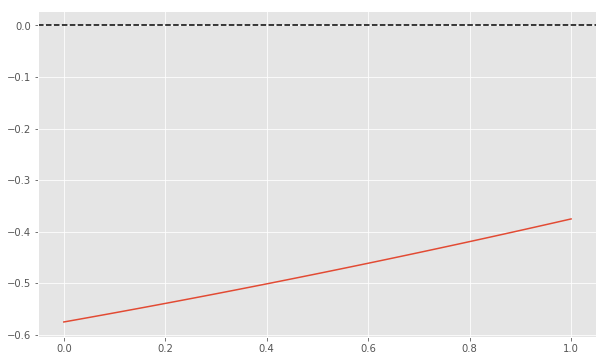

In [153]:
plot_real_part(20, 15, 7, 1, 1e-3)

In [151]:
real_part.subs({epsilon**2: 0})

zoo*(0.375*P*UgA_star**2*epsilon - 0.75*P*UgA_star*epsilon + 0.375*P*epsilon + 0.375*R*UgA_star**2*epsilon - 0.75*R*epsilon - 0.375*S*UgA_star**2*epsilon + 0.375*S*UgA_star*epsilon - 0.375*T*UgA_star**2*epsilon + 0.375*T*UgA_star*epsilon)

In [89]:
sym.factor(real_part, UgA_star, epsilon)

-0.75*(0.333333333333333*P*epsilon - 0.5*P + 1.0*R + UgA_star**2*epsilon*(0.333333333333333*P + 0.333333333333333*R - 0.333333333333333*S - 0.333333333333333*T) + UgA_star**2*(-0.5*P - 0.5*R + 0.5*S + 0.5*T) + UgA_star*epsilon*(-0.666666666666667*P + 0.333333333333333*S + 0.333333333333333*T) + UgA_star*(1.0*P - 0.5*S - 0.5*T))/R

In [91]:
r1, r2 = sym.solve(sym.factor(real_part, UgA_star, epsilon), UgA_star)

In [98]:
r1, r2

(0.5*(sqrt(-(2.0*epsilon - 3.0)*(8.0*P*R*epsilon + 12.0*P*R + 24.0*R**2 - 24.0*R*S - 24.0*R*T - 2.0*S**2*epsilon + 3.0*S**2 - 4.0*S*T*epsilon + 6.0*S*T - 2.0*T**2*epsilon + 3.0*T**2))*(-P - R + S + T) + (2.0*P - S - T)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T))/((P + R - S - T)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T)),
 0.5*(sqrt(-(2.0*epsilon - 3.0)*(8.0*P*R*epsilon + 12.0*P*R + 24.0*R**2 - 24.0*R*S - 24.0*R*T - 2.0*S**2*epsilon + 3.0*S**2 - 4.0*S*T*epsilon + 6.0*S*T - 2.0*T**2*epsilon + 3.0*T**2))*(P + R - S - T) + (2.0*P - S - T)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T))/((P + R - S - T)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T)))

In [145]:
r1.subs({epsilon: 1e-3, T: 5.5, R: 3, P: 2, S: 1})

0.833333333333333 - 1.40530803308479*I

In [144]:
r2.subs({epsilon: 1e-3, T: 3.05, R: 3, P: 2, S: 1})

-2.07946755487512

In [116]:
r1.subs({epsilon: 1e-3, T: 4, R: 3.995, P: 2, S: 1})

2.00307646643058

In [117]:
r2.subs({epsilon: 1e-3, T: 4, R: 3.995, P: 2, S: 1})

-3.00810159205872

In [93]:
sym.simplify(r1)

0.5*(sqrt(-(2.0*epsilon - 3.0)*(8.0*P*R*epsilon + 12.0*P*R + 24.0*R**2 - 24.0*R*S - 24.0*R*T - 2.0*S**2*epsilon + 3.0*S**2 - 4.0*S*T*epsilon + 6.0*S*T - 2.0*T**2*epsilon + 3.0*T**2))*(-P - R + S + T) - (-2.0*P + S + T)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T))/((P + R - S - T)*(2.0*P*epsilon - 3.0*P + 2.0*R*epsilon - 3.0*R - 2.0*S*epsilon + 3.0*S - 2.0*T*epsilon + 3.0*T))

$$ \frac{(-P + 6R - 2(1 - \epsilon)\big(((R + P) - (T + S))U_{gA}^{*2} + (2P - (T + S))U_{gA}^{*} + P \big) - U_{gA}^{*2}((R + P) - (T + S))  + U_{gA}^{*}(2P - (T + S))}{8R} $$

In [76]:
sym.factor(0.333333333333333*P*UgA_star**2*epsilon - 0.5*P*UgA_star**2 - 0.666666666666667*P*UgA_star*epsilon + 1.0*P*UgA_star + 0.333333333333333*P*epsilon - 0.5*P + 0.333333333333333*R*UgA_star**2*epsilon - 0.5*R*UgA_star**2 + 1.0*R - 0.333333333333333*S*UgA_star**2*epsilon + 0.5*S*UgA_star**2 + 0.333333333333333*S*UgA_star*epsilon - 0.5*S*UgA_star - 0.333333333333333*T*UgA_star**2*epsilon + 0.5*T*UgA_star**2 + 0.333333333333333*T*UgA_star*epsilon - 0.5*T*UgA_star, UgA_star, epsilon)

1.0*(0.333333333333333*P*epsilon - 0.5*P + 1.0*R + UgA_star**2*epsilon*(0.333333333333333*P + 0.333333333333333*R - 0.333333333333333*S - 0.333333333333333*T) + UgA_star**2*(-0.5*P - 0.5*R + 0.5*S + 0.5*T) + UgA_star*epsilon*(-0.666666666666667*P + 0.333333333333333*S + 0.333333333333333*T) + UgA_star*(1.0*P - 0.5*S - 0.5*T))

In [83]:
sym.factor(discriminant_1, UgA_star, epsilon)

4096.0*epsilon**2*(0.015625*P**2 - 0.0625*P*R + 0.0625*R**2 + UgA_star**4*epsilon**2*(0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + UgA_star**4*epsilon*(0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + UgA_star**4*(0.015625*P**2 + 0.03125*P*R - 0.03125*P*S - 0.03125*P*T + 0.015625*R**2 - 0.03125*R*S - 0.03125*R*T + 0.015625*S**2 + 0.03125*S*T + 0.015625*T**2) + UgA_star**3*epsilon**2*(-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2) + UgA_star**3*epsilon*(-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2) + UgA_star**3*(-0.0625*P**2 - 0.0625*P*R + 0.09375*P*S + 0.09375*P*T + 0.03125*R*S + 0.03125*R*T - 0.03125*S**2 - 0.0625*S*T - 0.03125*T**2) + UgA_star**2*epsilon**2*(0.375*P**2 + 0.625*P*R - 0.375*P*S - 0.375*

In [ ]:
(0.015625*P**2 - 0.0625*P*R + 0.0625*R**2) + 
UgA_star**4*epsilon**2*(0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + 
UgA_star**4*epsilon*(0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + 
UgA_star**4*(0.015625*P**2 + 0.03125*P*R - 0.03125*P*S - 0.03125*P*T + 0.015625*R**2 - 0.03125*R*S - 0.03125*R*T + 0.015625*S**2 + 0.03125*S*T + 0.015625*T**2) + 
UgA_star**3*epsilon**2*(-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2) + 
UgA_star**3*epsilon*(-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2) + 
UgA_star**3*(-0.0625*P**2 - 0.0625*P*R + 0.09375*P*S + 0.09375*P*T + 0.03125*R*S + 0.03125*R*T - 0.03125*S**2 - 0.0625*S*T - 0.03125*T**2) + 
UgA_star**2*epsilon**2*(0.375*P**2 + 0.625*P*R - 0.375*P*S - 0.375*P*T - 0.5*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + 
UgA_star**2*epsilon*(0.375*P**2 + 0.25*P*R - 0.375*P*S - 0.375*P*T + 0.125*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + 
UgA_star**2*(0.09375*P**2 - 0.03125*P*R - 0.09375*P*S - 0.09375*P*T + 0.0625*R**2 - 0.0625*R*S + 0.0625*R*T + 0.015625*S**2 + 0.03125*S*T + 0.015625*T**2) + 
UgA_star*epsilon**2*(-0.25*P**2 - 1.0*P*R + 0.125*P*S + 0.125*P*T + 0.5*R*T) + 
UgA_star*epsilon*(-0.25*P**2 - 0.25*P*R + 0.125*P*S + 0.125*P*T + 0.125*R*S + 0.125*R*T) + 
UgA_star*(-0.0625*P**2 + 0.125*P*R + 0.03125*P*S + 0.03125*P*T + 0.0625*R*S - 0.0625*R*T) + 
epsilon**2*(0.0625*P**2 + 0.5*P*R) + 
epsilon*(0.0625*P**2 + 0.125*P*R)


In [40]:
# always positive
coefficient_42 = (0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) 

In [41]:
sym.factor(coefficient_42)

0.0625*(1.0*P + 1.0*R - 1.0*S - 1.0*T)**2

In [44]:
# always positive
coefficient_41 = (0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2)

In [45]:
sym.factor(coefficient_41)

0.0625*(1.0*P + 1.0*R - 1.0*S - 1.0*T)**2

In [42]:
# always positive
coefficient_40 = (0.015625*P**2 + 0.03125*P*R - 0.03125*P*S - 0.03125*P*T + 0.015625*R**2 - 0.03125*R*S - 0.03125*R*T + 0.015625*S**2 + 0.03125*S*T + 0.015625*T**2)

In [43]:
sym.factor(coefficient_40)

0.015625*(1.0*P + 1.0*R - 1.0*S - 1.0*T)**2

In [46]:
# positive iff 2P < T + S < R + P
coefficient_32 = (-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2)

In [47]:
sym.factor(coefficient_32)

-0.25*(1.0*P - 0.5*S - 0.5*T)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)

$$ -\frac{1}{8}(2P - (T + S))((R + P) - (T + S)) $$

In [49]:
# positive iff 2P < T + S < R + P
coefficient_31 = (-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2)

In [50]:
sym.factor(coefficient_31)

-0.25*(1.0*P - 0.5*S - 0.5*T)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)

In [51]:
# positive iff 2P < T + S < R + P
coefficient_30 = (-0.0625*P**2 - 0.0625*P*R + 0.09375*P*S + 0.09375*P*T + 0.03125*R*S + 0.03125*R*T - 0.03125*S**2 - 0.0625*S*T - 0.03125*T**2)

In [52]:
sym.factor(coefficient_30)

-0.0625*(1.0*P - 0.5*S - 0.5*T)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)

In [53]:
coefficient_22 = (0.375*P**2 + 0.625*P*R - 0.375*P*S - 0.375*P*T - 0.5*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) 

In [54]:
sym.factor(coefficient_22)

0.625*(0.6*P**2 + 1.0*P*R - 0.6*P*S - 0.6*P*T - 0.8*R*T + 0.1*S**2 + 0.2*S*T + 0.1*T**2)

In [55]:
coefficient_21 = (0.375*P**2 + 0.25*P*R - 0.375*P*S - 0.375*P*T + 0.125*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2)

In [56]:
sym.factor(coefficient_21)

0.375*(1.0*P**2 + 0.666666666666667*P*R - 1.0*P*S - 1.0*P*T + 0.333333333333333*R**2 - 0.333333333333333*R*S - 0.333333333333333*R*T + 0.166666666666667*S**2 + 0.333333333333333*S*T + 0.166666666666667*T**2)

In [57]:
coefficient_20 = (0.09375*P**2 - 0.03125*P*R - 0.09375*P*S - 0.09375*P*T + 0.0625*R**2 - 0.0625*R*S + 0.0625*R*T + 0.015625*S**2 + 0.03125*S*T + 0.015625*T**2)

In [58]:
sym.factor(coefficient_20)

0.09375*(1.0*P**2 - 0.333333333333333*P*R - 1.0*P*S - 1.0*P*T + 0.666666666666667*R**2 - 0.666666666666667*R*S + 0.666666666666667*R*T + 0.166666666666667*S**2 + 0.333333333333333*S*T + 0.166666666666667*T**2)

In [59]:
coefficient_12 = (-0.25*P**2 - 1.0*P*R + 0.125*P*S + 0.125*P*T + 0.5*R*T)

In [60]:
sym.factor(coefficient_12)

-1.0*(0.25*P**2 + 1.0*P*R - 0.125*P*S - 0.125*P*T - 0.5*R*T)

In [ ]:
(0.25*P**2 + 0.5*P*R + 0.5*P*R - 0.125*P*(T + S) - 0.5*R*T)

In [61]:
coefficient_11 = (-0.25*P**2 - 0.25*P*R + 0.125*P*S + 0.125*P*T + 0.125*R*S + 0.125*R*T)

In [62]:
# positive iff 2P < T + S
sym.factor(coefficient_11)

-0.25*(1.0*P + 1.0*R)*(1.0*P - 0.5*S - 0.5*T)

In [63]:
# positive iff P > T - S
coefficient_10 = (-0.0625*P**2 + 0.125*P*R + 0.03125*P*S + 0.03125*P*T + 0.0625*R*S - 0.0625*R*T)

In [68]:
sym.factor(coefficient_10)

-0.125*(0.5*P**2 - 1.0*P*R - 0.25*P*S - 0.25*P*T - 0.5*R*S + 0.5*R*T)

In [72]:

sym.expand((-0.5*P*(R - P) - 0.25*P*(T + S) - 0.5*R*(P - (T - S))))

0.5*P**2 - 1.0*P*R - 0.25*P*S - 0.25*P*T - 0.5*R*S + 0.5*R*T

In [73]:
# always positive
sym.factor(0.015625*P**2 - 0.0625*P*R + 0.0625*R**2)

0.0625*(0.5*P - 1.0*R)**2

### Case $U_{GA}=0$

In [231]:
n, d = sym.fraction(sym.together(e2.subs({x1: x1_star}).subs({UGA_star: 0, M: 0, m: 0})))

In [237]:
2 * d

2*P*(4.0*epsilon + 2.0)**2

In [105]:
sym.expand(n)

-4.0*P*UgA_star**2*epsilon**3 + 2.0*P*UgA_star**2*epsilon**2 + 5.0*P*UgA_star**2*epsilon + 1.5*P*UgA_star**2 + 8.0*P*UgA_star*epsilon**3 - 4.0*P*UgA_star*epsilon**2 - 10.0*P*UgA_star*epsilon - 3.0*P*UgA_star - 4.0*P*epsilon**3 - 10.0*P*epsilon**2 - 7.0*P*epsilon - 1.5*P - 4.0*R*UgA_star**2*epsilon**3 + 2.0*R*UgA_star**2*epsilon**2 + 5.0*R*UgA_star**2*epsilon + 1.5*R*UgA_star**2 + 4.0*S*UgA_star**2*epsilon**3 - 2.0*S*UgA_star**2*epsilon**2 - 5.0*S*UgA_star**2*epsilon - 1.5*S*UgA_star**2 - 4.0*S*UgA_star*epsilon**3 + 2.0*S*UgA_star*epsilon**2 + 5.0*S*UgA_star*epsilon + 1.5*S*UgA_star + 4.0*T*UgA_star**2*epsilon**3 - 2.0*T*UgA_star**2*epsilon**2 - 5.0*T*UgA_star**2*epsilon - 1.5*T*UgA_star**2 - 4.0*T*UgA_star*epsilon**3 + 2.0*T*UgA_star*epsilon**2 + 5.0*T*UgA_star*epsilon + 1.5*T*UgA_star + 0.25*epsilon**2*sqrt(256.0*P**2*UgA_star**4*epsilon**2 + 256.0*P**2*UgA_star**4*epsilon + 64.0*P**2*UgA_star**4 - 1024.0*P**2*UgA_star**3*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon - 256.0*P**2*UgA_s

\begin{align}
-4PU_{gA}^2\epsilon^3 + 2PU_{gA}^2\epsilon^2 + 5PU_{gA}^2\epsilon + 1.5PU_{gA}^2 + 8PU_{gA}\epsilon^3 - 4PU_{gA}\epsilon^2 - 10PU_{gA}\epsilon - 3PU_{gA} - 4P\epsilon^3 - 10P\epsilon^2 - 7P\epsilon - 1.5P - 4RU_{gA}^2\epsilon^3 + 2RU_{gA}^2\epsilon^2 + 5RU_{gA}^2\epsilon + 1.5RU_{gA}^2 + 4SU_{gA}^2\epsilon^3 - 2SU_{gA}^2\epsilon^2 - 5SU_{gA}^2\epsilon - 1.5SU_{gA}^2 - 4SU_{gA}\epsilon^3 + 2SU_{gA}\epsilon^2 + 5SU_{gA}\epsilon + 1.5SU_{gA} + 4TU_{gA}^2\epsilon^3 - 2TU_{gA}^2\epsilon^2 - 5TU_{gA}^2\epsilon - 1.5TU_{gA}^2 - 4TU_{gA}\epsilon^3 + 2TU_{gA}\epsilon^2 + 5TU_{gA}\epsilon + 1.5TU_{gA} + 0.25\epsilon^2\sqrt{256P^2U_{gA}^4\epsilon^2 + 256P^2U_{gA}^4\epsilon + 64P^2U_{gA}^4 - 1024P^2U_{gA}^3\epsilon^2 - 1024P^2U_{gA}^3\epsilon - 256P^2U_{gA}^3 + 1536P^2U_{gA}^2\epsilon^2 + 2048P^2U_{gA}^2\epsilon + 640P^2U_{gA}^2 - 1024P^2U_{gA}\epsilon^2 - 2048P^2U_{gA}\epsilon - 768P^2U_{gA} + 256P^2\epsilon^2 + 768P^2\epsilon + 576P^2 + 512PRU_{gA}^4\epsilon^2 + 512PRU_{gA}^4\epsilon + 128PRU_{gA}^4 - 1024PRU_{gA}^3\epsilon^2 - 1024PRU_{gA}^3\epsilon - 256PRU_{gA}^3 + 2560PRU_{gA}^2\epsilon^2 + 1024PRU_{gA}^2\epsilon - 128PRU_{gA}^2 - 512PSU_{gA}^4\epsilon^2 - 512PSU_{gA}^4\epsilon - 128PSU_{gA}^4 + 1536PSU_{gA}^3\epsilon^2 + 1536PSU_{gA}^3\epsilon + 384PSU_{gA}^3 - 3584PSU_{gA}^2\epsilon^2 - 2048PSU_{gA}^2\epsilon - 128PSU_{gA}^2 + 2560PSU_{gA}\epsilon^2 + 1024PSU_{gA}\epsilon - 128PSU_{gA} - 512PTU_{gA}^4\epsilon^2 - 512PTU_{gA}^4\epsilon - 128PTU_{gA}^4 + 1536PTU_{gA}^3\epsilon^2 + 1536PTU_{gA}^3\epsilon + 384PTU_{gA}^3 - 1536PTU_{gA}^2\epsilon^2 - 2048PTU_{gA}^2\epsilon - 640PTU_{gA}^2 + 512PTU_{gA}\epsilon^2 + 1024PTU_{gA}\epsilon + 384PTU_{gA} + 256R^2U_{gA}^4\epsilon^2 + 256R^2U_{gA}^4\epsilon + 64R^2U_{gA}^4 - 512RSU_{gA}^4\epsilon^2 - 512RSU_{gA}^4\epsilon - 128RSU_{gA}^4 + 512RSU_{gA}^3\epsilon^2 + 512RSU_{gA}^3\epsilon + 128RSU_{gA}^3 - 512RTU_{gA}^4\epsilon^2 - 512RTU_{gA}^4\epsilon - 128RTU_{gA}^4 + 512RTU_{gA}^3\epsilon^2 + 512RTU_{gA}^3\epsilon + 128RTU_{gA}^3 + 256S^2U_{gA}^4\epsilon^2 + 256S^2U_{gA}^4\epsilon + 64S^2U_{gA}^4 - 512S^2U_{gA}^3\epsilon^2 - 512S^2U_{gA}^3\epsilon - 128S^2U_{gA}^3 + 256S^2U_{gA}^2\epsilon^2 + 256S^2U_{gA}^2\epsilon + 64S^2U_{gA}^2 + 512STU_{gA}^4\epsilon^2 + 512STU_{gA}^4\epsilon + 128STU_{gA}^4 - 1024STU_{gA}^3\epsilon^2 - 1024STU_{gA}^3\epsilon - 256STU_{gA}^3 + 512STU_{gA}^2\epsilon^2 + 512STU_{gA}^2\epsilon + 128STU_{gA}^2 + 256T^2U_{gA}^4\epsilon^2 + 256T^2U_{gA}^4\epsilon + 64T^2U_{gA}^4 - 512T^2U_{gA}^3\epsilon^2 - 512T^2U_{gA}^3\epsilon - 128T^2U_{gA}^3 + 256T^2U_{gA}^2\epsilon^2 + 256T^2U_{gA}^2\epsilon + 64T^2U_{gA}^2} + 0.25\epsilon\sqrt{256P^2U_{gA}^4\epsilon^2 + 256P^2U_{gA}^4\epsilon + 64P^2U_{gA}^4 - 1024P^2U_{gA}^3\epsilon^2 - 1024P^2U_{gA}^3\epsilon - 256P^2U_{gA}^3 + 1536P^2U_{gA}^2\epsilon^2 + 2048P^2U_{gA}^2\epsilon + 640P^2U_{gA}^2 - 1024P^2U_{gA}\epsilon^2 - 2048P^2U_{gA}\epsilon - 768P^2U_{gA} + 256P^2\epsilon^2 + 768P^2\epsilon + 576P^2 + 512PRU_{gA}^4\epsilon^2 + 512PRU_{gA}^4\epsilon + 128PRU_{gA}^4 - 1024PRU_{gA}^3\epsilon^2 - 1024PRU_{gA}^3\epsilon - 256PRU_{gA}^3 + 2560PRU_{gA}^2\epsilon^2 + 1024PRU_{gA}^2\epsilon - 128PRU_{gA}^2 - 512PSU_{gA}^4\epsilon^2 - 512PSU_{gA}^4\epsilon - 128PSU_{gA}^4 + 1536PSU_{gA}^3\epsilon^2 + 1536PSU_{gA}^3\epsilon + 384PSU_{gA}^3 - 3584PSU_{gA}^2\epsilon^2 - 2048PSU_{gA}^2\epsilon - 128PSU_{gA}^2 + 2560PSU_{gA}\epsilon^2 + 1024PSU_{gA}\epsilon - 128PSU_{gA} - 512PTU_{gA}^4\epsilon^2 - 512PTU_{gA}^4\epsilon - 128PTU_{gA}^4 + 1536PTU_{gA}^3\epsilon^2 + 1536PTU_{gA}^3\epsilon + 384PTU_{gA}^3 - 1536PTU_{gA}^2\epsilon^2 - 2048PTU_{gA}^2\epsilon - 640PTU_{gA}^2 + 512PTU_{gA}\epsilon^2 + 1024PTU_{gA}\epsilon + 384PTU_{gA} + 256R^2U_{gA}^4\epsilon^2 + 256R^2U_{gA}^4\epsilon + 64R^2U_{gA}^4 - 512RSU_{gA}^4\epsilon^2 - 512RSU_{gA}^4\epsilon - 128RSU_{gA}^4 + 512RSU_{gA}^3\epsilon^2 + 512RSU_{gA}^3\epsilon + 128RSU_{gA}^3 - 512RTU_{gA}^4\epsilon^2 - 512RTU_{gA}^4\epsilon - 128RTU_{gA}^4 + 512RTU_{gA}^3\epsilon^2 + 512RTU_{gA}^3\epsilon + 128RTU_{gA}^3 + 256S^2U_{gA}^4\epsilon^2 + 256S^2U_{gA}^4\epsilon + 64S^2U_{gA}^4 - 512S^2U_{gA}^3\epsilon^2 - 512S^2U_{gA}^3\epsilon - 128S^2U_{gA}^3 + 256S^2U_{gA}^2\epsilon^2 + 256S^2U_{gA}^2\epsilon + 64S^2U_{gA}^2 + 512STU_{gA}^4\epsilon^2 + 512STU_{gA}^4\epsilon + 128STU_{gA}^4 - 1024STU_{gA}^3\epsilon^2 - 1024STU_{gA}^3\epsilon - 256STU_{gA}^3 + 512STU_{gA}^2\epsilon^2 + 512STU_{gA}^2\epsilon + 128STU_{gA}^2 + 256T^2U_{gA}^4\epsilon^2 + 256T^2U_{gA}^4\epsilon + 64T^2U_{gA}^4 - 512T^2U_{gA}^3\epsilon^2 - 512T^2U_{gA}^3\epsilon - 128T^2U_{gA}^3 + 256T^2U_{gA}^2\epsilon^2 + 256T^2U_{gA}^2\epsilon + 64T^2U_{gA}^2} + 0.0625\sqrt{256P^2U_{gA}^4\epsilon^2 + 256P^2U_{gA}^4\epsilon + 64P^2U_{gA}^4 - 1024P^2U_{gA}^3\epsilon^2 - 1024P^2U_{gA}^3\epsilon - 256P^2U_{gA}^3 + 1536P^2U_{gA}^2\epsilon^2 + 2048P^2U_{gA}^2\epsilon + 640P^2U_{gA}^2 - 1024P^2U_{gA}\epsilon^2 - 2048P^2U_{gA}\epsilon - 768P^2U_{gA} + 256P^2\epsilon^2 + 768P^2\epsilon + 576P^2 + 512PRU_{gA}^4\epsilon^2 + 512PRU_{gA}^4\epsilon + 128PRU_{gA}^4 - 1024PRU_{gA}^3\epsilon^2 - 1024PRU_{gA}^3\epsilon - 256PRU_{gA}^3 + 2560PRU_{gA}^2\epsilon^2 + 1024PRU_{gA}^2\epsilon - 128PRU_{gA}^2 - 512PSU_{gA}^4\epsilon^2 - 512PSU_{gA}^4\epsilon - 128PSU_{gA}^4 + 1536PSU_{gA}^3\epsilon^2 + 1536PSU_{gA}^3\epsilon + 384PSU_{gA}^3 - 3584PSU_{gA}^2\epsilon^2 - 2048PSU_{gA}^2\epsilon - 128PSU_{gA}^2 + 2560PSU_{gA}\epsilon^2 + 1024PSU_{gA}\epsilon - 128PSU_{gA} - 512PTU_{gA}^4\epsilon^2 - 512PTU_{gA}^4\epsilon - 128PTU_{gA}^4 + 1536PTU_{gA}^3\epsilon^2 + 1536PTU_{gA}^3\epsilon + 384PTU_{gA}^3 - 1536PTU_{gA}^2\epsilon^2 - 2048PTU_{gA}^2\epsilon - 640PTU_{gA}^2 + 512PTU_{gA}\epsilon^2 + 1024PTU_{gA}\epsilon + 384PTU_{gA} + 256R^2U_{gA}^4\epsilon^2 + 256R^2U_{gA}^4\epsilon + 64R^2U_{gA}^4 - 512RSU_{gA}^4\epsilon^2 - 512RSU_{gA}^4\epsilon - 128RSU_{gA}^4 + 512RSU_{gA}^3\epsilon^2 + 512RSU_{gA}^3\epsilon + 128RSU_{gA}^3 - 512RTU_{gA}^4\epsilon^2 - 512RTU_{gA}^4\epsilon - 128RTU_{gA}^4 + 512RTU_{gA}^3\epsilon^2 + 512RTU_{gA}^3\epsilon + 128RTU_{gA}^3 + 256S^2U_{gA}^4\epsilon^2 + 256S^2U_{gA}^4\epsilon + 64S^2U_{gA}^4 - 512S^2U_{gA}^3\epsilon^2 - 512S^2U_{gA}^3\epsilon - 128S^2U_{gA}^3 + 256S^2U_{gA}^2\epsilon^2 + 256S^2U_{gA}^2\epsilon + 64S^2U_{gA}^2 + 512STU_{gA}^4\epsilon^2 + 512STU_{gA}^4\epsilon + 128STU_{gA}^4 - 1024STU_{gA}^3\epsilon^2 - 1024STU_{gA}^3\epsilon - 256STU_{gA}^3 + 512STU_{gA}^2\epsilon^2 + 512STU_{gA}^2\epsilon + 128STU_{gA}^2 + 256T^2U_{gA}^4\epsilon^2 + 256T^2U_{gA}^4\epsilon + 64T^2U_{gA}^4 - 512T^2U_{gA}^3\epsilon^2 - 512T^2U_{gA}^3\epsilon - 128T^2U_{gA}^3 + 256T^2U_{gA}^2\epsilon^2 + 256T^2U_{gA}^2\epsilon + 64T^2U_{gA}^2}
\end{align}


\begin{align}
    & \frac{(2\epsilon - 3)(2\epsilon + 1)^2\bigg(\big(2P - (T + S)\big)U_{gA} - \big((R + P) - (T + S)\big)U_{gA}^2\bigg) - P(2\epsilon + 1)^2(2\epsilon + 3) + (2\epsilon + 1)^2\sqrt{\Delta}}{8P(2\epsilon + 1)^2} \\
    & \frac{(2\epsilon - 3)\bigg(\big(2P - (T + S)\big) - \big((R + P) - (T + S)\big)U_{gA}\bigg)U_{gA} - P(2\epsilon + 3) + \sqrt{\Delta}}{8P}
\end{align}

\begin{align}
-8PU_{gA}^2\epsilon^3 + 4PU_{gA}^2\epsilon^2 + 10PU_{gA}^2\epsilon + 3PU_{gA}^2 + 16PU_{gA}\epsilon^3 - 8PU_{gA}\epsilon^2 - 20PU_{gA}\epsilon - 6PU_{gA} - 8P\epsilon^3 - 20P\epsilon^2 - 14P\epsilon - 3P - 8RU_{gA}^2\epsilon^3 + 4RU_{gA}^2\epsilon^2 + 10RU_{gA}^2\epsilon + 3RU_{gA}^2 + 8SU_{gA}^2\epsilon^3 - 4SU_{gA}^2\epsilon^2 - 10SU_{gA}^2\epsilon - 3SU_{gA}^2 - 8SU_{gA}\epsilon^3 + 4SU_{gA}\epsilon^2 + 10SU_{gA}\epsilon + 3SU_{gA} + 8TU_{gA}^2\epsilon^3 - 4TU_{gA}^2\epsilon^2 - 10TU_{gA}^2\epsilon - 3TU_{gA}^2 - 8TU_{gA}\epsilon^3 + 4TU_{gA}\epsilon^2 + 10TU_{gA}\epsilon + 3TU_{gA} + \big(4\epsilon^2 + 4\epsilon + 1\big)\sqrt{\Delta}
\end{align}

where

\begin{align}
    \Delta = 4P^2U_{gA}^4\epsilon^2 + 4P^2U_{gA}^4\epsilon + P^2U_{gA}^4 - 16P^2U_{gA}^3\epsilon^2 - 16P^2U_{gA}^3\epsilon - 4P^2U_{gA}^3 + 24P^2U_{gA}^2\epsilon^2 + 32P^2U_{gA}^2\epsilon + 10P^2U_{gA}^2 - 16P^2U_{gA}\epsilon^2 - 32P^2U_{gA}\epsilon - 12P^2U_{gA} + 4P^2\epsilon^2 + 12P^2\epsilon + 9P^2 + 8PRU_{gA}^4\epsilon^2 + 8PRU_{gA}^4\epsilon + 2PRU_{gA}^4 - 16PRU_{gA}^3\epsilon^2 - 16PRU_{gA}^3\epsilon - 4PRU_{gA}^3 + 40PRU_{gA}^2\epsilon^2 + 16PRU_{gA}^2\epsilon - 2PRU_{gA}^2 - 8PSU_{gA}^4\epsilon^2 - 8PSU_{gA}^4\epsilon - 2PSU_{gA}^4 + 24PSU_{gA}^3\epsilon^2 + 24PSU_{gA}^3\epsilon + 6PSU_{gA}^3 - 56PSU_{gA}^2\epsilon^2 - 32PSU_{gA}^2\epsilon - 2PSU_{gA}^2 + 40PSU_{gA}\epsilon^2 + 16PSU_{gA}\epsilon - 2PSU_{gA} - 8PTU_{gA}^4\epsilon^2 - 8PTU_{gA}^4\epsilon - 2PTU_{gA}^4 + 24PTU_{gA}^3\epsilon^2 + 24PTU_{gA}^3\epsilon + 6PTU_{gA}^3 - 24PTU_{gA}^2\epsilon^2 - 32PTU_{gA}^2\epsilon - 10PTU_{gA}^2 + 8PTU_{gA}\epsilon^2 + 16PTU_{gA}\epsilon + 6PTU_{gA} + 4R^2U_{gA}^4\epsilon^2 + 4R^2U_{gA}^4\epsilon + R^2U_{gA}^4 - 8RSU_{gA}^4\epsilon^2 - 8RSU_{gA}^4\epsilon - 2RSU_{gA}^4 + 8RSU_{gA}^3\epsilon^2 + 8RSU_{gA}^3\epsilon + 2RSU_{gA}^3 - 8RTU_{gA}^4\epsilon^2 - 8RTU_{gA}^4\epsilon - 2RTU_{gA}^4 + 8RTU_{gA}^3\epsilon^2 + 8RTU_{gA}^3\epsilon + 2RTU_{gA}^3 + 4S^2U_{gA}^4\epsilon^2 + 4S^2U_{gA}^4\epsilon + S^2U_{gA}^4 - 8S^2U_{gA}^3\epsilon^2 - 8S^2U_{gA}^3\epsilon - 2S^2U_{gA}^3 + 4S^2U_{gA}^2\epsilon^2 + 4S^2U_{gA}^2\epsilon + S^2U_{gA}^2 + 8STU_{gA}^4\epsilon^2 + 8STU_{gA}^4\epsilon + 2STU_{gA}^4 - 16STU_{gA}^3\epsilon^2 - 16STU_{gA}^3\epsilon - 4STU_{gA}^3 + 8STU_{gA}^2\epsilon^2 + 8STU_{gA}^2\epsilon + 2STU_{gA}^2 + 4T^2U_{gA}^4\epsilon^2 + 4T^2U_{gA}^4\epsilon + T^2U_{gA}^4 - 8T^2U_{gA}^3\epsilon^2 - 8T^2U_{gA}^3\epsilon - 2T^2U_{gA}^3 + 4T^2U_{gA}^2\epsilon^2 + 4T^2U_{gA}^2\epsilon + T^2U_{gA}^2
\end{align}

In [238]:
sym.factor(8 * epsilon**3 - 4 * epsilon**2 - 10 * epsilon - 3)

(2*epsilon - 3)*(2*epsilon + 1)**2

In [239]:
sym.factor(-8 * P * epsilon**3 - 20 * P * epsilon**2 - 14 * P * epsilon - 3 * P)

-P*(2*epsilon + 1)**2*(2*epsilon + 3)

In [234]:
delta.subs({epsilon**2: 0})

256.0*P**2*UgA_star**4*epsilon + 64.0*P**2*UgA_star**4 - 1024.0*P**2*UgA_star**3*epsilon - 256.0*P**2*UgA_star**3 + 2048.0*P**2*UgA_star**2*epsilon + 640.0*P**2*UgA_star**2 - 2048.0*P**2*UgA_star*epsilon - 768.0*P**2*UgA_star + 768.0*P**2*epsilon + 576.0*P**2 + 512.0*P*R*UgA_star**4*epsilon + 128.0*P*R*UgA_star**4 - 1024.0*P*R*UgA_star**3*epsilon - 256.0*P*R*UgA_star**3 + 1024.0*P*R*UgA_star**2*epsilon - 128.0*P*R*UgA_star**2 - 512.0*P*S*UgA_star**4*epsilon - 128.0*P*S*UgA_star**4 + 1536.0*P*S*UgA_star**3*epsilon + 384.0*P*S*UgA_star**3 - 2048.0*P*S*UgA_star**2*epsilon - 128.0*P*S*UgA_star**2 + 1024.0*P*S*UgA_star*epsilon - 128.0*P*S*UgA_star - 512.0*P*T*UgA_star**4*epsilon - 128.0*P*T*UgA_star**4 + 1536.0*P*T*UgA_star**3*epsilon + 384.0*P*T*UgA_star**3 - 2048.0*P*T*UgA_star**2*epsilon - 640.0*P*T*UgA_star**2 + 1024.0*P*T*UgA_star*epsilon + 384.0*P*T*UgA_star + 256.0*R**2*UgA_star**4*epsilon + 64.0*R**2*UgA_star**4 - 512.0*R*S*UgA_star**4*epsilon - 128.0*R*S*UgA_star**4 + 512.0*R*S*UgA

\begin{align}
    & 64\big(P^2 - 2PS + 2PR - 2PT + R^2 - 2RS - 2RT + S^2 + 2ST + T^2\big)\big(4U_{gA}^4\epsilon^2 + 4U_{gA}^4\epsilon + U_{gA}^4\big) -\\
    & 128\big(2P^2 - 3PS + 2PR - 3PT - RS - RT + S^2 + 2ST + T^2\big)\big(4U_{gA}^3\epsilon^2 + 4U_{gA}^3\epsilon + U_{gA}^3\big) + \\
    & 256\big(6P^2 + 10PR - 14PS - 6PT + S^2 + 2ST + T^2\big)U_{gA}^2\epsilon^2 + \\
    & 256\big(8P^2 + 4PR - 8PS - 8PT + S^2 + 2ST + T^2\big)U_{gA}^2\epsilon + \\
    & 64\big(10P^2 - 2PR - 2PS - 10PT + S^2 + 2ST + T^2\big)U_{gA}^2 - \\
    & 512\big(2P^2 - 5PS - PT\big)U_{gA}\epsilon^2 - \\
    & 1024\big(2P^2 - PS - PT\big)U_{gA}\epsilon - \\
    & 128\big(6P^2 + PS - 3PT\big)U_{gA} + \\
    & 64P^2\big(4\epsilon^2 + 12\epsilon + 9\big)
\end{align}

\begin{align}
    & \big(4\epsilon^2 + 4\epsilon + 1\big)\bigg(\big((R + P) - (T + S)\big)^2U_{gA}^2 - 2\big(2P - (T + S)\big)\big((R + P) - (T + S)\big)U_{gA} + \big(2P - (T + S)\big)^2\bigg)U_{gA}^2 + \\
    & 4\big(2P^2 - 10PS + 10PR - 2PT\big)U_{gA}^2\epsilon^2 + \\
    & 4\big(4P^2 - 4PS + 4PR - 4PT\big)U_{gA}^2\epsilon + \\
    & \big(6P^2 + 2PS - 2PR - 6PT\big)U_{gA}^2 - \\
    & 8\big(2P^2 - 5PS - PT\big)U_{gA}\epsilon^2 - \\
    & 16\big(2P^2 - PS - PT\big)U_{gA}\epsilon - \\
    & 2\big(6P^2 + PS - 3PT\big)U_{gA} + \\
    & P^2(2\epsilon + 3)^2
\end{align}

In [255]:
sym.factor(sym.expand(4 * (2 * P**2 - 10 * P * S + 10 * P * R - 2 * P * T) * UgA_star**2 * epsilon**2 + 
           4 * (4 * P**2 - 4 * P * S + 4 * P * R - 4 * P * T) * UgA_star**2 * epsilon + 
           (6 * P**2 + 2 * P * S - 2 * P * R - 6 * P * T) * UgA_star**2 - 
           8 * (2 * P**2 - 5 * P * S - P * T) * UgA_star *epsilon**2 - 
           16 * (2 * P**2 - P * S - P * T) * UgA_star * epsilon - 
           2 * (6 * P**2 + P * S - 3 * P * T) * UgA_star + 
           P**2 * (2 * epsilon + 3)**2), UgA_star, epsilon)

P*(4*P*epsilon**2 + 12*P*epsilon + 9*P + UgA_star**2*epsilon**2*(8*P + 40*R - 40*S - 8*T) + UgA_star**2*epsilon*(16*P + 16*R - 16*S - 16*T) + UgA_star**2*(6*P - 2*R + 2*S - 6*T) + UgA_star*epsilon**2*(-16*P + 40*S + 8*T) + UgA_star*epsilon*(-32*P + 16*S + 16*T) + UgA_star*(-12*P - 2*S + 6*T))

In [250]:
sym.factor(6 * P**2 - 10 * P * S + 10 * P * R - 6 * P * T)

2*P*(3*P + 5*R - 5*S - 3*T)

In [242]:
sym.factor(P**2 - 2 * P * S + 2 * P * R - 2 * P * T + R**2 - 2 * R * S - 2 * R * T + S**2 + 2 * S * T + T**2)

(P + R - S - T)**2

In [241]:
sym.factor(2 * P**2 - 3 * P * S + 2 * P * R - 3 * P * T - R * S - R * T + S**2 + 2 * S * T + T**2)

(2*P - S - T)*(P + R - S - T)

In [243]:
sym.factor(6 * P**2 - 14 * P * S + 10 * P * R - 6 * P * T + S**2 + 2 * S * T + T**2)

6*P**2 + 10*P*R - 14*P*S - 6*P*T + S**2 + 2*S*T + T**2

In [246]:
sym.factor(8 * P**2 - 8 * P * S + 4 * P * R - 8 * P * T + S**2 + 2 * S * T + T**2)

8*P**2 + 4*P*R - 8*P*S - 8*P*T + S**2 + 2*S*T + T**2

In [247]:
sym.expand((2 * P - (T + S))**2)

4*P**2 - 4*P*S - 4*P*T + S**2 + 2*S*T + T**2

In [248]:
sym.factor(2 * P**2 - 10 * P * S  + 10 * P * R - 2 * P * T)

2*P*(P + 5*R - 5*S - T)

In [244]:
sym.factor(4 * epsilon**2 + 12 * epsilon + 9)

(2*epsilon + 3)**2

In [107]:
delta = 256.0*P**2*UgA_star**4*epsilon**2 + 256.0*P**2*UgA_star**4*epsilon + 64.0*P**2*UgA_star**4 - 1024.0*P**2*UgA_star**3*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon - 256.0*P**2*UgA_star**3 + 1536.0*P**2*UgA_star**2*epsilon**2 + 2048.0*P**2*UgA_star**2*epsilon + 640.0*P**2*UgA_star**2 - 1024.0*P**2*UgA_star*epsilon**2 - 2048.0*P**2*UgA_star*epsilon - 768.0*P**2*UgA_star + 256.0*P**2*epsilon**2 + 768.0*P**2*epsilon + 576.0*P**2 + 512.0*P*R*UgA_star**4*epsilon**2 + 512.0*P*R*UgA_star**4*epsilon + 128.0*P*R*UgA_star**4 - 1024.0*P*R*UgA_star**3*epsilon**2 - 1024.0*P*R*UgA_star**3*epsilon - 256.0*P*R*UgA_star**3 + 2560.0*P*R*UgA_star**2*epsilon**2 + 1024.0*P*R*UgA_star**2*epsilon - 128.0*P*R*UgA_star**2 - 512.0*P*S*UgA_star**4*epsilon**2 - 512.0*P*S*UgA_star**4*epsilon - 128.0*P*S*UgA_star**4 + 1536.0*P*S*UgA_star**3*epsilon**2 + 1536.0*P*S*UgA_star**3*epsilon + 384.0*P*S*UgA_star**3 - 3584.0*P*S*UgA_star**2*epsilon**2 - 2048.0*P*S*UgA_star**2*epsilon - 128.0*P*S*UgA_star**2 + 2560.0*P*S*UgA_star*epsilon**2 + 1024.0*P*S*UgA_star*epsilon - 128.0*P*S*UgA_star - 512.0*P*T*UgA_star**4*epsilon**2 - 512.0*P*T*UgA_star**4*epsilon - 128.0*P*T*UgA_star**4 + 1536.0*P*T*UgA_star**3*epsilon**2 + 1536.0*P*T*UgA_star**3*epsilon + 384.0*P*T*UgA_star**3 - 1536.0*P*T*UgA_star**2*epsilon**2 - 2048.0*P*T*UgA_star**2*epsilon - 640.0*P*T*UgA_star**2 + 512.0*P*T*UgA_star*epsilon**2 + 1024.0*P*T*UgA_star*epsilon + 384.0*P*T*UgA_star + 256.0*R**2*UgA_star**4*epsilon**2 + 256.0*R**2*UgA_star**4*epsilon + 64.0*R**2*UgA_star**4 - 512.0*R*S*UgA_star**4*epsilon**2 - 512.0*R*S*UgA_star**4*epsilon - 128.0*R*S*UgA_star**4 + 512.0*R*S*UgA_star**3*epsilon**2 + 512.0*R*S*UgA_star**3*epsilon + 128.0*R*S*UgA_star**3 - 512.0*R*T*UgA_star**4*epsilon**2 - 512.0*R*T*UgA_star**4*epsilon - 128.0*R*T*UgA_star**4 + 512.0*R*T*UgA_star**3*epsilon**2 + 512.0*R*T*UgA_star**3*epsilon + 128.0*R*T*UgA_star**3 + 256.0*S**2*UgA_star**4*epsilon**2 + 256.0*S**2*UgA_star**4*epsilon + 64.0*S**2*UgA_star**4 - 512.0*S**2*UgA_star**3*epsilon**2 - 512.0*S**2*UgA_star**3*epsilon - 128.0*S**2*UgA_star**3 + 256.0*S**2*UgA_star**2*epsilon**2 + 256.0*S**2*UgA_star**2*epsilon + 64.0*S**2*UgA_star**2 + 512.0*S*T*UgA_star**4*epsilon**2 + 512.0*S*T*UgA_star**4*epsilon + 128.0*S*T*UgA_star**4 - 1024.0*S*T*UgA_star**3*epsilon**2 - 1024.0*S*T*UgA_star**3*epsilon - 256.0*S*T*UgA_star**3 + 512.0*S*T*UgA_star**2*epsilon**2 + 512.0*S*T*UgA_star**2*epsilon + 128.0*S*T*UgA_star**2 + 256.0*T**2*UgA_star**4*epsilon**2 + 256.0*T**2*UgA_star**4*epsilon + 64.0*T**2*UgA_star**4 - 512.0*T**2*UgA_star**3*epsilon**2 - 512.0*T**2*UgA_star**3*epsilon - 128.0*T**2*UgA_star**3 + 256.0*T**2*UgA_star**2*epsilon**2 + 256.0*T**2*UgA_star**2*epsilon + 64.0*T**2*UgA_star**2

In [200]:
sym.poly(delta, UgA_star, epsilon)

Poly((256.0*P**2 + 512.0*P*R - 512.0*P*S - 512.0*P*T + 256.0*R**2 - 512.0*R*S - 512.0*R*T + 256.0*S**2 + 512.0*S*T + 256.0*T**2)*UgA_star**4*epsilon**2 + (256.0*P**2 + 512.0*P*R - 512.0*P*S - 512.0*P*T + 256.0*R**2 - 512.0*R*S - 512.0*R*T + 256.0*S**2 + 512.0*S*T + 256.0*T**2)*UgA_star**4*epsilon + (64.0*P**2 + 128.0*P*R - 128.0*P*S - 128.0*P*T + 64.0*R**2 - 128.0*R*S - 128.0*R*T + 64.0*S**2 + 128.0*S*T + 64.0*T**2)*UgA_star**4 + (-1024.0*P**2 - 1024.0*P*R + 1536.0*P*S + 1536.0*P*T + 512.0*R*S + 512.0*R*T - 512.0*S**2 - 1024.0*S*T - 512.0*T**2)*UgA_star**3*epsilon**2 + (-1024.0*P**2 - 1024.0*P*R + 1536.0*P*S + 1536.0*P*T + 512.0*R*S + 512.0*R*T - 512.0*S**2 - 1024.0*S*T - 512.0*T**2)*UgA_star**3*epsilon + (-256.0*P**2 - 256.0*P*R + 384.0*P*S + 384.0*P*T + 128.0*R*S + 128.0*R*T - 128.0*S**2 - 256.0*S*T - 128.0*T**2)*UgA_star**3 + (1536.0*P**2 + 2560.0*P*R - 3584.0*P*S - 1536.0*P*T + 256.0*S**2 + 512.0*S*T + 256.0*T**2)*UgA_star**2*epsilon**2 + (2048.0*P**2 + 1024.0*P*R - 2048.0*P*S - 20

In [204]:
sym.poly(delta, UgA_star, epsilon)

In [203]:
sym.factor(sym.poly(delta, UgA_star, epsilon), UgA_star, epsilon)

3584.0*(0.0714285714285714*P**2*epsilon**2 + 0.214285714285714*P**2*epsilon + 0.160714285714286*P**2 + UgA_star**4*epsilon**2*(0.0714285714285714*P**2 + 0.142857142857143*P*R - 0.142857142857143*P*S - 0.142857142857143*P*T + 0.0714285714285714*R**2 - 0.142857142857143*R*S - 0.142857142857143*R*T + 0.0714285714285714*S**2 + 0.142857142857143*S*T + 0.0714285714285714*T**2) + UgA_star**4*epsilon*(0.0714285714285714*P**2 + 0.142857142857143*P*R - 0.142857142857143*P*S - 0.142857142857143*P*T + 0.0714285714285714*R**2 - 0.142857142857143*R*S - 0.142857142857143*R*T + 0.0714285714285714*S**2 + 0.142857142857143*S*T + 0.0714285714285714*T**2) + UgA_star**4*(0.0178571428571429*P**2 + 0.0357142857142857*P*R - 0.0357142857142857*P*S - 0.0357142857142857*P*T + 0.0178571428571429*R**2 - 0.0357142857142857*R*S - 0.0357142857142857*R*T + 0.0178571428571429*S**2 + 0.0357142857142857*S*T + 0.0178571428571429*T**2) + UgA_star**3*epsilon**2*(-0.285714285714286*P**2 - 0.285714285714286*P*R + 0.4285714285

In [196]:
sym.factor?

In [113]:
# coefficient on UgA**4 * epsilon**2 and UgA**4 * epsilon
A = 3584.0 * (0.0714285714285714*P**2 + 0.142857142857143*P*R - 0.142857142857143*P*S - 0.142857142857143*P*T + 0.0714285714285714*R**2 - 0.142857142857143*R*S - 0.142857142857143*R*T + 0.0714285714285714*S**2 + 0.142857142857143*S*T + 0.0714285714285714*T**2)

In [118]:
sym.factor(A)

512.0*(0.499999999999999*P**2 + 1.0*P*R - 1.0*P*S - 1.0*P*T + 0.499999999999999*R**2 - 1.0*R*S - 1.0*R*T + 0.499999999999999*S**2 + 1.0*S*T + 0.499999999999999*T**2)

In [121]:
# coefficient on UgA**4
B = 3584.0 * (0.0178571428571429*P**2 + 0.0357142857142857*P*R - 0.0357142857142857*P*S - 0.0357142857142857*P*T + 0.0178571428571429*R**2 - 0.0357142857142857*R*S - 0.0357142857142857*R*T + 0.0178571428571429*S**2 + 0.0357142857142857*S*T + 0.0178571428571429*T**2)

In [122]:
sym.factor(B)

128.0*(0.500000000000001*P**2 + 1.0*P*R - 1.0*P*S - 1.0*P*T + 0.500000000000001*R**2 - 1.0*R*S - 1.0*R*T + 0.500000000000001*S**2 + 1.0*S*T + 0.500000000000001*T**2)

In [123]:
# coefficient on UgA**3 * epsilon**2
C = 3584.0 * (-0.285714285714286*P**2 - 0.285714285714286*P*R + 0.428571428571429*P*S + 0.428571428571429*P*T + 0.142857142857143*R*S + 0.142857142857143*R*T - 0.142857142857143*S**2 - 0.285714285714286*S*T - 0.142857142857143*T**2)

In [124]:
sym.factor(C)

-1536.0*(0.666666666666667*P**2 + 0.666666666666667*P*R - 1.0*P*S - 1.0*P*T - 0.333333333333333*R*S - 0.333333333333333*R*T + 0.333333333333333*S**2 + 0.666666666666667*S*T + 0.333333333333333*T**2)

In [125]:
# coefficient on UgA**3 * epsilon
D = 3584.0 * (-0.285714285714286*P**2 - 0.285714285714286*P*R + 0.428571428571429*P*S + 0.428571428571429*P*T + 0.142857142857143*R*S + 0.142857142857143*R*T - 0.142857142857143*S**2 - 0.285714285714286*S*T - 0.142857142857143*T**2)

In [126]:
sym.factor(D)

-1536.0*(0.666666666666667*P**2 + 0.666666666666667*P*R - 1.0*P*S - 1.0*P*T - 0.333333333333333*R*S - 0.333333333333333*R*T + 0.333333333333333*S**2 + 0.666666666666667*S*T + 0.333333333333333*T**2)

In [189]:
E = 3584.0 * (0.428571428571429*P**2 + 0.714285714285714*P*R - 1.0*P*S - 0.428571428571429*P*T + 0.0714285714285714*S**2 + 0.142857142857143*S*T + 0.0714285714285714*T**2)

In [192]:
E

1536.0*P**2 + 2560.0*P*R - 3584.0*P*S - 1536.0*P*T + 256.0*S**2 + 512.0*S*T + 256.0*T**2

In [191]:
3584.0 * (0.571428571428571*P**2 + 0.285714285714286*P*R - 0.571428571428571*P*S - 0.571428571428571*P*T + 0.0714285714285714*S**2 + 0.142857142857143*S*T + 0.0714285714285714*T**2)

2048.0*P**2 + 1024.0*P*R - 2048.0*P*S - 2048.0*P*T + 256.0*S**2 + 512.0*S*T + 256.0*T**2

In [193]:
3584.0 * (0.178571428571429*P**2 - 0.0357142857142857*P*R - 0.0357142857142857*P*S - 0.178571428571429*P*T + 0.0178571428571429*S**2 + 0.0357142857142857*S*T + 0.0178571428571429*T**2)

640.000000000001*P**2 - 128.0*P*R - 128.0*P*S - 640.000000000001*P*T + 64.0000000000002*S**2 + 128.0*S*T + 64.0000000000002*T**2

In [307]:
togethered_e2 = sym.together(e2.subs({x1: x1_star}).subs({M: 0, m: 0}))

In [308]:
numerator_e2, denominator_e2 = sym.fraction(togethered_e2)

In [312]:
expanded_denominator_e2 = sym.expand(numerator_e2)

In [311]:
expanded_numerator_e2 = sym.expand(numerator_e2)

In [ ]:
expanded_numerator_e2

In [88]:
togethered_e2

-0.015625*(-4.0*P*UgA_star**2*epsilon*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 - 8.0*P*UgA_star**2*epsilon*(4.0*epsilon + 2.0)**2 + 6.0*P*UgA_star**2*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 + 12.0*P*UgA_star**2*(4.0*epsilon + 2.0)**2 + 8.0*P*UgA_star*epsilon*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 + 16.0*P*UgA_star*epsilon*(4.0*epsilon + 2.0)**2 - 12.0*P*UgA_star*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 - 24.0*P*UgA_star*(4.0*epsilon + 2.0)**2 - 4.0*P*epsilon*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 - 8.0*P*epsilon*(4.0*epsilon + 2.0)**2 + 6.0*P*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 + 12.0*P*(4.0*epsilon + 2.0)**2 - 4.0*R*UgA_star**2*epsilon*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 - 8.0*R*UgA_star**2*epsilon*(4.0*epsilon + 2.0)**2 + 6.0*R*UgA_star**2*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 + 12.0*R*UgA_star**2*(4.0*epsilon + 2.0)**2 - 4.0*R*epsilon*(-4.0*epsilon - 2.0)*(4.0*epsilon + 2.0)**2 - 8.0*R*epsilon*(4.0*epsilon + 2.0)**2 - R*(-4.0*epsilon - 2.0)*

In [54]:
sym.solve(togethered_e2, epsilon, implicit=True)

[0.25*(3.0*P*UgA_star**2 - 6.0*P*UgA_star + 3.0*P + 3.0*R*UgA_star**2 - 8.0*R - 3.0*S*UgA_star**2 + 3.0*S*UgA_star - 3.0*T*UgA_star**2 + 3.0*T*UgA_star - sqrt(9.0*P**2*UgA_star**4 - 36.0*P**2*UgA_star**3 + 54.0*P**2*UgA_star**2 - 36.0*P**2*UgA_star + 9.0*P**2 + 18.0*P*R*UgA_star**4 - 36.0*P*R*UgA_star**3 + P*R*UgA_star**2*(-4.0*epsilon - 2.0)**2 - 34.0*P*R*UgA_star**2 - 2.0*P*R*UgA_star*(-4.0*epsilon - 2.0)**2 + 104.0*P*R*UgA_star + P*R*(-4.0*epsilon - 2.0)**2 - 52.0*P*R - 18.0*P*S*UgA_star**4 + 54.0*P*S*UgA_star**3 - 54.0*P*S*UgA_star**2 + 18.0*P*S*UgA_star - 18.0*P*T*UgA_star**4 + 54.0*P*T*UgA_star**3 - 54.0*P*T*UgA_star**2 + 18.0*P*T*UgA_star + P*UgA_star**2*(-4.0*epsilon - 2.0)**2*(16.0*P**2*UgA_star**4*epsilon**2*(-4.0*epsilon - 2.0)**2 + 64.0*P**2*UgA_star**4*epsilon**2*(-4.0*epsilon - 2.0) + 64.0*P**2*UgA_star**4*epsilon**2 + 16.0*P**2*UgA_star**4*epsilon*(-4.0*epsilon - 2.0)**2 + 64.0*P**2*UgA_star**4*epsilon*(-4.0*epsilon - 2.0) + 64.0*P**2*UgA_star**4*epsilon + 4.0*P**2*UgA_s

In [319]:
e2_with_UGA_1 = (e2.subs({x1: x1_star})
                   .subs({UGA_star: 1, M: 0, m: 0}))
togethered_e2 = sym.together(e2_with_UGA_1)
numerator_e2, denominator_e2 = sym.fraction(togethered_e2)

In [320]:
denominator_e2

R*epsilon*(4.0*epsilon + 2.0)**2

In [322]:
expanded_numerator_e2 = sym.expand(numerator_e2)

In [323]:
expanded_numerator_e2

-4.0*P*UgA_star**2*epsilon**4 + 2.0*P*UgA_star**2*epsilon**3 + 5.0*P*UgA_star**2*epsilon**2 + 1.5*P*UgA_star**2*epsilon + 8.0*P*UgA_star*epsilon**4 - 4.0*P*UgA_star*epsilon**3 - 10.0*P*UgA_star*epsilon**2 - 3.0*P*UgA_star*epsilon - 4.0*P*epsilon**4 + 2.0*P*epsilon**3 + 5.0*P*epsilon**2 + 1.5*P*epsilon - 4.0*R*UgA_star**2*epsilon**4 + 2.0*R*UgA_star**2*epsilon**3 + 5.0*R*UgA_star**2*epsilon**2 + 1.5*R*UgA_star**2*epsilon - 12.0*R*epsilon**3 - 12.0*R*epsilon**2 - 3.0*R*epsilon + 4.0*S*UgA_star**2*epsilon**4 - 2.0*S*UgA_star**2*epsilon**3 - 5.0*S*UgA_star**2*epsilon**2 - 1.5*S*UgA_star**2*epsilon - 4.0*S*UgA_star*epsilon**4 + 2.0*S*UgA_star*epsilon**3 + 5.0*S*UgA_star*epsilon**2 + 1.5*S*UgA_star*epsilon + 4.0*T*UgA_star**2*epsilon**4 - 2.0*T*UgA_star**2*epsilon**3 - 5.0*T*UgA_star**2*epsilon**2 - 1.5*T*UgA_star**2*epsilon - 4.0*T*UgA_star*epsilon**4 + 2.0*T*UgA_star*epsilon**3 + 5.0*T*UgA_star*epsilon**2 + 1.5*T*UgA_star*epsilon + 0.25*epsilon**2*sqrt(256.0*P**2*UgA_star**4*epsilon**4 + 2

In [265]:
discriminant_1 =  (256.0*P**2*UgA_star**4*epsilon**4 + 
                   256.0*P**2*UgA_star**4*epsilon**3 + 
                   64.0*P**2*UgA_star**4*epsilon**2 - 
                   1024.0*P**2*UgA_star**3*epsilon**4 - 
                   1024.0*P**2*UgA_star**3*epsilon**3 - 
                   256.0*P**2*UgA_star**3*epsilon**2 + 
                   1536.0*P**2*UgA_star**2*epsilon**4 + 
                   1536.0*P**2*UgA_star**2*epsilon**3 + 
                   384.0*P**2*UgA_star**2*epsilon**2 - 
                   1024.0*P**2*UgA_star*epsilon**4 - 
                   1024.0*P**2*UgA_star*epsilon**3 - 
                   256.0*P**2*UgA_star*epsilon**2 + 
                   256.0*P**2*epsilon**4 + 
                   256.0*P**2*epsilon**3 + 
                   64.0*P**2*epsilon**2 + 
                   512.0*P*R*UgA_star**4*epsilon**4 + 
                   512.0*P*R*UgA_star**4*epsilon**3 + 
                   128.0*P*R*UgA_star**4*epsilon**2 - 
                   1024.0*P*R*UgA_star**3*epsilon**4 - 
                   1024.0*P*R*UgA_star**3*epsilon**3 - 
                   256.0*P*R*UgA_star**3*epsilon**2 + 
                   2560.0*P*R*UgA_star**2*epsilon**4 + 
                   1024.0*P*R*UgA_star**2*epsilon**3 - 
                   128.0*P*R*UgA_star**2*epsilon**2 - 
                   4096.0*P*R*UgA_star*epsilon**4 - 
                   1024.0*P*R*UgA_star*epsilon**3 + 
                   512.0*P*R*UgA_star*epsilon**2 + 
                   2048.0*P*R*epsilon**4 + 
                   512.0*P*R*epsilon**3 - 
                   256.0*P*R*epsilon**2 - 
                   512.0*P*S*UgA_star**4*epsilon**4 - 
                   512.0*P*S*UgA_star**4*epsilon**3 - 
                   128.0*P*S*UgA_star**4*epsilon**2 + 
                   1536.0*P*S*UgA_star**3*epsilon**4 + 
                   1536.0*P*S*UgA_star**3*epsilon**3 + 
                   384.0*P*S*UgA_star**3*epsilon**2 - 
                   1536.0*P*S*UgA_star**2*epsilon**4 - 
                   1536.0*P*S*UgA_star**2*epsilon**3 - 
                   384.0*P*S*UgA_star**2*epsilon**2 + 
                   512.0*P*S*UgA_star*epsilon**4 + 
                   512.0*P*S*UgA_star*epsilon**3 + 
                   128.0*P*S*UgA_star*epsilon**2 - 
                   512.0*P*T*UgA_star**4*epsilon**4 - 
                   512.0*P*T*UgA_star**4*epsilon**3 - 
                   128.0*P*T*UgA_star**4*epsilon**2 + 
                   1536.0*P*T*UgA_star**3*epsilon**4 + 
                   1536.0*P*T*UgA_star**3*epsilon**3 + 
                   384.0*P*T*UgA_star**3*epsilon**2 - 
                   1536.0*P*T*UgA_star**2*epsilon**4 - 
                   1536.0*P*T*UgA_star**2*epsilon**3 - 
                   384.0*P*T*UgA_star**2*epsilon**2 + 
                   512.0*P*T*UgA_star*epsilon**4 + 
                   512.0*P*T*UgA_star*epsilon**3 + 
                   128.0*P*T*UgA_star*epsilon**2 + 
                   256.0*R**2*UgA_star**4*epsilon**4 + 
                   256.0*R**2*UgA_star**4*epsilon**3 + 
                   64.0*R**2*UgA_star**4*epsilon**2 + 
                   512.0*R**2*UgA_star**2*epsilon**3 + 
                   256.0*R**2*UgA_star**2*epsilon**2 + 
                   256.0*R**2*epsilon**2 - 
                   512.0*R*S*UgA_star**4*epsilon**4 - 
                   512.0*R*S*UgA_star**4*epsilon**3 - 
                   128.0*R*S*UgA_star**4*epsilon**2 + 
                   512.0*R*S*UgA_star**3*epsilon**4 + 
                   512.0*R*S*UgA_star**3*epsilon**3 + 
                   128.0*R*S*UgA_star**3*epsilon**2 - 
                   512.0*R*S*UgA_star**2*epsilon**3 - 
                   256.0*R*S*UgA_star**2*epsilon**2 + 
                   512.0*R*S*UgA_star*epsilon**3 + 
                   256.0*R*S*UgA_star*epsilon**2 -
                   512.0*R*T*UgA_star**4*epsilon**4 - 
                   512.0*R*T*UgA_star**4*epsilon**3 - 
                   128.0*R*T*UgA_star**4*epsilon**2 + 
                   512.0*R*T*UgA_star**3*epsilon**4 + 
                   512.0*R*T*UgA_star**3*epsilon**3 + 
                   128.0*R*T*UgA_star**3*epsilon**2 - 
                   2048.0*R*T*UgA_star**2*epsilon**4 - 
                   512.0*R*T*UgA_star**2*epsilon**3 + 
                   256.0*R*T*UgA_star**2*epsilon**2 + 
                   2048.0*R*T*UgA_star*epsilon**4 + 
                   512.0*R*T*UgA_star*epsilon**3 - 
                   256.0*R*T*UgA_star*epsilon**2 + 
                   256.0*S**2*UgA_star**4*epsilon**4 + 
                   256.0*S**2*UgA_star**4*epsilon**3 + 
                   64.0*S**2*UgA_star**4*epsilon**2 - 
                   512.0*S**2*UgA_star**3*epsilon**4 - 
                   512.0*S**2*UgA_star**3*epsilon**3 - 
                   128.0*S**2*UgA_star**3*epsilon**2 + 
                   256.0*S**2*UgA_star**2*epsilon**4 + 
                   256.0*S**2*UgA_star**2*epsilon**3 + 
                   64.0*S**2*UgA_star**2*epsilon**2 + 
                   512.0*S*T*UgA_star**4*epsilon**4 + 
                   512.0*S*T*UgA_star**4*epsilon**3 + 
                   128.0*S*T*UgA_star**4*epsilon**2 - 
                   1024.0*S*T*UgA_star**3*epsilon**4 - 
                   1024.0*S*T*UgA_star**3*epsilon**3 - 
                   256.0*S*T*UgA_star**3*epsilon**2 + 
                   512.0*S*T*UgA_star**2*epsilon**4 + 
                   512.0*S*T*UgA_star**2*epsilon**3 + 
                   128.0*S*T*UgA_star**2*epsilon**2 + 
                   256.0*T**2*UgA_star**4*epsilon**4 + 
                   256.0*T**2*UgA_star**4*epsilon**3 + 
                   64.0*T**2*UgA_star**4*epsilon**2 - 
                   512.0*T**2*UgA_star**3*epsilon**4 -
                   512.0*T**2*UgA_star**3*epsilon**3 - 
                   128.0*T**2*UgA_star**3*epsilon**2 + 
                   256.0*T**2*UgA_star**2*epsilon**4 + 
                   256.0*T**2*UgA_star**2*epsilon**3 + 
                   64.0*T**2*UgA_star**2*epsilon**2)

In [285]:
_discriminant_1 = sym.lambdify((UgA_star, epsilon, T, R, P, S), discriminant_1, modules="numpy")

In [305]:
def plot_discriminant(T, R, P, S):

    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_ylabel(r"$\epsilon$", fontsize=20, rotation="horizontal")
    ax.set_xlabel(r"$U_{gA}^*$", fontsize=20)
    ax.set_title(r"Discriminant, $U_{GA}=1$", fontsize=25)
    ax.grid(False)

    equilibrium_selection_probs = np.linspace(0, 1, 100)
    epsilons = np.logspace(-6, 0, 100).reshape(-1, 1)
    UgAs = np.linspace(0, 1, 100).reshape(1, -1)
    Z = _discriminant_1(epsilons, UgAs, T, R, P, S)
    cax = ax.imshow(Z, origin="lower")

    levels = np.logspace(-4, 4, 50)
    contours = ax.contour(Z, levels=levels, colors='w', origin='lower')
    ax.clabel(contours, contours.levels, inline=True, fontsize=10)
    
    # adjust the tick labels
    locs, _ = plt.xticks()
    plt.xticks(locs[1:], np.linspace(0, 1, locs.size-1))
    locs, _ = plt.yticks()
    plt.yticks(locs[1:], np.logspace(-6, 0, locs.size-1))

    plt.show()

In [306]:
# sliders used to control the Prisoner's Dilemma Payoffs
T_slider = widgets.FloatSlider(value=10, min=0, max=100, step=0.1, description=r"$T$")
R_slider = widgets.FloatSlider(value=3, min=0, max=100, step=0.1, description=r"$R$")
P_slider = widgets.FloatSlider(value=2, min=0, max=100, step=0.1, description=r"$P$")
S_slider = widgets.FloatSlider(value=1, min=0, max=100, step=0.1, description=r"$S$")

w = widgets.interactive(plot_discriminant, T=T_slider, R=R_slider, P=P_slider, S=S_slider)
display(w)

interactive(children=(FloatSlider(value=10.0, description='$T$'), FloatSlider(value=3.0, description='$R$'), F…

In [270]:
sym.factor(discriminant_1, UgA_star, epsilon)

4096.0*epsilon**2*(0.015625*P**2 - 0.0625*P*R + 0.0625*R**2 + UgA_star**4*epsilon**2*(0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + UgA_star**4*epsilon*(0.0625*P**2 + 0.125*P*R - 0.125*P*S - 0.125*P*T + 0.0625*R**2 - 0.125*R*S - 0.125*R*T + 0.0625*S**2 + 0.125*S*T + 0.0625*T**2) + UgA_star**4*(0.015625*P**2 + 0.03125*P*R - 0.03125*P*S - 0.03125*P*T + 0.015625*R**2 - 0.03125*R*S - 0.03125*R*T + 0.015625*S**2 + 0.03125*S*T + 0.015625*T**2) + UgA_star**3*epsilon**2*(-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2) + UgA_star**3*epsilon*(-0.25*P**2 - 0.25*P*R + 0.375*P*S + 0.375*P*T + 0.125*R*S + 0.125*R*T - 0.125*S**2 - 0.25*S*T - 0.125*T**2) + UgA_star**3*(-0.0625*P**2 - 0.0625*P*R + 0.09375*P*S + 0.09375*P*T + 0.03125*R*S + 0.03125*R*T - 0.03125*S**2 - 0.0625*S*T - 0.03125*T**2) + UgA_star**2*epsilon**2*(0.375*P**2 + 0.625*P*R - 0.375*P*S - 0.375*

In [273]:
discriminant_as_poly = sym.poly(discriminant_1, UgA_star, epsilon)

In [324]:
sym.factor(discriminant_as_poly)

4096.0*epsilon**2*(0.0625*P**2*UgA_star**4*epsilon**2 + 0.0625*P**2*UgA_star**4*epsilon + 0.015625*P**2*UgA_star**4 - 0.25*P**2*UgA_star**3*epsilon**2 - 0.25*P**2*UgA_star**3*epsilon - 0.0625*P**2*UgA_star**3 + 0.375*P**2*UgA_star**2*epsilon**2 + 0.375*P**2*UgA_star**2*epsilon + 0.09375*P**2*UgA_star**2 - 0.25*P**2*UgA_star*epsilon**2 - 0.25*P**2*UgA_star*epsilon - 0.0625*P**2*UgA_star + 0.0625*P**2*epsilon**2 + 0.0625*P**2*epsilon + 0.015625*P**2 + 0.125*P*R*UgA_star**4*epsilon**2 + 0.125*P*R*UgA_star**4*epsilon + 0.03125*P*R*UgA_star**4 - 0.25*P*R*UgA_star**3*epsilon**2 - 0.25*P*R*UgA_star**3*epsilon - 0.0625*P*R*UgA_star**3 + 0.625*P*R*UgA_star**2*epsilon**2 + 0.25*P*R*UgA_star**2*epsilon - 0.03125*P*R*UgA_star**2 - 1.0*P*R*UgA_star*epsilon**2 - 0.25*P*R*UgA_star*epsilon + 0.125*P*R*UgA_star + 0.5*P*R*epsilon**2 + 0.125*P*R*epsilon - 0.0625*P*R - 0.125*P*S*UgA_star**4*epsilon**2 - 0.125*P*S*UgA_star**4*epsilon - 0.03125*P*S*UgA_star**4 + 0.375*P*S*UgA_star**3*epsilon**2 + 0.375*P*S*

In [283]:
discriminant_as_poly.

In [276]:
for coeff in discriminant_as_poly.coeffs():
    print(sym.factor(coeff))

256.0*(1.0*P + 1.0*R - 1.0*S - 1.0*T)**2
256.0*(1.0*P + 1.0*R - 1.0*S - 1.0*T)**2
64.0*(1.0*P + 1.0*R - 1.0*S - 1.0*T)**2
-1024.0*(1.0*P - 0.5*S - 0.5*T)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)
-1024.0*(1.0*P - 0.5*S - 0.5*T)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)
-256.0*(1.0*P - 0.5*S - 0.5*T)*(1.0*P + 1.0*R - 1.0*S - 1.0*T)
2560.0*(0.6*P**2 + 1.0*P*R - 0.6*P*S - 0.6*P*T - 0.8*R*T + 0.1*S**2 + 0.2*S*T + 0.1*T**2)
1536.0*(1.0*P**2 + 0.666666666666667*P*R - 1.0*P*S - 1.0*P*T + 0.333333333333333*R**2 - 0.333333333333333*R*S - 0.333333333333333*R*T + 0.166666666666667*S**2 + 0.333333333333333*S*T + 0.166666666666667*T**2)
384.0*(1.0*P**2 - 0.333333333333333*P*R - 1.0*P*S - 1.0*P*T + 0.666666666666667*R**2 - 0.666666666666667*R*S + 0.666666666666667*R*T + 0.166666666666667*S**2 + 0.333333333333333*S*T + 0.166666666666667*T**2)
-4096.0*(0.25*P**2 + 1.0*P*R - 0.125*P*S - 0.125*P*T - 0.5*R*T)
-1024.0*(1.0*P + 1.0*R)*(1.0*P - 0.5*S - 0.5*T)
-512.0*(0.5*P**2 - 1.0*P*R - 0.25*P*S - 0.25*P*T - 0.5*R*S + 0.5*R*T

\begin{align}
4096.0\epsilon^2&(0.015625P^2 - 0.0625PR + 0.0625R^2 + \\
& U_{gA}^4\epsilon^2(0.0625P^2 + 0.125PR - 0.125PS - 0.125PT + 0.0625R^2 - 0.125RS - 0.125RT + 0.0625S^2 + 0.125ST + 0.0625T^2) + \\
& U_{gA}^4\epsilon(0.0625P^2 + 0.125PR - 0.125PS - 0.125PT + 0.0625R^2 - 0.125RS - 0.125RT + 0.0625S^2 + 0.125ST + 0.0625T^2) + \\
& U_{gA}^4(0.015625P^2 + 0.03125PR - 0.03125PS - 0.03125PT + 0.015625R^2 - 0.03125RS - 0.03125RT + 0.015625S^2 + 0.03125ST + 0.015625T^2) + \\
& U_{gA}^3\epsilon^2(-0.25P^2 - 0.25PR + 0.375PS + 0.375PT + 0.125RS + 0.125RT - 0.125S^2 - 0.25ST - 0.125T^2) + \\
& U_{gA}^3\epsilon(-0.25P^2 - 0.25PR + 0.375PS + 0.375PT + 0.125RS + 0.125RT - 0.125S^2 - 0.25ST - 0.125T^2) + \\
& U_{gA}^3(-0.0625P^2 - 0.0625PR + 0.09375PS + 0.09375PT + 0.03125RS + 0.03125RT - 0.03125S^2 - 0.0625ST - 0.03125T^2) + \\
& U_{gA}^2\epsilon^2(0.375P^2 + 0.625PR - 0.375PS - 0.375PT - 0.5RT + 0.0625S^2 + 0.125ST + 0.0625T^2) + \\
& U_{gA}^2\epsilon(0.375P^2 + 0.25PR - 0.375PS - 0.375PT + 0.125R^2 - 0.125RS - 0.125RT + 0.0625S^2 + 0.125ST + 0.0625T^2) + \\
& U_{gA}^2(0.09375P^2 - 0.03125PR - 0.09375PS - 0.09375PT + 0.0625R^2 - 0.0625RS + 0.0625RT + 0.015625S^2 + 0.03125ST + 0.015625T^2) + \\
& U_{gA}\epsilon^2(-0.25P^2 - 1.0PR + 0.125PS + 0.125PT + 0.5RT) + \\
& U_{gA}\epsilon(-0.25P^2 - 0.25PR + 0.125PS + 0.125PT + 0.125RS + 0.125RT) + \\
& U_{gA}(-0.0625P^2 + 0.125PR + 0.03125PS + 0.03125PT + 0.0625RS - 0.0625RT) + \\
& \epsilon^2(0.0625P^2 + 0.5PR) + \epsilon(0.0625P^2 + 0.125PR))
\end{align}

In [266]:
Delta = sym.symbols("Delta")
expanded_n1.subs({discriminant_1: Delta})

0.25*sqrt(Delta)*epsilon**2 + 0.25*sqrt(Delta)*epsilon + 0.0625*sqrt(Delta) - 4.0*P*UgA_star**2*epsilon**4 + 2.0*P*UgA_star**2*epsilon**3 + 5.0*P*UgA_star**2*epsilon**2 + 1.5*P*UgA_star**2*epsilon + 8.0*P*UgA_star*epsilon**4 - 4.0*P*UgA_star*epsilon**3 - 10.0*P*UgA_star*epsilon**2 - 3.0*P*UgA_star*epsilon - 4.0*P*epsilon**4 + 2.0*P*epsilon**3 + 5.0*P*epsilon**2 + 1.5*P*epsilon - 4.0*R*UgA_star**2*epsilon**4 + 2.0*R*UgA_star**2*epsilon**3 + 5.0*R*UgA_star**2*epsilon**2 + 1.5*R*UgA_star**2*epsilon - 12.0*R*epsilon**3 - 12.0*R*epsilon**2 - 3.0*R*epsilon + 4.0*S*UgA_star**2*epsilon**4 - 2.0*S*UgA_star**2*epsilon**3 - 5.0*S*UgA_star**2*epsilon**2 - 1.5*S*UgA_star**2*epsilon - 4.0*S*UgA_star*epsilon**4 + 2.0*S*UgA_star*epsilon**3 + 5.0*S*UgA_star*epsilon**2 + 1.5*S*UgA_star*epsilon + 4.0*T*UgA_star**2*epsilon**4 - 2.0*T*UgA_star**2*epsilon**3 - 5.0*T*UgA_star**2*epsilon**2 - 1.5*T*UgA_star**2*epsilon - 4.0*T*UgA_star*epsilon**4 + 2.0*T*UgA_star*epsilon**3 + 5.0*T*UgA_star*epsilon**2 + 1.5*T*

In [269]:
sym.factor(expanded_n1.subs({discriminant_1: Delta}), UgA_star, epsilon)

-12.0*(1.0*epsilon + 0.5)**2*(-0.0208333333333333*sqrt(Delta) + epsilon**2*(0.333333333333333*P*UgA_star**2 - 0.666666666666667*P*UgA_star + 0.333333333333333*P + 0.333333333333333*R*UgA_star**2 - 0.333333333333333*S*UgA_star**2 + 0.333333333333333*S*UgA_star - 0.333333333333333*T*UgA_star**2 + 0.333333333333333*T*UgA_star) + epsilon*(-0.5*P*UgA_star**2 + 1.0*P*UgA_star - 0.5*P - 0.5*R*UgA_star**2 + 1.0*R + 0.5*S*UgA_star**2 - 0.5*S*UgA_star + 0.5*T*UgA_star**2 - 0.5*T*UgA_star))

In [93]:
sym.poly(expanded_numerator_e2, epsilon)

PolynomialError: sqrt(256.0*P**2*UgA_star**4*epsilon**4 + 256.0*P**2*UgA_star**4*epsilon**3 + 64.0*P**2*UgA_star**4*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon**4 - 1024.0*P**2*UgA_star**3*epsilon**3 - 256.0*P**2*UgA_star**3*epsilon**2 + 1536.0*P**2*UgA_star**2*epsilon**4 + 1536.0*P**2*UgA_star**2*epsilon**3 + 384.0*P**2*UgA_star**2*epsilon**2 - 1024.0*P**2*UgA_star*epsilon**4 - 1024.0*P**2*UgA_star*epsilon**3 - 256.0*P**2*UgA_star*epsilon**2 + 256.0*P**2*epsilon**4 + 256.0*P**2*epsilon**3 + 64.0*P**2*epsilon**2 + 512.0*P*R*UgA_star**4*epsilon**4 + 512.0*P*R*UgA_star**4*epsilon**3 + 128.0*P*R*UgA_star**4*epsilon**2 - 1024.0*P*R*UgA_star**3*epsilon**4 - 1024.0*P*R*UgA_star**3*epsilon**3 - 256.0*P*R*UgA_star**3*epsilon**2 + 2560.0*P*R*UgA_star**2*epsilon**4 + 1024.0*P*R*UgA_star**2*epsilon**3 - 128.0*P*R*UgA_star**2*epsilon**2 - 4096.0*P*R*UgA_star*epsilon**4 - 1024.0*P*R*UgA_star*epsilon**3 + 512.0*P*R*UgA_star*epsilon**2 + 2048.0*P*R*epsilon**4 + 512.0*P*R*epsilon**3 - 256.0*P*R*epsilon**2 - 512.0*P*S*UgA_star**4*epsilon**4 - 512.0*P*S*UgA_star**4*epsilon**3 - 128.0*P*S*UgA_star**4*epsilon**2 + 1536.0*P*S*UgA_star**3*epsilon**4 + 1536.0*P*S*UgA_star**3*epsilon**3 + 384.0*P*S*UgA_star**3*epsilon**2 - 1536.0*P*S*UgA_star**2*epsilon**4 - 1536.0*P*S*UgA_star**2*epsilon**3 - 384.0*P*S*UgA_star**2*epsilon**2 + 512.0*P*S*UgA_star*epsilon**4 + 512.0*P*S*UgA_star*epsilon**3 + 128.0*P*S*UgA_star*epsilon**2 - 512.0*P*T*UgA_star**4*epsilon**4 - 512.0*P*T*UgA_star**4*epsilon**3 - 128.0*P*T*UgA_star**4*epsilon**2 + 1536.0*P*T*UgA_star**3*epsilon**4 + 1536.0*P*T*UgA_star**3*epsilon**3 + 384.0*P*T*UgA_star**3*epsilon**2 - 1536.0*P*T*UgA_star**2*epsilon**4 - 1536.0*P*T*UgA_star**2*epsilon**3 - 384.0*P*T*UgA_star**2*epsilon**2 + 512.0*P*T*UgA_star*epsilon**4 + 512.0*P*T*UgA_star*epsilon**3 + 128.0*P*T*UgA_star*epsilon**2 + 256.0*R**2*UgA_star**4*epsilon**4 + 256.0*R**2*UgA_star**4*epsilon**3 + 64.0*R**2*UgA_star**4*epsilon**2 + 512.0*R**2*UgA_star**2*epsilon**3 + 256.0*R**2*UgA_star**2*epsilon**2 + 256.0*R**2*epsilon**2 - 512.0*R*S*UgA_star**4*epsilon**4 - 512.0*R*S*UgA_star**4*epsilon**3 - 128.0*R*S*UgA_star**4*epsilon**2 + 512.0*R*S*UgA_star**3*epsilon**4 + 512.0*R*S*UgA_star**3*epsilon**3 + 128.0*R*S*UgA_star**3*epsilon**2 - 512.0*R*S*UgA_star**2*epsilon**3 - 256.0*R*S*UgA_star**2*epsilon**2 + 512.0*R*S*UgA_star*epsilon**3 + 256.0*R*S*UgA_star*epsilon**2 - 512.0*R*T*UgA_star**4*epsilon**4 - 512.0*R*T*UgA_star**4*epsilon**3 - 128.0*R*T*UgA_star**4*epsilon**2 + 512.0*R*T*UgA_star**3*epsilon**4 + 512.0*R*T*UgA_star**3*epsilon**3 + 128.0*R*T*UgA_star**3*epsilon**2 - 2048.0*R*T*UgA_star**2*epsilon**4 - 512.0*R*T*UgA_star**2*epsilon**3 + 256.0*R*T*UgA_star**2*epsilon**2 + 2048.0*R*T*UgA_star*epsilon**4 + 512.0*R*T*UgA_star*epsilon**3 - 256.0*R*T*UgA_star*epsilon**2 + 256.0*S**2*UgA_star**4*epsilon**4 + 256.0*S**2*UgA_star**4*epsilon**3 + 64.0*S**2*UgA_star**4*epsilon**2 - 512.0*S**2*UgA_star**3*epsilon**4 - 512.0*S**2*UgA_star**3*epsilon**3 - 128.0*S**2*UgA_star**3*epsilon**2 + 256.0*S**2*UgA_star**2*epsilon**4 + 256.0*S**2*UgA_star**2*epsilon**3 + 64.0*S**2*UgA_star**2*epsilon**2 + 512.0*S*T*UgA_star**4*epsilon**4 + 512.0*S*T*UgA_star**4*epsilon**3 + 128.0*S*T*UgA_star**4*epsilon**2 - 1024.0*S*T*UgA_star**3*epsilon**4 - 1024.0*S*T*UgA_star**3*epsilon**3 - 256.0*S*T*UgA_star**3*epsilon**2 + 512.0*S*T*UgA_star**2*epsilon**4 + 512.0*S*T*UgA_star**2*epsilon**3 + 128.0*S*T*UgA_star**2*epsilon**2 + 256.0*T**2*UgA_star**4*epsilon**4 + 256.0*T**2*UgA_star**4*epsilon**3 + 64.0*T**2*UgA_star**4*epsilon**2 - 512.0*T**2*UgA_star**3*epsilon**4 - 512.0*T**2*UgA_star**3*epsilon**3 - 128.0*T**2*UgA_star**3*epsilon**2 + 256.0*T**2*UgA_star**2*epsilon**4 + 256.0*T**2*UgA_star**2*epsilon**3 + 64.0*T**2*UgA_star**2*epsilon**2) contains an element of the set of generators.

In [53]:
sym.factor(expanded_numerator_e2)

-12.0*epsilon*(1.0*epsilon + 0.5)**2*(0.333333333333333*P*UgA_star**2*epsilon - 0.5*P*UgA_star**2 - 0.666666666666667*P*UgA_star*epsilon + 1.0*P*UgA_star + 0.333333333333333*P*epsilon - 0.5*P + 0.333333333333333*R*UgA_star**2*epsilon - 0.5*R*UgA_star**2 + 1.0*R - 0.333333333333333*S*UgA_star**2*epsilon + 0.5*S*UgA_star**2 + 0.333333333333333*S*UgA_star*epsilon - 0.5*S*UgA_star - 0.333333333333333*T*UgA_star**2*epsilon + 0.5*T*UgA_star**2 + 0.333333333333333*T*UgA_star*epsilon - 0.5*T*UgA_star - 0.0208333333333333*sqrt(256.0*P**2*UgA_star**4*epsilon**2 + 256.0*P**2*UgA_star**4*epsilon + 64.0*P**2*UgA_star**4 - 1024.0*P**2*UgA_star**3*epsilon**2 - 1024.0*P**2*UgA_star**3*epsilon - 256.0*P**2*UgA_star**3 + 1536.0*P**2*UgA_star**2*epsilon**2 + 1536.0*P**2*UgA_star**2*epsilon + 384.0*P**2*UgA_star**2 - 1024.0*P**2*UgA_star*epsilon**2 - 1024.0*P**2*UgA_star*epsilon - 256.0*P**2*UgA_star + 256.0*P**2*epsilon**2 + 256.0*P**2*epsilon + 64.0*P**2 + 512.0*P*R*UgA_star**4*epsilon**2 + 512.0*P*R*Ug

In [95]:
simplified_numerator_e2 = expanded_numerator_e2.subs({epsilon**2: 0})

In [96]:
sym.factor(simplified_numerator_e2)

3.0*epsilon*(0.5*P*UgA_star**2 - 1.0*P*UgA_star + 0.5*P + 0.5*R*UgA_star**2 - 1.0*R - 0.5*S*UgA_star**2 + 0.5*S*UgA_star - 0.5*T*UgA_star**2 + 0.5*T*UgA_star)

$$ \big((R + P) - (T + S)\big)U_{gA}^{*2} + \big((T + S) - 2P\big)U_{gA}^* + P - 2R < 0 $$

$$h = -\frac{1}{2}\left(\frac{(T + S) - 2P}{(R + P) - (T + S)}\right) $$

$$k = \big(P - 2R\big) - \frac{1}{4}\left(\frac{\big((T + S) - 2P\big)^2}{(R + P) - (T + S)}\right) $$

$$ \big((R + P) - (T + S)\big)\left(U_{gA}^* + \frac{1}{2}\left(\frac{(T + S) - 2P}{(R + P) - (T + S)}\right)\right)^2 + \big(P - 2R\big) - \frac{1}{4}\left(\frac{\big((T + S) - 2P\big)^2}{(R + P) - (T + S)}\right) < 0 $$

$$ \left(U_{gA}^* + \frac{1}{2}\left(\frac{(T + S) - 2P}{(R + P) - (T + S)}\right)\right)^2 + \left(\frac{P - 2R}{(R + P) - (T + S)}\right) - \frac{1}{4}\left(\frac{(T + S) - 2P}{(R + P) - (T + S)}\right)^2 < 0 $$

Define $h=U_{GA}^{**}$ to be the equilibrium value of $U_{GA}$ that maximizes total offspring in the monomorphic-$\gamma$ model. Then we get...

$$ \left(U_{gA}^* - U_{GA}^{**}\right)^2 + \left(\frac{P - 2R}{(R + P) - (T + S)}\right) - U_{GA}^{**2} < 0 $$

$$ \left(U_{gA}^* - U_{GA}^{**}\right)^2 < \left(\frac{2R - P}{(R + P) - (T + S)}\right) + U_{GA}^{**2} $$

$$ U_{gA}^{*2} - U_{gA}^*U_{GA}^{**} + U_{GA}^{*2} < \left(\frac{2R - P}{(R + P) - (T + S)}\right) + U_{GA}^{**2} $$

$$ U_{gA}^{*2} - U_{gA}^*U_{GA}^{**} < \left(\frac{2R - P}{(R + P) - (T + S)}\right) $$


In [62]:
expr = (4 * (2 * R - P) * ((R + P) - (T + S)) - ((T + S) - 2 * P)**2)

In [64]:
sym.simplify(sym.expand(expr))

-8*P**2 + 4*P*R + 8*P*S + 8*P*T + 8*R**2 - 8*R*S - 8*R*T - S**2 - 2*S*T - T**2

\begin{align}
-8P^2 + 4PR + 8PS + 8PT + 8R^2 - 8RS - 8RT - S^2 - 2ST - T^2
\end{align}

In [65]:
sym.expand(4 * (2 * R - P) * ((R + P) - (T + S)))

-4*P**2 + 4*P*R + 4*P*S + 4*P*T + 8*R**2 - 8*R*S - 8*R*T

\begin{align}
  -4P^2 + 4PR + 4PS + 4PT + 8R^2 - 8RS - 8RT \\
  -2P^2 + 4PS - 2P^2 + 4PT + 4RP + 4R^2 - 8RS + 4R^2 - 8RT
  -2P^2 + 4PS - 2S^2 + 2S^2 - 2P^2 + 4PT - 2T^2 + 2T^2 + 4RP + 4R^2 - 8RS + 4R^2 - 8RT \\
  -2(P^2 - 2PS + S^2) + 2S^2 - 2(P^2 - 2PT + T^2) + 2T^2 + 4RP + 4R^2 - 8RS + 4R^2 - 8RT \\
  -2(P - S)^2 + 2S^2 - 2(P - T)^2 + 2T^2 + 4RP + 4R^2 - 8RS + 4R^2 - 8RT \\
  -2(P - S)^2 - 2(P - T)^2 + 4RP + 4R^2 - 8RS + 4S^2 -2S^2 + 4R^2 - 8RT + 4T^2 - 2T^2 \\
  -2(P - S)^2 - 2(P - T)^2 + 4RP + 4(R^2 - 2RS + S^2) -2S^2 + 4(R^2 - 2RT + T^2) - 2T^2 \\
  -2(P - S)^2 - 2(P - T)^2 + 4RP + 4(R - S)^2 -2S^2 + 4(R - T)^2 - 2T^2
\end{align}

In [67]:
sym.expand(-((T + S) - 2 * P)**2)

-4*P**2 + 4*P*S + 4*P*T - S**2 - 2*S*T - T**2

In [195]:
sym.expand(denominator_e2)

-64.0*M**3*epsilon + 128.0*M**2*R*epsilon + 64.0*M**2*R*epsilon - 64.0*M*R**2*epsilon - 64.0*M*R*R*epsilon - 64.0*M*R*R*epsilon - 32.0*M*R*R + 32.0*M*R*R + 64.0*R*R**2*epsilon

In [198]:
simplified_denominator_e2 = sym.expand(denominator_e2).subs({M**2: 0, M * epsilon: 0})

In [200]:
simplified_denominator_e2

-32.0*M*R*R + 32.0*M*R*R + 64.0*R*R**2*epsilon

In [199]:
sym.factor(simplified_denominator_e2)

64.0*R*R**2*epsilon

In [202]:
sym.simplify(sym.factor(simplified_numerator_e2) / sym.factor(simplified_denominator_e2))

(0.375*P*UgA_star**2 - 0.75*P*UgA_star + 0.375*P + 0.375*R*UgA_star**2 - 0.75*R - 0.375*S*UgA_star**2 + 0.375*S*UgA_star - 0.375*T*UgA_star**2 + 0.375*T*UgA_star)/R

In [207]:
1000 / 5**3

8.0

In [209]:
3 / 8

0.375

\begin{align}
    \frac{3\big((R + P) - (T + S)\big)U_{gA}^{*2} + 3\big((T + S) - 2P\big)U_{gA}^* - 3\big(2R - P\big)}{8R} < 0 \\
    \big((R + P) - (T + S)\big)U_{gA}^{*2} + \big((T + S) - 2P\big)U_{gA}^* - \big(2R - P\big) < 0 \\
    \big((R + P) - (T + S)\big)\left(U_{gA}^* - \frac{1}{2}\frac{2P - (T + S)}{(R + P) - (T + S)}\right)^2 - (2R - P) - \frac{\big(2P - (T + S)\big)^2}{4\big((R + P) - (T + S)\big)} < 0\\
\end{align}

In [162]:
expanded_e2 = sym.expand(e2.subs({x1: x1_star}).subs({UGA_star: 1, m: 0}))

In [167]:
sym.together(expanded_e2)

(4.0*M*epsilon + 2.0*M - 4.0*R*epsilon - 2.0*R)*(16.0*M**2*epsilon**2 + 16.0*M**2*epsilon + 4.0*M**2 - 32.0*M*R*epsilon**2 - 32.0*M*R*epsilon - 8.0*M*R + 16.0*R**2*epsilon**2 + 16.0*R**2*epsilon + 4.0*R**2)*(-8.0*M**3*epsilon*(32.0*M**3*(4.0*M*epsilon + 2.0*M - 4.0*R*epsilon - 2.0*R) - 64.0*M**2*R*(4.0*M*epsilon + 2.0*M - 4.0*R*epsilon - 2.0*R) - 32.0*M**2*R*(4.0*M*epsilon + 2.0*M - 4.0*R*epsilon - 2.0*R) - 16.0*M**2*(16.0*M**2*epsilon**2 + 16.0*M**2*epsilon + 4.0*M**2 - 32.0*M*R*epsilon**2 - 32.0*M*R*epsilon - 8.0*M*R + 16.0*R**2*epsilon**2 + 16.0*R**2*epsilon + 4.0*R**2) + 32.0*M*R**2*(4.0*M*epsilon + 2.0*M - 4.0*R*epsilon - 2.0*R) + 64.0*M*R*R*(4.0*M*epsilon + 2.0*M - 4.0*R*epsilon - 2.0*R) + 16.0*M*R*(16.0*M**2*epsilon**2 + 16.0*M**2*epsilon + 4.0*M**2 - 32.0*M*R*epsilon**2 - 32.0*M*R*epsilon - 8.0*M*R + 16.0*R**2*epsilon**2 + 16.0*R**2*epsilon + 4.0*R**2) + 16.0*M*R*(16.0*M**2*epsilon**2 + 16.0*M**2*epsilon + 4.0*M**2 - 32.0*M*R*epsilon**2 - 32.0*M*R*epsilon - 8.0*M*R + 16.0*R**2*

In [166]:
# assume that epsilon and M are small!
expanded_e2.subs({M**2: 0, epsilon**2: 0, M * epsilon: 0})

24.0*M*P*R*UgA_star**2/(128.0*M*R**4/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) + 512.0*M*R*R**3/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) + 64.0*M*R**3/(2.0*M - 4.0*R*epsilon - 2.0*R) + 192.0*M*R*R**2/(2.0*M - 4.0*R*epsilon - 2.0*R) - 512.0*R*R**4*epsilon/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) - 128.0*R*R**4/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) - 256.0*R*R**3*epsilon/(2.0*M - 4.0*R*epsilon - 2.0*R) - 64.0*R*R**3/(2.0*M - 4.0*R*epsilon - 2.0*R)) - 48.0*M*P*R*UgA_star/(128.0*M*R**4/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) + 512.0*M*R*R**3/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) + 64.0*M*R**3/(2.0*M - 4.0*R*epsilon - 2.0*R) + 192.0*M*R*R**2/(2.0*M - 4.0*R*epsilon - 2.0*R) - 512.0*R*R**4*epsilon/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) - 128.0*R*R**4/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) - 256.0*R*R**3*epsilon/(2.0*M - 4.0*R*epsilon - 2.0*R) - 64.0*R*R**3/(2.0*M - 4.0*R*epsilon - 2.0*R)) + 24.0*M*P*R/(128.0*M*R**4/(-8.0*M*R + 16.0*R**2*epsilon + 4.0*R**2) + 512.0*M*R*R**3/(

### Basic Model

In [106]:
basic_model_eigenvals = {k.subs({x1: x1_star}).subs({M:0, m:0, epsilon:0}): v for (k, v) in eigenvals.items()}

In [107]:
e1, e2, e3 = basic_model_eigenvals.keys()

### Model with metabolic costs

In [110]:
metabolic_costs_eigenvals = {k.subs({x1: x1_star}).subs({epsilon:0}): v for (k, v) in eigenvals.items()}

### Model with mutation

In [111]:
mutation_eigenvals = {k.subs({x1: x1_star}).subs({M:0, m:0}): v for (k, v) in eigenvals.items()}

## Only the g allele present

Set $x4=1-x3$, $x1=x2=0$ so that only the g allele of the $\gamma$ gene is present.

# Monomorphic $\alpha$ models

## Only A allele present 

Set $x_3=1-x_1$, $x_2=x4=0$ so that only the A allele of the $\alpha$ gene is present

## Only a allele present 

Set $x_4=1-x_2$, $x_1=x3=0$ so that only the a allele of the $\alpha$ gene is present